In [1]:
from __future__ import division
import nbimporter
import Fix_data as fd
import Preds as pred
#from Fix_data import fix_data
#from Preds import making_preds
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, RidgeCV
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler


Importing Jupyter notebook from Fix_data.ipynb


/Users/abbysuckow/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Importing Jupyter notebook from Preds.ipynb


Using TensorFlow backend.
/Users/abbysuckow/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
#choose model types: BENCHMARK, RIDGE, KNN, RF, SVR, LSTM
model_type = 'LSTM'
rmse_valid = np.zeros(11)

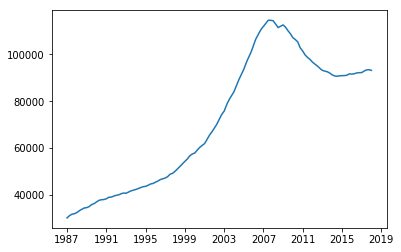

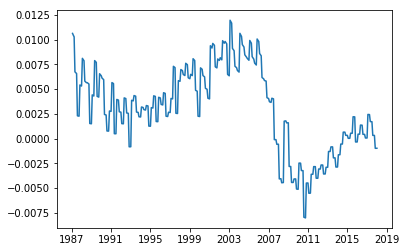

ADF Statistic: -1.412791
p-value: 0.576129


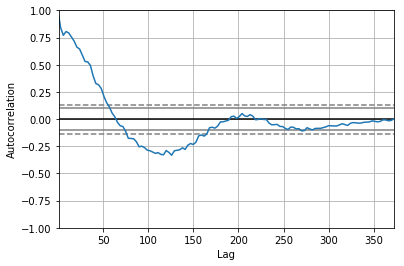

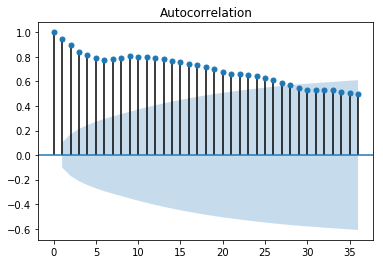

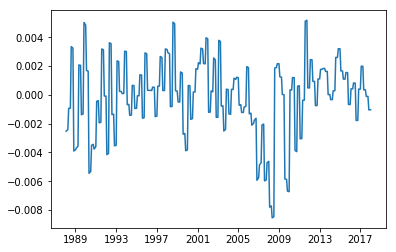

ADF Statistic: -2.505735
p-value: 0.114085


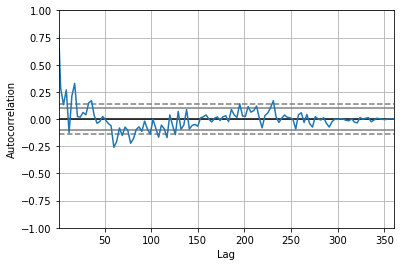

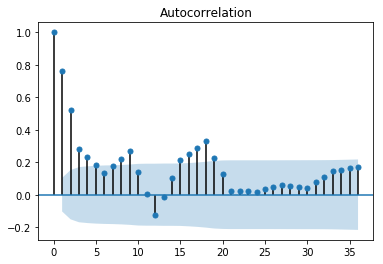

In [3]:
CS_dat, adj_CS_dat, perc_adj_CS_dat, mdo_dat, new_PCE = fd.fix_data.cleanup_data('/Users/abbysuckow/Desktop/Thesis/Data/CSUSHPINSA.csv',
                        '/Users/abbysuckow/Desktop/Thesis/Data/pers_expend.csv',
                 '/Users/abbysuckow/Desktop/Thesis/Data/frb_mdo_historical.csv', False, logz=False)

#get the relevant mortgage data and change into percentage change
mdo_dat = fd.fix_data.get_residential_data(mdo_dat, new_PCE)
plt.plot(mdo_dat.iloc[:,0])
plt.show()
mdo_dat = (mdo_dat - mdo_dat.shift(1)) / mdo_dat.shift(1)
plt.plot(mdo_dat.iloc[:,0])
plt.show()
fd.fix_data.check_stationary(mdo_dat.iloc[1:,0], plots=True)
mdo_dat.iloc[:,0] = mdo_dat.iloc[:,0] - mdo_dat.iloc[0:,0].shift(12)
plt.plot(mdo_dat.iloc[:,0])
plt.show()
fd.fix_data.check_stationary(mdo_dat.iloc[13:,0], plots=True)

2
ADF Statistic: -2.977440
p-value: 0.037056
ADF Statistic: -4.279590
p-value: 0.000482
hello!!!!!
(209, 5)
(209, 1, 5)
(74, 5)
Epoch 1/100
209/209 [==============================] - 1s 5ms/step - loss: 1.0320
Epoch 2/100
209/209 [==============================] - 0s 17us/step - loss: 1.0195
Epoch 3/100
209/209 [==============================] - 0s 20us/step - loss: 1.0758
Epoch 4/100
209/209 [==============================] - 0s 18us/step - loss: 1.0023
Epoch 5/100
209/209 [==============================] - 0s 20us/step - loss: 1.0332
Epoch 6/100
209/209 [==============================] - 0s 17us/step - loss: 1.0257
Epoch 7/100
209/209 [==============================] - 0s 19us/step - loss: 1.0411
Epoch 8/100
209/209 [==============================] - 0s 18us/step - loss: 1.0130
Epoch 9/100
209/209 [==============================] - 0s 19us/step - loss: 1.0334
Epoch 10/100
209/209 [==============================] - 0s 19us/step - loss: 1.0522
Epoch 11/100
209/209 [====================

Epoch 97/100
209/209 [==============================] - 0s 25us/step - loss: 0.9607
Epoch 98/100
209/209 [==============================] - 0s 24us/step - loss: 1.0194
Epoch 99/100
209/209 [==============================] - 0s 20us/step - loss: 1.0421
Epoch 100/100
209/209 [==============================] - 0s 25us/step - loss: 1.0365
Epoch 1/100
209/209 [==============================] - 1s 6ms/step - loss: 1.0727
Epoch 2/100
209/209 [==============================] - 0s 16us/step - loss: 1.0845
Epoch 3/100
209/209 [==============================] - 0s 20us/step - loss: 1.0890
Epoch 4/100
209/209 [==============================] - 0s 19us/step - loss: 1.1022
Epoch 5/100
209/209 [==============================] - 0s 19us/step - loss: 1.0954
Epoch 6/100
209/209 [==============================] - 0s 18us/step - loss: 1.0916
Epoch 7/100
209/209 [==============================] - 0s 20us/step - loss: 1.0729
Epoch 8/100
209/209 [==============================] - 0s 21us/step - loss: 1.0827


Epoch 95/100
209/209 [==============================] - 0s 19us/step - loss: 0.9338
Epoch 96/100
209/209 [==============================] - 0s 25us/step - loss: 0.9803
Epoch 97/100
209/209 [==============================] - 0s 20us/step - loss: 0.9521
Epoch 98/100
209/209 [==============================] - 0s 26us/step - loss: 0.9954
Epoch 99/100
209/209 [==============================] - 0s 20us/step - loss: 0.9657
Epoch 100/100
209/209 [==============================] - 0s 22us/step - loss: 0.9332
Epoch 1/100
209/209 [==============================] - 1s 6ms/step - loss: 1.2874
Epoch 2/100
209/209 [==============================] - 0s 24us/step - loss: 1.2107
Epoch 3/100
209/209 [==============================] - 0s 20us/step - loss: 1.1545
Epoch 4/100
209/209 [==============================] - 0s 19us/step - loss: 1.0567
Epoch 5/100
209/209 [==============================] - 0s 18us/step - loss: 1.0133
Epoch 6/100
209/209 [==============================] - 0s 19us/step - loss: 1.020

Epoch 93/100
209/209 [==============================] - 0s 19us/step - loss: 0.4958
Epoch 94/100
209/209 [==============================] - 0s 25us/step - loss: 0.5285
Epoch 95/100
209/209 [==============================] - 0s 21us/step - loss: 0.5050
Epoch 96/100
209/209 [==============================] - 0s 23us/step - loss: 0.4365
Epoch 97/100
209/209 [==============================] - 0s 22us/step - loss: 0.5714
Epoch 98/100
209/209 [==============================] - 0s 17us/step - loss: 0.5763
Epoch 99/100
209/209 [==============================] - 0s 17us/step - loss: 0.5383
Epoch 100/100
209/209 [==============================] - 0s 20us/step - loss: 0.4918
Epoch 1/100
209/209 [==============================] - 1s 6ms/step - loss: 1.1658
Epoch 2/100
209/209 [==============================] - 0s 20us/step - loss: 0.9845
Epoch 3/100
209/209 [==============================] - 0s 19us/step - loss: 0.7964
Epoch 4/100
209/209 [==============================] - 0s 18us/step - loss: 0.6

Epoch 91/100
209/209 [==============================] - 0s 17us/step - loss: 0.5991
Epoch 92/100
209/209 [==============================] - 0s 17us/step - loss: 0.5680
Epoch 93/100
209/209 [==============================] - 0s 19us/step - loss: 0.5720
Epoch 94/100
209/209 [==============================] - 0s 18us/step - loss: 0.6285
Epoch 95/100
209/209 [==============================] - 0s 17us/step - loss: 0.5647
Epoch 96/100
209/209 [==============================] - 0s 17us/step - loss: 0.6013
Epoch 97/100
209/209 [==============================] - 0s 20us/step - loss: 0.5011
Epoch 98/100
209/209 [==============================] - 0s 17us/step - loss: 0.5750
Epoch 99/100
209/209 [==============================] - 0s 21us/step - loss: 0.5737
Epoch 100/100
209/209 [==============================] - 0s 21us/step - loss: 0.4445
Epoch 1/100
209/209 [==============================] - 1s 6ms/step - loss: 1.0803
Epoch 2/100
209/209 [==============================] - 0s 19us/step - loss: 1

Epoch 89/100
209/209 [==============================] - 0s 23us/step - loss: 1.0352
Epoch 90/100
209/209 [==============================] - 0s 19us/step - loss: 1.0274
Epoch 91/100
209/209 [==============================] - 0s 22us/step - loss: 1.0662
Epoch 92/100
209/209 [==============================] - 0s 20us/step - loss: 1.1019
Epoch 93/100
209/209 [==============================] - 0s 27us/step - loss: 1.0694
Epoch 94/100
209/209 [==============================] - 0s 19us/step - loss: 1.0420
Epoch 95/100
209/209 [==============================] - 0s 19us/step - loss: 1.0865
Epoch 96/100
209/209 [==============================] - 0s 23us/step - loss: 1.1114
Epoch 97/100
209/209 [==============================] - 0s 17us/step - loss: 1.0981
Epoch 98/100
209/209 [==============================] - 0s 19us/step - loss: 1.0749
Epoch 99/100
209/209 [==============================] - 0s 21us/step - loss: 1.0543
Epoch 100/100
209/209 [==============================] - 0s 19us/step - loss

Epoch 87/100
209/209 [==============================] - 0s 20us/step - loss: 0.6655
Epoch 88/100
209/209 [==============================] - 0s 18us/step - loss: 0.6648
Epoch 89/100
209/209 [==============================] - 0s 24us/step - loss: 0.6358
Epoch 90/100
209/209 [==============================] - 0s 20us/step - loss: 0.6576
Epoch 91/100
209/209 [==============================] - 0s 18us/step - loss: 0.6842
Epoch 92/100
209/209 [==============================] - 0s 20us/step - loss: 0.6463
Epoch 93/100
209/209 [==============================] - 0s 19us/step - loss: 0.6661
Epoch 94/100
209/209 [==============================] - 0s 19us/step - loss: 0.6280
Epoch 95/100
209/209 [==============================] - 0s 20us/step - loss: 0.6522
Epoch 96/100
209/209 [==============================] - 0s 29us/step - loss: 0.6460
Epoch 97/100
209/209 [==============================] - 0s 23us/step - loss: 0.6156
Epoch 98/100
209/209 [==============================] - 0s 21us/step - loss:

Epoch 85/100
209/209 [==============================] - 0s 19us/step - loss: 0.3791
Epoch 86/100
209/209 [==============================] - 0s 22us/step - loss: 0.4215
Epoch 87/100
209/209 [==============================] - 0s 27us/step - loss: 0.4854
Epoch 88/100
209/209 [==============================] - 0s 28us/step - loss: 0.4459
Epoch 89/100
209/209 [==============================] - 0s 23us/step - loss: 0.4361
Epoch 90/100
209/209 [==============================] - 0s 22us/step - loss: 0.4138
Epoch 91/100
209/209 [==============================] - 0s 19us/step - loss: 0.4117
Epoch 92/100
209/209 [==============================] - 0s 20us/step - loss: 0.3588
Epoch 93/100
209/209 [==============================] - 0s 35us/step - loss: 0.3974
Epoch 94/100
209/209 [==============================] - 0s 31us/step - loss: 0.4174
Epoch 95/100
209/209 [==============================] - 0s 34us/step - loss: 0.4317
Epoch 96/100
209/209 [==============================] - 0s 18us/step - loss:

Epoch 83/100
209/209 [==============================] - 0s 21us/step - loss: 0.4270
Epoch 84/100
209/209 [==============================] - 0s 16us/step - loss: 0.4712
Epoch 85/100
209/209 [==============================] - 0s 17us/step - loss: 0.5160
Epoch 86/100
209/209 [==============================] - 0s 17us/step - loss: 0.4739
Epoch 87/100
209/209 [==============================] - 0s 17us/step - loss: 0.5350
Epoch 88/100
209/209 [==============================] - 0s 17us/step - loss: 0.4629
Epoch 89/100
209/209 [==============================] - 0s 16us/step - loss: 0.4966
Epoch 90/100
209/209 [==============================] - 0s 17us/step - loss: 0.4749
Epoch 91/100
209/209 [==============================] - 0s 17us/step - loss: 0.4120
Epoch 92/100
209/209 [==============================] - 0s 20us/step - loss: 0.4696
Epoch 93/100
209/209 [==============================] - 0s 15us/step - loss: 0.4423
Epoch 94/100
209/209 [==============================] - 0s 16us/step - loss:

Epoch 81/100
209/209 [==============================] - 0s 46us/step - loss: 0.9842
Epoch 82/100
209/209 [==============================] - 0s 21us/step - loss: 0.9964
Epoch 83/100
209/209 [==============================] - 0s 22us/step - loss: 1.0267
Epoch 84/100
209/209 [==============================] - 0s 20us/step - loss: 0.9728
Epoch 85/100
209/209 [==============================] - 0s 21us/step - loss: 1.0210
Epoch 86/100
209/209 [==============================] - 0s 18us/step - loss: 1.0107
Epoch 87/100
209/209 [==============================] - 0s 32us/step - loss: 1.0268
Epoch 88/100
209/209 [==============================] - 0s 46us/step - loss: 1.0130
Epoch 89/100
209/209 [==============================] - 0s 34us/step - loss: 1.0197
Epoch 90/100
209/209 [==============================] - 0s 22us/step - loss: 1.0088
Epoch 91/100
209/209 [==============================] - 0s 30us/step - loss: 0.9917
Epoch 92/100
209/209 [==============================] - 0s 19us/step - loss:

Epoch 79/100
209/209 [==============================] - 0s 21us/step - loss: 0.6137
Epoch 80/100
209/209 [==============================] - 0s 22us/step - loss: 0.6240
Epoch 81/100
209/209 [==============================] - 0s 24us/step - loss: 0.6122
Epoch 82/100
209/209 [==============================] - 0s 20us/step - loss: 0.6603
Epoch 83/100
209/209 [==============================] - 0s 26us/step - loss: 0.5906
Epoch 84/100
209/209 [==============================] - 0s 24us/step - loss: 0.5845
Epoch 85/100
209/209 [==============================] - 0s 24us/step - loss: 0.6250
Epoch 86/100
209/209 [==============================] - 0s 40us/step - loss: 0.5843
Epoch 87/100
209/209 [==============================] - 0s 34us/step - loss: 0.5788
Epoch 88/100
209/209 [==============================] - 0s 23us/step - loss: 0.5819
Epoch 89/100
209/209 [==============================] - 0s 24us/step - loss: 0.5675
Epoch 90/100
209/209 [==============================] - 0s 25us/step - loss:

Epoch 77/100
209/209 [==============================] - 0s 30us/step - loss: 0.3880
Epoch 78/100
209/209 [==============================] - 0s 27us/step - loss: 0.3748
Epoch 79/100
209/209 [==============================] - 0s 25us/step - loss: 0.3891
Epoch 80/100
209/209 [==============================] - 0s 19us/step - loss: 0.3808
Epoch 81/100
209/209 [==============================] - 0s 19us/step - loss: 0.3504
Epoch 82/100
209/209 [==============================] - 0s 23us/step - loss: 0.4162
Epoch 83/100
209/209 [==============================] - 0s 19us/step - loss: 0.3566
Epoch 84/100
209/209 [==============================] - 0s 18us/step - loss: 0.3532
Epoch 85/100
209/209 [==============================] - 0s 28us/step - loss: 0.3837
Epoch 86/100
209/209 [==============================] - 0s 22us/step - loss: 0.3752
Epoch 87/100
209/209 [==============================] - 0s 18us/step - loss: 0.3422
Epoch 88/100
209/209 [==============================] - 0s 20us/step - loss:

Epoch 75/100
209/209 [==============================] - 0s 28us/step - loss: 0.3786
Epoch 76/100
209/209 [==============================] - 0s 22us/step - loss: 0.3772
Epoch 77/100
209/209 [==============================] - 0s 21us/step - loss: 0.4139
Epoch 78/100
209/209 [==============================] - 0s 23us/step - loss: 0.3928
Epoch 79/100
209/209 [==============================] - 0s 18us/step - loss: 0.4147
Epoch 80/100
209/209 [==============================] - 0s 24us/step - loss: 0.4429
Epoch 81/100
209/209 [==============================] - 0s 20us/step - loss: 0.4835
Epoch 82/100
209/209 [==============================] - 0s 21us/step - loss: 0.3947
Epoch 83/100
209/209 [==============================] - 0s 20us/step - loss: 0.4287
Epoch 84/100
209/209 [==============================] - 0s 20us/step - loss: 0.3352
Epoch 85/100
209/209 [==============================] - 0s 20us/step - loss: 0.3992
Epoch 86/100
209/209 [==============================] - 0s 18us/step - loss:

Epoch 73/100
209/209 [==============================] - 0s 21us/step - loss: 0.8887
Epoch 74/100
209/209 [==============================] - 0s 23us/step - loss: 0.8977
Epoch 75/100
209/209 [==============================] - 0s 22us/step - loss: 0.9084
Epoch 76/100
209/209 [==============================] - 0s 31us/step - loss: 0.9064
Epoch 77/100
209/209 [==============================] - 0s 19us/step - loss: 0.8730
Epoch 78/100
209/209 [==============================] - 0s 29us/step - loss: 0.8876
Epoch 79/100
209/209 [==============================] - 0s 27us/step - loss: 0.8613
Epoch 80/100
209/209 [==============================] - 0s 30us/step - loss: 0.8978
Epoch 81/100
209/209 [==============================] - 0s 26us/step - loss: 0.8704
Epoch 82/100
209/209 [==============================] - 0s 34us/step - loss: 0.8806
Epoch 83/100
209/209 [==============================] - 0s 28us/step - loss: 0.8888
Epoch 84/100
209/209 [==============================] - 0s 27us/step - loss:

Epoch 71/100
209/209 [==============================] - 0s 22us/step - loss: 0.6144
Epoch 72/100
209/209 [==============================] - 0s 25us/step - loss: 0.5940
Epoch 73/100
209/209 [==============================] - 0s 25us/step - loss: 0.6404
Epoch 74/100
209/209 [==============================] - 0s 22us/step - loss: 0.5813
Epoch 75/100
209/209 [==============================] - 0s 26us/step - loss: 0.5952
Epoch 76/100
209/209 [==============================] - 0s 23us/step - loss: 0.5872
Epoch 77/100
209/209 [==============================] - 0s 25us/step - loss: 0.5784
Epoch 78/100
209/209 [==============================] - 0s 26us/step - loss: 0.5945
Epoch 79/100
209/209 [==============================] - 0s 41us/step - loss: 0.5864
Epoch 80/100
209/209 [==============================] - 0s 38us/step - loss: 0.5482
Epoch 81/100
209/209 [==============================] - 0s 32us/step - loss: 0.5856
Epoch 82/100
209/209 [==============================] - 0s 21us/step - loss:

Epoch 69/100
209/209 [==============================] - 0s 24us/step - loss: 0.3272
Epoch 70/100
209/209 [==============================] - 0s 26us/step - loss: 0.3411
Epoch 71/100
209/209 [==============================] - 0s 28us/step - loss: 0.3511
Epoch 72/100
209/209 [==============================] - 0s 25us/step - loss: 0.3423
Epoch 73/100
209/209 [==============================] - 0s 23us/step - loss: 0.3184
Epoch 74/100
209/209 [==============================] - 0s 22us/step - loss: 0.3480
Epoch 75/100
209/209 [==============================] - 0s 22us/step - loss: 0.3350
Epoch 76/100
209/209 [==============================] - 0s 27us/step - loss: 0.3376
Epoch 77/100
209/209 [==============================] - 0s 24us/step - loss: 0.3516
Epoch 78/100
209/209 [==============================] - 0s 24us/step - loss: 0.3407
Epoch 79/100
209/209 [==============================] - 0s 22us/step - loss: 0.3549
Epoch 80/100
209/209 [==============================] - 0s 22us/step - loss:

Epoch 67/100
209/209 [==============================] - 0s 25us/step - loss: 0.3720
Epoch 68/100
209/209 [==============================] - 0s 26us/step - loss: 0.3844
Epoch 69/100
209/209 [==============================] - 0s 31us/step - loss: 0.3396
Epoch 70/100
209/209 [==============================] - 0s 27us/step - loss: 0.3736
Epoch 71/100
209/209 [==============================] - 0s 34us/step - loss: 0.5232
Epoch 72/100
209/209 [==============================] - 0s 33us/step - loss: 0.6436
Epoch 73/100
209/209 [==============================] - 0s 29us/step - loss: 0.4048
Epoch 74/100
209/209 [==============================] - 0s 34us/step - loss: 0.3590
Epoch 75/100
209/209 [==============================] - 0s 36us/step - loss: 0.3700
Epoch 76/100
209/209 [==============================] - 0s 30us/step - loss: 0.3202
Epoch 77/100
209/209 [==============================] - 0s 32us/step - loss: 0.3485
Epoch 78/100
209/209 [==============================] - 0s 30us/step - loss:

Epoch 65/100
209/209 [==============================] - 0s 24us/step - loss: 0.9500
Epoch 66/100
209/209 [==============================] - 0s 31us/step - loss: 0.9234
Epoch 67/100
209/209 [==============================] - 0s 24us/step - loss: 0.9244
Epoch 68/100
209/209 [==============================] - 0s 28us/step - loss: 0.9620
Epoch 69/100
209/209 [==============================] - 0s 26us/step - loss: 0.9453
Epoch 70/100
209/209 [==============================] - 0s 24us/step - loss: 0.9323
Epoch 71/100
209/209 [==============================] - 0s 24us/step - loss: 0.9400
Epoch 72/100
209/209 [==============================] - 0s 24us/step - loss: 0.9209
Epoch 73/100
209/209 [==============================] - 0s 25us/step - loss: 0.9423
Epoch 74/100
209/209 [==============================] - 0s 23us/step - loss: 0.9380
Epoch 75/100
209/209 [==============================] - 0s 25us/step - loss: 0.9307
Epoch 76/100
209/209 [==============================] - 0s 25us/step - loss:

209/209 [==============================] - 0s 29us/step - loss: 0.4999
Epoch 63/100
209/209 [==============================] - 0s 34us/step - loss: 0.5015
Epoch 64/100
209/209 [==============================] - 0s 29us/step - loss: 0.4745
Epoch 65/100
209/209 [==============================] - 0s 28us/step - loss: 0.4702
Epoch 66/100
209/209 [==============================] - 0s 31us/step - loss: 0.4961
Epoch 67/100
209/209 [==============================] - 0s 35us/step - loss: 0.4616
Epoch 68/100
209/209 [==============================] - 0s 46us/step - loss: 0.4706
Epoch 69/100
209/209 [==============================] - 0s 47us/step - loss: 0.4888
Epoch 70/100
209/209 [==============================] - 0s 44us/step - loss: 0.4613
Epoch 71/100
209/209 [==============================] - 0s 53us/step - loss: 0.4648
Epoch 72/100
209/209 [==============================] - 0s 30us/step - loss: 0.4691
Epoch 73/100
209/209 [==============================] - 0s 39us/step - loss: 0.4580
Epoch

Epoch 60/100
209/209 [==============================] - 0s 31us/step - loss: 0.3287
Epoch 61/100
209/209 [==============================] - 0s 35us/step - loss: 0.3308
Epoch 62/100
209/209 [==============================] - 0s 28us/step - loss: 0.3483
Epoch 63/100
209/209 [==============================] - 0s 31us/step - loss: 0.3306
Epoch 64/100
209/209 [==============================] - 0s 31us/step - loss: 0.3441
Epoch 65/100
209/209 [==============================] - 0s 29us/step - loss: 0.3460
Epoch 66/100
209/209 [==============================] - 0s 32us/step - loss: 0.3176
Epoch 67/100
209/209 [==============================] - 0s 31us/step - loss: 0.3185
Epoch 68/100
209/209 [==============================] - 0s 35us/step - loss: 0.3074
Epoch 69/100
209/209 [==============================] - 0s 37us/step - loss: 0.3349
Epoch 70/100
209/209 [==============================] - 0s 33us/step - loss: 0.3188
Epoch 71/100
209/209 [==============================] - 0s 26us/step - loss:

Epoch 58/100
209/209 [==============================] - 0s 30us/step - loss: 0.6604
Epoch 59/100
209/209 [==============================] - 0s 30us/step - loss: 0.7048
Epoch 60/100
209/209 [==============================] - 0s 28us/step - loss: 0.3582
Epoch 61/100
209/209 [==============================] - 0s 30us/step - loss: 0.3468
Epoch 62/100
209/209 [==============================] - 0s 28us/step - loss: 0.3551
Epoch 63/100
209/209 [==============================] - 0s 39us/step - loss: 0.3381
Epoch 64/100
209/209 [==============================] - 0s 33us/step - loss: 0.4133
Epoch 65/100
209/209 [==============================] - 0s 30us/step - loss: 0.3916
Epoch 66/100
209/209 [==============================] - 0s 26us/step - loss: 0.5150
Epoch 67/100
209/209 [==============================] - 0s 33us/step - loss: 0.3445
Epoch 68/100
209/209 [==============================] - 0s 30us/step - loss: 0.3373
Epoch 69/100
209/209 [==============================] - 0s 26us/step - loss:

209/209 [==============================] - 1s 5ms/step - loss: 0.3994
Epoch 57/100
209/209 [==============================] - 1s 5ms/step - loss: 0.4005
Epoch 58/100
209/209 [==============================] - 1s 4ms/step - loss: 0.4587
Epoch 59/100
209/209 [==============================] - 1s 5ms/step - loss: 0.4106
Epoch 60/100
209/209 [==============================] - 1s 4ms/step - loss: 0.4027
Epoch 61/100
209/209 [==============================] - 1s 5ms/step - loss: 0.3863
Epoch 62/100
209/209 [==============================] - 1s 4ms/step - loss: 0.3967
Epoch 63/100
209/209 [==============================] - 1s 4ms/step - loss: 0.3930
Epoch 64/100
209/209 [==============================] - 1s 5ms/step - loss: 0.4231
Epoch 65/100
209/209 [==============================] - 1s 4ms/step - loss: 0.4194
Epoch 66/100
209/209 [==============================] - 1s 4ms/step - loss: 0.4068
Epoch 67/100
209/209 [==============================] - 1s 4ms/step - loss: 0.3578
Epoch 68/100
209/

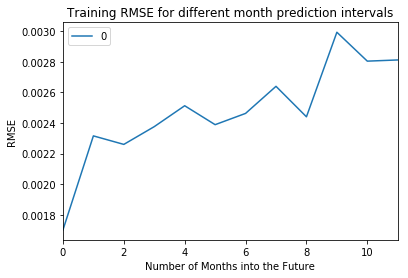

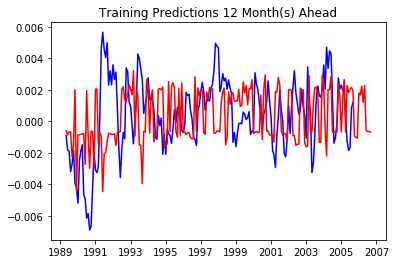

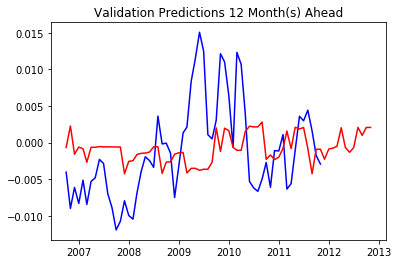

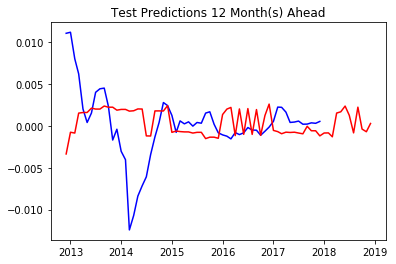

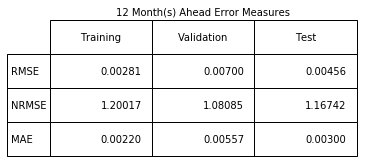

3
ADF Statistic: -2.977440
p-value: 0.037056
ADF Statistic: -4.332403
p-value: 0.000390
hello!!!!!
(207, 7)
(207, 1, 7)
(74, 7)
Epoch 1/100
207/207 [==============================] - 3s 13ms/step - loss: 0.9702
Epoch 2/100
207/207 [==============================] - 0s 19us/step - loss: 0.9750
Epoch 3/100
207/207 [==============================] - 0s 23us/step - loss: 0.9547
Epoch 4/100
207/207 [==============================] - 0s 30us/step - loss: 0.9895
Epoch 5/100
207/207 [==============================] - 0s 22us/step - loss: 0.9843
Epoch 6/100
207/207 [==============================] - 0s 30us/step - loss: 0.9715
Epoch 7/100
207/207 [==============================] - 0s 25us/step - loss: 0.9450
Epoch 8/100
207/207 [==============================] - 0s 35us/step - loss: 0.9363
Epoch 9/100
207/207 [==============================] - 0s 44us/step - loss: 0.9554
Epoch 10/100
207/207 [==============================] - 0s 25us/step - loss: 0.9588
Epoch 11/100
207/207 [===================

207/207 [==============================] - 0s 24us/step - loss: 0.9601
Epoch 98/100
207/207 [==============================] - 0s 24us/step - loss: 0.9684
Epoch 99/100
207/207 [==============================] - 0s 29us/step - loss: 0.9529
Epoch 100/100
207/207 [==============================] - 0s 32us/step - loss: 0.9863
Epoch 1/100
207/207 [==============================] - 3s 13ms/step - loss: 1.2723
Epoch 2/100
207/207 [==============================] - 0s 21us/step - loss: 1.2357
Epoch 3/100
207/207 [==============================] - 0s 18us/step - loss: 1.2924
Epoch 4/100
207/207 [==============================] - 0s 27us/step - loss: 1.3096
Epoch 5/100
207/207 [==============================] - 0s 45us/step - loss: 1.2393
Epoch 6/100
207/207 [==============================] - 0s 21us/step - loss: 1.2841
Epoch 7/100
207/207 [==============================] - 0s 25us/step - loss: 1.2221
Epoch 8/100
207/207 [==============================] - 0s 29us/step - loss: 1.2170
Epoch 9/100


Epoch 95/100
207/207 [==============================] - 0s 23us/step - loss: 0.9738
Epoch 96/100
207/207 [==============================] - 0s 29us/step - loss: 0.9965
Epoch 97/100
207/207 [==============================] - 0s 25us/step - loss: 1.0044
Epoch 98/100
207/207 [==============================] - 0s 23us/step - loss: 0.9983
Epoch 99/100
207/207 [==============================] - 0s 21us/step - loss: 0.9974
Epoch 100/100
207/207 [==============================] - 0s 19us/step - loss: 0.9714
Epoch 1/100
207/207 [==============================] - 3s 13ms/step - loss: 1.1741
Epoch 2/100
207/207 [==============================] - 0s 22us/step - loss: 1.0276
Epoch 3/100
207/207 [==============================] - 0s 21us/step - loss: 0.9640
Epoch 4/100
207/207 [==============================] - 0s 31us/step - loss: 0.8780
Epoch 5/100
207/207 [==============================] - 0s 44us/step - loss: 0.9294
Epoch 6/100
207/207 [==============================] - 0s 29us/step - loss: 0.84

Epoch 93/100
207/207 [==============================] - 0s 22us/step - loss: 0.5008
Epoch 94/100
207/207 [==============================] - 0s 21us/step - loss: 0.4629
Epoch 95/100
207/207 [==============================] - 0s 25us/step - loss: 0.5022
Epoch 96/100
207/207 [==============================] - 0s 20us/step - loss: 0.4971
Epoch 97/100
207/207 [==============================] - 0s 24us/step - loss: 0.4450
Epoch 98/100
207/207 [==============================] - 0s 24us/step - loss: 0.4544
Epoch 99/100
207/207 [==============================] - 0s 27us/step - loss: 0.4595
Epoch 100/100
207/207 [==============================] - 0s 23us/step - loss: 0.5228
Epoch 1/100
207/207 [==============================] - 3s 14ms/step - loss: 0.9581
Epoch 2/100
207/207 [==============================] - 0s 21us/step - loss: 0.9629
Epoch 3/100
207/207 [==============================] - 0s 21us/step - loss: 0.8950
Epoch 4/100
207/207 [==============================] - 0s 24us/step - loss: 0.

Epoch 91/100
207/207 [==============================] - 0s 24us/step - loss: 0.4971
Epoch 92/100
207/207 [==============================] - 0s 20us/step - loss: 0.6009
Epoch 93/100
207/207 [==============================] - 0s 24us/step - loss: 0.4931
Epoch 94/100
207/207 [==============================] - 0s 19us/step - loss: 0.5248
Epoch 95/100
207/207 [==============================] - 0s 22us/step - loss: 0.5321
Epoch 96/100
207/207 [==============================] - 0s 24us/step - loss: 0.5607
Epoch 97/100
207/207 [==============================] - 0s 23us/step - loss: 0.5095
Epoch 98/100
207/207 [==============================] - 0s 28us/step - loss: 0.5547
Epoch 99/100
207/207 [==============================] - 0s 20us/step - loss: 0.5200
Epoch 100/100
207/207 [==============================] - 0s 18us/step - loss: 0.4889
Epoch 1/100
207/207 [==============================] - 3s 14ms/step - loss: 0.8546
Epoch 2/100
207/207 [==============================] - 0s 21us/step - loss: 

Epoch 89/100
207/207 [==============================] - 0s 21us/step - loss: 0.8323
Epoch 90/100
207/207 [==============================] - 0s 32us/step - loss: 0.8491
Epoch 91/100
207/207 [==============================] - 0s 26us/step - loss: 0.8573
Epoch 92/100
207/207 [==============================] - 0s 20us/step - loss: 0.8449
Epoch 93/100
207/207 [==============================] - 0s 23us/step - loss: 0.8595
Epoch 94/100
207/207 [==============================] - 0s 23us/step - loss: 0.8700
Epoch 95/100
207/207 [==============================] - 0s 27us/step - loss: 0.8919
Epoch 96/100
207/207 [==============================] - 0s 20us/step - loss: 0.8535
Epoch 97/100
207/207 [==============================] - 0s 37us/step - loss: 0.8662
Epoch 98/100
207/207 [==============================] - 0s 23us/step - loss: 0.8199
Epoch 99/100
207/207 [==============================] - 0s 24us/step - loss: 0.8351
Epoch 100/100
207/207 [==============================] - 0s 27us/step - loss

Epoch 87/100
207/207 [==============================] - 0s 28us/step - loss: 0.8469
Epoch 88/100
207/207 [==============================] - 0s 29us/step - loss: 0.8147
Epoch 89/100
207/207 [==============================] - 0s 27us/step - loss: 0.7846
Epoch 90/100
207/207 [==============================] - 0s 27us/step - loss: 0.8022
Epoch 91/100
207/207 [==============================] - 0s 24us/step - loss: 0.8230
Epoch 92/100
207/207 [==============================] - 0s 24us/step - loss: 0.8209
Epoch 93/100
207/207 [==============================] - 0s 34us/step - loss: 0.8483
Epoch 94/100
207/207 [==============================] - 0s 24us/step - loss: 0.7974
Epoch 95/100
207/207 [==============================] - 0s 28us/step - loss: 0.7836
Epoch 96/100
207/207 [==============================] - 0s 30us/step - loss: 0.8093
Epoch 97/100
207/207 [==============================] - 0s 21us/step - loss: 0.7826
Epoch 98/100
207/207 [==============================] - 0s 29us/step - loss:

Epoch 85/100
207/207 [==============================] - 0s 23us/step - loss: 0.3900
Epoch 86/100
207/207 [==============================] - 0s 29us/step - loss: 0.3619
Epoch 87/100
207/207 [==============================] - 0s 36us/step - loss: 0.4040
Epoch 88/100
207/207 [==============================] - 0s 24us/step - loss: 0.4705
Epoch 89/100
207/207 [==============================] - 0s 23us/step - loss: 0.4156
Epoch 90/100
207/207 [==============================] - 0s 22us/step - loss: 0.3950
Epoch 91/100
207/207 [==============================] - 0s 21us/step - loss: 0.4330
Epoch 92/100
207/207 [==============================] - 0s 24us/step - loss: 0.4122
Epoch 93/100
207/207 [==============================] - 0s 30us/step - loss: 0.3929
Epoch 94/100
207/207 [==============================] - 0s 20us/step - loss: 0.3743
Epoch 95/100
207/207 [==============================] - 0s 20us/step - loss: 0.3801
Epoch 96/100
207/207 [==============================] - 0s 26us/step - loss:

Epoch 83/100
207/207 [==============================] - 0s 18us/step - loss: 0.3885
Epoch 84/100
207/207 [==============================] - 0s 19us/step - loss: 0.3595
Epoch 85/100
207/207 [==============================] - 0s 18us/step - loss: 0.3774
Epoch 86/100
207/207 [==============================] - 0s 19us/step - loss: 0.4166
Epoch 87/100
207/207 [==============================] - 0s 22us/step - loss: 0.3945
Epoch 88/100
207/207 [==============================] - 0s 23us/step - loss: 0.4281
Epoch 89/100
207/207 [==============================] - 0s 19us/step - loss: 0.4061
Epoch 90/100
207/207 [==============================] - 0s 20us/step - loss: 0.4397
Epoch 91/100
207/207 [==============================] - 0s 19us/step - loss: 0.4893
Epoch 92/100
207/207 [==============================] - 0s 17us/step - loss: 0.4387
Epoch 93/100
207/207 [==============================] - 0s 18us/step - loss: 0.3997
Epoch 94/100
207/207 [==============================] - 0s 18us/step - loss:

207/207 [==============================] - 0s 20us/step - loss: 1.0728
Epoch 81/100
207/207 [==============================] - 0s 20us/step - loss: 1.1063
Epoch 82/100
207/207 [==============================] - 0s 24us/step - loss: 1.0613
Epoch 83/100
207/207 [==============================] - 0s 19us/step - loss: 1.0648
Epoch 84/100
207/207 [==============================] - 0s 20us/step - loss: 1.0834
Epoch 85/100
207/207 [==============================] - 0s 21us/step - loss: 1.0664
Epoch 86/100
207/207 [==============================] - 0s 20us/step - loss: 1.0616
Epoch 87/100
207/207 [==============================] - 0s 17us/step - loss: 1.0713
Epoch 88/100
207/207 [==============================] - 0s 19us/step - loss: 1.0768
Epoch 89/100
207/207 [==============================] - 0s 20us/step - loss: 1.0743
Epoch 90/100
207/207 [==============================] - 0s 18us/step - loss: 1.0350
Epoch 91/100
207/207 [==============================] - 0s 20us/step - loss: 1.0730
Epoch

Epoch 78/100
207/207 [==============================] - 0s 26us/step - loss: 0.6271
Epoch 79/100
207/207 [==============================] - 0s 18us/step - loss: 0.6532
Epoch 80/100
207/207 [==============================] - 0s 32us/step - loss: 0.6488
Epoch 81/100
207/207 [==============================] - 0s 26us/step - loss: 0.6350
Epoch 82/100
207/207 [==============================] - 0s 30us/step - loss: 0.6049
Epoch 83/100
207/207 [==============================] - 0s 32us/step - loss: 0.6097
Epoch 84/100
207/207 [==============================] - 0s 25us/step - loss: 0.6049
Epoch 85/100
207/207 [==============================] - 0s 30us/step - loss: 0.6413
Epoch 86/100
207/207 [==============================] - 0s 25us/step - loss: 0.6261
Epoch 87/100
207/207 [==============================] - 0s 25us/step - loss: 0.6116
Epoch 88/100
207/207 [==============================] - 0s 26us/step - loss: 0.6528
Epoch 89/100
207/207 [==============================] - 0s 23us/step - loss:

Epoch 76/100
207/207 [==============================] - 0s 21us/step - loss: 0.3564
Epoch 77/100
207/207 [==============================] - 0s 22us/step - loss: 0.3729
Epoch 78/100
207/207 [==============================] - 0s 24us/step - loss: 0.3206
Epoch 79/100
207/207 [==============================] - 0s 31us/step - loss: 0.3417
Epoch 80/100
207/207 [==============================] - 0s 27us/step - loss: 0.3438
Epoch 81/100
207/207 [==============================] - 0s 25us/step - loss: 0.4163
Epoch 82/100
207/207 [==============================] - 0s 24us/step - loss: 0.3728
Epoch 83/100
207/207 [==============================] - 0s 33us/step - loss: 0.3281
Epoch 84/100
207/207 [==============================] - 0s 25us/step - loss: 0.3575
Epoch 85/100
207/207 [==============================] - 0s 20us/step - loss: 0.3393
Epoch 86/100
207/207 [==============================] - 0s 33us/step - loss: 0.3543
Epoch 87/100
207/207 [==============================] - 0s 27us/step - loss:

Epoch 74/100
207/207 [==============================] - 0s 27us/step - loss: 0.3910
Epoch 75/100
207/207 [==============================] - 0s 22us/step - loss: 0.4441
Epoch 76/100
207/207 [==============================] - 0s 26us/step - loss: 0.3439
Epoch 77/100
207/207 [==============================] - 0s 28us/step - loss: 0.3270
Epoch 78/100
207/207 [==============================] - 0s 27us/step - loss: 0.3910
Epoch 79/100
207/207 [==============================] - 0s 29us/step - loss: 0.4287
Epoch 80/100
207/207 [==============================] - 0s 27us/step - loss: 0.4128
Epoch 81/100
207/207 [==============================] - 0s 26us/step - loss: 0.4182
Epoch 82/100
207/207 [==============================] - 0s 27us/step - loss: 0.3075
Epoch 83/100
207/207 [==============================] - 0s 24us/step - loss: 0.3963
Epoch 84/100
207/207 [==============================] - 0s 26us/step - loss: 0.4513
Epoch 85/100
207/207 [==============================] - 0s 31us/step - loss:

Epoch 72/100
207/207 [==============================] - 0s 21us/step - loss: 0.9642
Epoch 73/100
207/207 [==============================] - 0s 23us/step - loss: 0.9668
Epoch 74/100
207/207 [==============================] - 0s 19us/step - loss: 0.9642
Epoch 75/100
207/207 [==============================] - 0s 22us/step - loss: 0.9287
Epoch 76/100
207/207 [==============================] - 0s 27us/step - loss: 0.9674
Epoch 77/100
207/207 [==============================] - 0s 28us/step - loss: 0.9455
Epoch 78/100
207/207 [==============================] - 0s 25us/step - loss: 0.9213
Epoch 79/100
207/207 [==============================] - 0s 21us/step - loss: 0.9370
Epoch 80/100
207/207 [==============================] - 0s 19us/step - loss: 0.9616
Epoch 81/100
207/207 [==============================] - 0s 20us/step - loss: 0.9365
Epoch 82/100
207/207 [==============================] - 0s 21us/step - loss: 0.9425
Epoch 83/100
207/207 [==============================] - 0s 19us/step - loss:

Epoch 70/100
207/207 [==============================] - 0s 25us/step - loss: 0.6153
Epoch 71/100
207/207 [==============================] - 0s 25us/step - loss: 0.6445
Epoch 72/100
207/207 [==============================] - 0s 25us/step - loss: 0.6581
Epoch 73/100
207/207 [==============================] - 0s 29us/step - loss: 0.6269
Epoch 74/100
207/207 [==============================] - 0s 23us/step - loss: 0.6350
Epoch 75/100
207/207 [==============================] - 0s 22us/step - loss: 0.6151
Epoch 76/100
207/207 [==============================] - 0s 32us/step - loss: 0.6235
Epoch 77/100
207/207 [==============================] - 0s 27us/step - loss: 0.5922
Epoch 78/100
207/207 [==============================] - 0s 33us/step - loss: 0.6085
Epoch 79/100
207/207 [==============================] - 0s 26us/step - loss: 0.5956
Epoch 80/100
207/207 [==============================] - 0s 30us/step - loss: 0.5928
Epoch 81/100
207/207 [==============================] - 0s 23us/step - loss:

207/207 [==============================] - 0s 27us/step - loss: 0.3440
Epoch 68/100
207/207 [==============================] - 0s 42us/step - loss: 0.3228
Epoch 69/100
207/207 [==============================] - 0s 31us/step - loss: 0.3144
Epoch 70/100
207/207 [==============================] - 0s 23us/step - loss: 0.3374
Epoch 71/100
207/207 [==============================] - 0s 38us/step - loss: 0.3309
Epoch 72/100
207/207 [==============================] - 0s 27us/step - loss: 0.3500
Epoch 73/100
207/207 [==============================] - 0s 43us/step - loss: 0.3332
Epoch 74/100
207/207 [==============================] - 0s 27us/step - loss: 0.3346
Epoch 75/100
207/207 [==============================] - 0s 36us/step - loss: 0.3147
Epoch 76/100
207/207 [==============================] - 0s 23us/step - loss: 0.3020
Epoch 77/100
207/207 [==============================] - 0s 35us/step - loss: 0.3284
Epoch 78/100
207/207 [==============================] - 0s 38us/step - loss: 0.3238
Epoch

Epoch 65/100
207/207 [==============================] - 0s 20us/step - loss: 0.5437
Epoch 66/100
207/207 [==============================] - 0s 26us/step - loss: 0.4552
Epoch 67/100
207/207 [==============================] - 0s 27us/step - loss: 0.3434
Epoch 68/100
207/207 [==============================] - 0s 22us/step - loss: 0.2996
Epoch 69/100
207/207 [==============================] - 0s 20us/step - loss: 0.3235
Epoch 70/100
207/207 [==============================] - 0s 21us/step - loss: 0.3431
Epoch 71/100
207/207 [==============================] - 0s 19us/step - loss: 0.3488
Epoch 72/100
207/207 [==============================] - 0s 19us/step - loss: 0.4093
Epoch 73/100
207/207 [==============================] - 0s 19us/step - loss: 0.5763
Epoch 74/100
207/207 [==============================] - 0s 22us/step - loss: 0.3027
Epoch 75/100
207/207 [==============================] - 0s 29us/step - loss: 0.3164
Epoch 76/100
207/207 [==============================] - 0s 20us/step - loss:

Epoch 63/100
207/207 [==============================] - 0s 34us/step - loss: 0.9560
Epoch 64/100
207/207 [==============================] - 0s 31us/step - loss: 0.9389
Epoch 65/100
207/207 [==============================] - 0s 40us/step - loss: 0.9155
Epoch 66/100
207/207 [==============================] - 0s 37us/step - loss: 0.9156
Epoch 67/100
207/207 [==============================] - 0s 34us/step - loss: 0.9238
Epoch 68/100
207/207 [==============================] - 0s 33us/step - loss: 0.9161
Epoch 69/100
207/207 [==============================] - 0s 30us/step - loss: 0.9152
Epoch 70/100
207/207 [==============================] - 0s 41us/step - loss: 0.9385
Epoch 71/100
207/207 [==============================] - 0s 37us/step - loss: 0.9479
Epoch 72/100
207/207 [==============================] - 0s 43us/step - loss: 0.9353
Epoch 73/100
207/207 [==============================] - 0s 34us/step - loss: 0.9124
Epoch 74/100
207/207 [==============================] - 0s 44us/step - loss:

Epoch 61/100
207/207 [==============================] - 0s 29us/step - loss: 0.5316
Epoch 62/100
207/207 [==============================] - 0s 29us/step - loss: 0.5063
Epoch 63/100
207/207 [==============================] - 0s 34us/step - loss: 0.5090
Epoch 64/100
207/207 [==============================] - 0s 31us/step - loss: 0.5234
Epoch 65/100
207/207 [==============================] - 0s 30us/step - loss: 0.5084
Epoch 66/100
207/207 [==============================] - 0s 27us/step - loss: 0.4717
Epoch 67/100
207/207 [==============================] - 0s 33us/step - loss: 0.4798
Epoch 68/100
207/207 [==============================] - 0s 26us/step - loss: 0.4974
Epoch 69/100
207/207 [==============================] - 0s 32us/step - loss: 0.4867
Epoch 70/100
207/207 [==============================] - 0s 29us/step - loss: 0.4878
Epoch 71/100
207/207 [==============================] - 0s 36us/step - loss: 0.5063
Epoch 72/100
207/207 [==============================] - 0s 29us/step - loss:

Epoch 59/100
207/207 [==============================] - 0s 35us/step - loss: 0.3314
Epoch 60/100
207/207 [==============================] - 0s 36us/step - loss: 0.3137
Epoch 61/100
207/207 [==============================] - 0s 36us/step - loss: 0.3160
Epoch 62/100
207/207 [==============================] - 0s 35us/step - loss: 0.3009
Epoch 63/100
207/207 [==============================] - 0s 42us/step - loss: 0.3208
Epoch 64/100
207/207 [==============================] - 0s 43us/step - loss: 0.3107
Epoch 65/100
207/207 [==============================] - 0s 34us/step - loss: 0.3165
Epoch 66/100
207/207 [==============================] - 0s 44us/step - loss: 0.3166
Epoch 67/100
207/207 [==============================] - 0s 45us/step - loss: 0.3044
Epoch 68/100
207/207 [==============================] - 0s 38us/step - loss: 0.3415
Epoch 69/100
207/207 [==============================] - 0s 35us/step - loss: 0.3077
Epoch 70/100
207/207 [==============================] - 0s 38us/step - loss:

Epoch 57/100
207/207 [==============================] - 0s 35us/step - loss: 0.4477
Epoch 58/100
207/207 [==============================] - 0s 46us/step - loss: 0.4689
Epoch 59/100
207/207 [==============================] - 0s 37us/step - loss: 0.5644
Epoch 60/100
207/207 [==============================] - 0s 35us/step - loss: 0.3446
Epoch 61/100
207/207 [==============================] - 0s 36us/step - loss: 0.3496
Epoch 62/100
207/207 [==============================] - 0s 30us/step - loss: 0.3837
Epoch 63/100
207/207 [==============================] - 0s 38us/step - loss: 0.4685
Epoch 64/100
207/207 [==============================] - 0s 38us/step - loss: 0.3798
Epoch 65/100
207/207 [==============================] - 0s 31us/step - loss: 0.3888
Epoch 66/100
207/207 [==============================] - 0s 52us/step - loss: 0.4304
Epoch 67/100
207/207 [==============================] - 0s 40us/step - loss: 0.2899
Epoch 68/100
207/207 [==============================] - 0s 38us/step - loss:

207/207 [==============================] - 1s 4ms/step - loss: 11.7824
Epoch 55/100
207/207 [==============================] - 1s 4ms/step - loss: 11.1491
Epoch 56/100
207/207 [==============================] - 1s 4ms/step - loss: 10.7514
Epoch 57/100
207/207 [==============================] - 1s 4ms/step - loss: 10.3637
Epoch 58/100
207/207 [==============================] - 1s 4ms/step - loss: 11.2660
Epoch 59/100
207/207 [==============================] - 1s 4ms/step - loss: 10.4511
Epoch 60/100
207/207 [==============================] - 1s 4ms/step - loss: 10.5171
Epoch 61/100
207/207 [==============================] - 1s 4ms/step - loss: 11.4472
Epoch 62/100
207/207 [==============================] - 1s 4ms/step - loss: 11.0298
Epoch 63/100
207/207 [==============================] - 1s 4ms/step - loss: 11.1429
Epoch 64/100
207/207 [==============================] - 1s 4ms/step - loss: 10.7036
Epoch 65/100
207/207 [==============================] - 1s 4ms/step - loss: 10.9307
Epoch

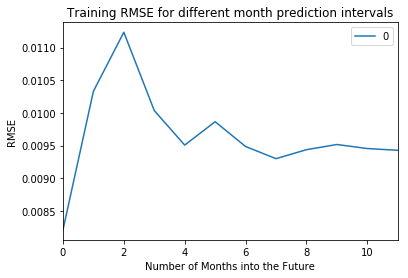

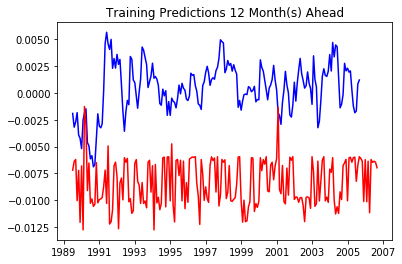

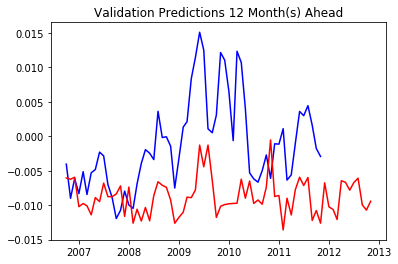

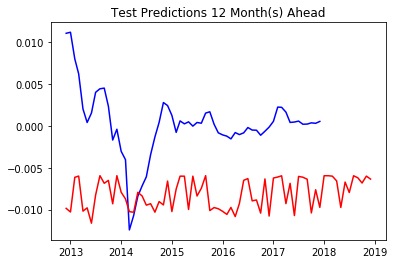

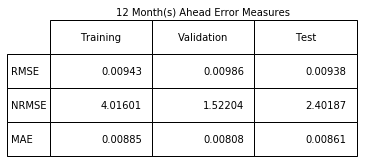

4
ADF Statistic: -2.977440
p-value: 0.037056
ADF Statistic: -4.290013
p-value: 0.000462
hello!!!!!
(205, 9)
(205, 1, 9)
(74, 9)
Epoch 1/100
205/205 [==============================] - 5s 25ms/step - loss: 1.1164
Epoch 2/100
205/205 [==============================] - 0s 22us/step - loss: 1.1324
Epoch 3/100
205/205 [==============================] - 0s 26us/step - loss: 1.1662
Epoch 4/100
205/205 [==============================] - 0s 28us/step - loss: 1.0913
Epoch 5/100
205/205 [==============================] - 0s 33us/step - loss: 1.1181
Epoch 6/100
205/205 [==============================] - 0s 37us/step - loss: 1.1211
Epoch 7/100
205/205 [==============================] - 0s 26us/step - loss: 1.1339
Epoch 8/100
205/205 [==============================] - 0s 31us/step - loss: 1.1698
Epoch 9/100
205/205 [==============================] - 0s 39us/step - loss: 1.1401
Epoch 10/100
205/205 [==============================] - 0s 37us/step - loss: 1.1597
Epoch 11/100
205/205 [===================

Epoch 98/100
205/205 [==============================] - 0s 24us/step - loss: 1.1027
Epoch 99/100
205/205 [==============================] - 0s 30us/step - loss: 1.0969
Epoch 100/100
205/205 [==============================] - 0s 36us/step - loss: 1.0878
Epoch 1/100
205/205 [==============================] - 4s 21ms/step - loss: 1.3812
Epoch 2/100
205/205 [==============================] - 0s 23us/step - loss: 1.2942
Epoch 3/100
205/205 [==============================] - 0s 23us/step - loss: 1.2163
Epoch 4/100
205/205 [==============================] - 0s 26us/step - loss: 1.2910
Epoch 5/100
205/205 [==============================] - 0s 39us/step - loss: 1.2487
Epoch 6/100
205/205 [==============================] - 0s 33us/step - loss: 1.2505
Epoch 7/100
205/205 [==============================] - 0s 36us/step - loss: 1.3150
Epoch 8/100
205/205 [==============================] - 0s 31us/step - loss: 1.2658
Epoch 9/100
205/205 [==============================] - 0s 20us/step - loss: 1.2368


Epoch 96/100
205/205 [==============================] - 0s 23us/step - loss: 1.0319
Epoch 97/100
205/205 [==============================] - 0s 23us/step - loss: 1.0188
Epoch 98/100
205/205 [==============================] - 0s 23us/step - loss: 1.0195
Epoch 99/100
205/205 [==============================] - 0s 29us/step - loss: 0.9989
Epoch 100/100
205/205 [==============================] - 0s 20us/step - loss: 0.9826
Epoch 1/100
205/205 [==============================] - 4s 21ms/step - loss: 1.0891
Epoch 2/100
205/205 [==============================] - 0s 21us/step - loss: 0.9306
Epoch 3/100
205/205 [==============================] - 0s 23us/step - loss: 0.9380
Epoch 4/100
205/205 [==============================] - 0s 32us/step - loss: 0.9575
Epoch 5/100
205/205 [==============================] - 0s 46us/step - loss: 0.9208
Epoch 6/100
205/205 [==============================] - 0s 32us/step - loss: 0.8839
Epoch 7/100
205/205 [==============================] - 0s 29us/step - loss: 0.876

Epoch 94/100
205/205 [==============================] - 0s 26us/step - loss: 0.4317
Epoch 95/100
205/205 [==============================] - 0s 29us/step - loss: 0.4077
Epoch 96/100
205/205 [==============================] - 0s 29us/step - loss: 0.4614
Epoch 97/100
205/205 [==============================] - 0s 24us/step - loss: 0.4153
Epoch 98/100
205/205 [==============================] - 0s 25us/step - loss: 0.4517
Epoch 99/100
205/205 [==============================] - 0s 24us/step - loss: 0.3914
Epoch 100/100
205/205 [==============================] - 0s 24us/step - loss: 0.4151
Epoch 1/100
205/205 [==============================] - 4s 21ms/step - loss: 1.0125
Epoch 2/100
205/205 [==============================] - 0s 23us/step - loss: 1.0034
Epoch 3/100
205/205 [==============================] - 0s 30us/step - loss: 0.9909
Epoch 4/100
205/205 [==============================] - 0s 38us/step - loss: 0.8764
Epoch 5/100
205/205 [==============================] - 0s 47us/step - loss: 0.8

Epoch 92/100
205/205 [==============================] - 0s 19us/step - loss: 0.5132
Epoch 93/100
205/205 [==============================] - 0s 25us/step - loss: 0.6478
Epoch 94/100
205/205 [==============================] - 0s 34us/step - loss: 0.4187
Epoch 95/100
205/205 [==============================] - 0s 28us/step - loss: 0.5351
Epoch 96/100
205/205 [==============================] - 0s 28us/step - loss: 0.5202
Epoch 97/100
205/205 [==============================] - 0s 28us/step - loss: 0.5396
Epoch 98/100
205/205 [==============================] - 0s 26us/step - loss: 0.4575
Epoch 99/100
205/205 [==============================] - 0s 29us/step - loss: 0.5147
Epoch 100/100
205/205 [==============================] - 0s 31us/step - loss: 0.4772
Epoch 1/100
205/205 [==============================] - 4s 21ms/step - loss: 1.1701
Epoch 2/100
205/205 [==============================] - 0s 23us/step - loss: 1.1346
Epoch 3/100
205/205 [==============================] - 0s 25us/step - loss: 1

Epoch 90/100
205/205 [==============================] - 0s 23us/step - loss: 1.1411
Epoch 91/100
205/205 [==============================] - 0s 24us/step - loss: 1.1232
Epoch 92/100
205/205 [==============================] - 0s 23us/step - loss: 1.1057
Epoch 93/100
205/205 [==============================] - 0s 23us/step - loss: 1.1154
Epoch 94/100
205/205 [==============================] - 0s 31us/step - loss: 1.0844
Epoch 95/100
205/205 [==============================] - 0s 20us/step - loss: 1.1135
Epoch 96/100
205/205 [==============================] - 0s 22us/step - loss: 1.0773
Epoch 97/100
205/205 [==============================] - 0s 19us/step - loss: 1.1073
Epoch 98/100
205/205 [==============================] - 0s 24us/step - loss: 1.1267
Epoch 99/100
205/205 [==============================] - 0s 21us/step - loss: 1.0947
Epoch 100/100
205/205 [==============================] - 0s 20us/step - loss: 1.1219
Epoch 1/100
205/205 [==============================] - 5s 22ms/step - loss:

Epoch 88/100
205/205 [==============================] - 0s 19us/step - loss: 0.7619
Epoch 89/100
205/205 [==============================] - 0s 25us/step - loss: 0.7858
Epoch 90/100
205/205 [==============================] - 0s 33us/step - loss: 0.6977
Epoch 91/100
205/205 [==============================] - 0s 31us/step - loss: 0.7278
Epoch 92/100
205/205 [==============================] - 0s 26us/step - loss: 0.6988
Epoch 93/100
205/205 [==============================] - 0s 20us/step - loss: 0.7333
Epoch 94/100
205/205 [==============================] - 0s 27us/step - loss: 0.7282
Epoch 95/100
205/205 [==============================] - 0s 22us/step - loss: 0.7424
Epoch 96/100
205/205 [==============================] - 0s 22us/step - loss: 0.7393
Epoch 97/100
205/205 [==============================] - 0s 38us/step - loss: 0.7581
Epoch 98/100
205/205 [==============================] - 0s 21us/step - loss: 0.7694
Epoch 99/100
205/205 [==============================] - 0s 20us/step - loss:

Epoch 86/100
205/205 [==============================] - 0s 27us/step - loss: 0.4050
Epoch 87/100
205/205 [==============================] - 0s 28us/step - loss: 0.4293
Epoch 88/100
205/205 [==============================] - 0s 24us/step - loss: 0.3594
Epoch 89/100
205/205 [==============================] - 0s 29us/step - loss: 0.4239
Epoch 90/100
205/205 [==============================] - 0s 23us/step - loss: 0.3740
Epoch 91/100
205/205 [==============================] - 0s 27us/step - loss: 0.3697
Epoch 92/100
205/205 [==============================] - 0s 23us/step - loss: 0.3999
Epoch 93/100
205/205 [==============================] - 0s 21us/step - loss: 0.3655
Epoch 94/100
205/205 [==============================] - 0s 22us/step - loss: 0.3614
Epoch 95/100
205/205 [==============================] - 0s 31us/step - loss: 0.4184
Epoch 96/100
205/205 [==============================] - 0s 23us/step - loss: 0.4199
Epoch 97/100
205/205 [==============================] - 0s 23us/step - loss:

Epoch 84/100
205/205 [==============================] - 0s 36us/step - loss: 0.4528
Epoch 85/100
205/205 [==============================] - 0s 30us/step - loss: 0.4410
Epoch 86/100
205/205 [==============================] - 0s 28us/step - loss: 0.4789
Epoch 87/100
205/205 [==============================] - 0s 27us/step - loss: 0.4137
Epoch 88/100
205/205 [==============================] - 0s 22us/step - loss: 0.3878
Epoch 89/100
205/205 [==============================] - 0s 24us/step - loss: 0.3783
Epoch 90/100
205/205 [==============================] - 0s 24us/step - loss: 0.2849
Epoch 91/100
205/205 [==============================] - 0s 33us/step - loss: 0.3829
Epoch 92/100
205/205 [==============================] - 0s 26us/step - loss: 0.3339
Epoch 93/100
205/205 [==============================] - 0s 37us/step - loss: 0.3908
Epoch 94/100
205/205 [==============================] - 0s 34us/step - loss: 0.4310
Epoch 95/100
205/205 [==============================] - 0s 26us/step - loss:

Epoch 82/100
205/205 [==============================] - 0s 26us/step - loss: 1.1883
Epoch 83/100
205/205 [==============================] - 0s 28us/step - loss: 1.1983
Epoch 84/100
205/205 [==============================] - 0s 29us/step - loss: 1.1783
Epoch 85/100
205/205 [==============================] - 0s 36us/step - loss: 1.2361
Epoch 86/100
205/205 [==============================] - 0s 38us/step - loss: 1.1910
Epoch 87/100
205/205 [==============================] - 0s 32us/step - loss: 1.2562
Epoch 88/100
205/205 [==============================] - 0s 27us/step - loss: 1.1672
Epoch 89/100
205/205 [==============================] - 0s 29us/step - loss: 1.2202
Epoch 90/100
205/205 [==============================] - 0s 28us/step - loss: 1.1732
Epoch 91/100
205/205 [==============================] - 0s 28us/step - loss: 1.2430
Epoch 92/100
205/205 [==============================] - 0s 38us/step - loss: 1.2117
Epoch 93/100
205/205 [==============================] - 0s 29us/step - loss:

Epoch 80/100
205/205 [==============================] - 0s 34us/step - loss: 0.6629
Epoch 81/100
205/205 [==============================] - 0s 32us/step - loss: 0.6333
Epoch 82/100
205/205 [==============================] - 0s 36us/step - loss: 0.6643
Epoch 83/100
205/205 [==============================] - 0s 22us/step - loss: 0.6016
Epoch 84/100
205/205 [==============================] - 0s 25us/step - loss: 0.6619
Epoch 85/100
205/205 [==============================] - 0s 26us/step - loss: 0.6088
Epoch 86/100
205/205 [==============================] - 0s 30us/step - loss: 0.6416
Epoch 87/100
205/205 [==============================] - 0s 32us/step - loss: 0.6249
Epoch 88/100
205/205 [==============================] - 0s 24us/step - loss: 0.6096
Epoch 89/100
205/205 [==============================] - 0s 27us/step - loss: 0.6276
Epoch 90/100
205/205 [==============================] - 0s 27us/step - loss: 0.6393
Epoch 91/100
205/205 [==============================] - 0s 28us/step - loss:

205/205 [==============================] - 0s 30us/step - loss: 0.2841
Epoch 78/100
205/205 [==============================] - 0s 25us/step - loss: 0.3216
Epoch 79/100
205/205 [==============================] - 0s 30us/step - loss: 0.3109
Epoch 80/100
205/205 [==============================] - 0s 25us/step - loss: 0.3506
Epoch 81/100
205/205 [==============================] - 0s 22us/step - loss: 0.3125
Epoch 82/100
205/205 [==============================] - 0s 19us/step - loss: 0.2870
Epoch 83/100
205/205 [==============================] - 0s 24us/step - loss: 0.2994
Epoch 84/100
205/205 [==============================] - 0s 22us/step - loss: 0.3080
Epoch 85/100
205/205 [==============================] - 0s 26us/step - loss: 0.3463
Epoch 86/100
205/205 [==============================] - 0s 20us/step - loss: 0.3183
Epoch 87/100
205/205 [==============================] - 0s 22us/step - loss: 0.2886
Epoch 88/100
205/205 [==============================] - 0s 22us/step - loss: 0.3073
Epoch

Epoch 75/100
205/205 [==============================] - 0s 28us/step - loss: 0.4257
Epoch 76/100
205/205 [==============================] - 0s 30us/step - loss: 0.4245
Epoch 77/100
205/205 [==============================] - 0s 23us/step - loss: 0.4651
Epoch 78/100
205/205 [==============================] - 0s 20us/step - loss: 0.3148
Epoch 79/100
205/205 [==============================] - 0s 29us/step - loss: 0.3257
Epoch 80/100
205/205 [==============================] - 0s 25us/step - loss: 0.3274
Epoch 81/100
205/205 [==============================] - 0s 20us/step - loss: 0.3670
Epoch 82/100
205/205 [==============================] - 0s 32us/step - loss: 0.5301
Epoch 83/100
205/205 [==============================] - 0s 43us/step - loss: 0.3910
Epoch 84/100
205/205 [==============================] - 0s 49us/step - loss: 0.3545
Epoch 85/100
205/205 [==============================] - 0s 44us/step - loss: 0.3266
Epoch 86/100
205/205 [==============================] - 0s 56us/step - loss:

205/205 [==============================] - 0s 34us/step - loss: 0.7842
Epoch 73/100
205/205 [==============================] - 0s 33us/step - loss: 0.8217
Epoch 74/100
205/205 [==============================] - 0s 27us/step - loss: 0.8007
Epoch 75/100
205/205 [==============================] - 0s 25us/step - loss: 0.8454
Epoch 76/100
205/205 [==============================] - 0s 28us/step - loss: 0.8400
Epoch 77/100
205/205 [==============================] - 0s 28us/step - loss: 0.7863
Epoch 78/100
205/205 [==============================] - 0s 26us/step - loss: 0.8371
Epoch 79/100
205/205 [==============================] - 0s 32us/step - loss: 0.8335
Epoch 80/100
205/205 [==============================] - 0s 27us/step - loss: 0.8269
Epoch 81/100
205/205 [==============================] - 0s 25us/step - loss: 0.7938
Epoch 82/100
205/205 [==============================] - 0s 25us/step - loss: 0.8290
Epoch 83/100
205/205 [==============================] - 0s 37us/step - loss: 0.8147
Epoch

Epoch 70/100
205/205 [==============================] - 0s 24us/step - loss: 0.5396
Epoch 71/100
205/205 [==============================] - 0s 23us/step - loss: 0.5558
Epoch 72/100
205/205 [==============================] - 0s 26us/step - loss: 0.5349
Epoch 73/100
205/205 [==============================] - 0s 31us/step - loss: 0.5317
Epoch 74/100
205/205 [==============================] - 0s 21us/step - loss: 0.5360
Epoch 75/100
205/205 [==============================] - 0s 25us/step - loss: 0.5376
Epoch 76/100
205/205 [==============================] - 0s 23us/step - loss: 0.5324
Epoch 77/100
205/205 [==============================] - 0s 26us/step - loss: 0.5549
Epoch 78/100
205/205 [==============================] - 0s 32us/step - loss: 0.5329
Epoch 79/100
205/205 [==============================] - 0s 22us/step - loss: 0.5182
Epoch 80/100
205/205 [==============================] - 0s 30us/step - loss: 0.5093
Epoch 81/100
205/205 [==============================] - 0s 22us/step - loss:

Epoch 68/100
205/205 [==============================] - 0s 34us/step - loss: 0.2848
Epoch 69/100
205/205 [==============================] - 0s 31us/step - loss: 0.2521
Epoch 70/100
205/205 [==============================] - 0s 26us/step - loss: 0.3152
Epoch 71/100
205/205 [==============================] - 0s 62us/step - loss: 0.3018
Epoch 72/100
205/205 [==============================] - 0s 25us/step - loss: 0.2755
Epoch 73/100
205/205 [==============================] - 0s 33us/step - loss: 0.2863
Epoch 74/100
205/205 [==============================] - 0s 43us/step - loss: 0.2793
Epoch 75/100
205/205 [==============================] - 0s 31us/step - loss: 0.2717
Epoch 76/100
205/205 [==============================] - 0s 31us/step - loss: 0.2786
Epoch 77/100
205/205 [==============================] - 0s 31us/step - loss: 0.2726
Epoch 78/100
205/205 [==============================] - 0s 32us/step - loss: 0.2693
Epoch 79/100
205/205 [==============================] - 0s 28us/step - loss:

Epoch 66/100
205/205 [==============================] - 0s 29us/step - loss: 0.3141
Epoch 67/100
205/205 [==============================] - 0s 25us/step - loss: 0.5800
Epoch 68/100
205/205 [==============================] - 0s 24us/step - loss: 0.4454
Epoch 69/100
205/205 [==============================] - 0s 24us/step - loss: 0.2878
Epoch 70/100
205/205 [==============================] - 0s 47us/step - loss: 0.2922
Epoch 71/100
205/205 [==============================] - 0s 36us/step - loss: 0.2164
Epoch 72/100
205/205 [==============================] - 0s 39us/step - loss: 0.2671
Epoch 73/100
205/205 [==============================] - 0s 30us/step - loss: 0.2867
Epoch 74/100
205/205 [==============================] - 0s 25us/step - loss: 0.4002
Epoch 75/100
205/205 [==============================] - 0s 33us/step - loss: 0.2659
Epoch 76/100
205/205 [==============================] - 0s 31us/step - loss: 0.2676
Epoch 77/100
205/205 [==============================] - 0s 41us/step - loss:

Epoch 64/100
205/205 [==============================] - 0s 32us/step - loss: 0.9015
Epoch 65/100
205/205 [==============================] - 0s 44us/step - loss: 0.8953
Epoch 66/100
205/205 [==============================] - 0s 45us/step - loss: 0.8546
Epoch 67/100
205/205 [==============================] - 0s 43us/step - loss: 0.8854
Epoch 68/100
205/205 [==============================] - 0s 33us/step - loss: 0.8871
Epoch 69/100
205/205 [==============================] - 0s 35us/step - loss: 0.9064
Epoch 70/100
205/205 [==============================] - 0s 38us/step - loss: 0.8946
Epoch 71/100
205/205 [==============================] - 0s 41us/step - loss: 0.8944
Epoch 72/100
205/205 [==============================] - 0s 38us/step - loss: 0.9051
Epoch 73/100
205/205 [==============================] - 0s 41us/step - loss: 0.8669
Epoch 74/100
205/205 [==============================] - 0s 43us/step - loss: 0.8590
Epoch 75/100
205/205 [==============================] - 0s 52us/step - loss:

Epoch 62/100
205/205 [==============================] - 0s 38us/step - loss: 0.5115
Epoch 63/100
205/205 [==============================] - 0s 32us/step - loss: 0.5125
Epoch 64/100
205/205 [==============================] - 0s 32us/step - loss: 0.5313
Epoch 65/100
205/205 [==============================] - 0s 34us/step - loss: 0.5390
Epoch 66/100
205/205 [==============================] - 0s 32us/step - loss: 0.5274
Epoch 67/100
205/205 [==============================] - 0s 36us/step - loss: 0.5180
Epoch 68/100
205/205 [==============================] - 0s 38us/step - loss: 0.5002
Epoch 69/100
205/205 [==============================] - 0s 34us/step - loss: 0.5273
Epoch 70/100
205/205 [==============================] - 0s 49us/step - loss: 0.5012
Epoch 71/100
205/205 [==============================] - 0s 31us/step - loss: 0.4755
Epoch 72/100
205/205 [==============================] - 0s 46us/step - loss: 0.4907
Epoch 73/100
205/205 [==============================] - 0s 32us/step - loss:

Epoch 60/100
205/205 [==============================] - 0s 30us/step - loss: 0.2654
Epoch 61/100
205/205 [==============================] - 0s 33us/step - loss: 0.2757
Epoch 62/100
205/205 [==============================] - 0s 35us/step - loss: 0.2526
Epoch 63/100
205/205 [==============================] - 0s 37us/step - loss: 0.2877
Epoch 64/100
205/205 [==============================] - 0s 33us/step - loss: 0.2496
Epoch 65/100
205/205 [==============================] - 0s 38us/step - loss: 0.2705
Epoch 66/100
205/205 [==============================] - 0s 44us/step - loss: 0.2771
Epoch 67/100
205/205 [==============================] - 0s 41us/step - loss: 0.2660
Epoch 68/100
205/205 [==============================] - 0s 56us/step - loss: 0.2447
Epoch 69/100
205/205 [==============================] - 0s 60us/step - loss: 0.2711
Epoch 70/100
205/205 [==============================] - 0s 52us/step - loss: 0.2831
Epoch 71/100
205/205 [==============================] - 0s 48us/step - loss:

Epoch 58/100
205/205 [==============================] - 0s 41us/step - loss: 0.3066
Epoch 59/100
205/205 [==============================] - 0s 45us/step - loss: 0.3458
Epoch 60/100
205/205 [==============================] - 0s 44us/step - loss: 0.4335
Epoch 61/100
205/205 [==============================] - 0s 41us/step - loss: 0.3925
Epoch 62/100
205/205 [==============================] - 0s 39us/step - loss: 0.4713
Epoch 63/100
205/205 [==============================] - 0s 45us/step - loss: 0.5706
Epoch 64/100
205/205 [==============================] - 0s 42us/step - loss: 0.2873
Epoch 65/100
205/205 [==============================] - 0s 36us/step - loss: 0.2863
Epoch 66/100
205/205 [==============================] - 0s 37us/step - loss: 0.3159
Epoch 67/100
205/205 [==============================] - 0s 48us/step - loss: 0.3977
Epoch 68/100
205/205 [==============================] - 0s 41us/step - loss: 0.3419
Epoch 69/100
205/205 [==============================] - 0s 39us/step - loss:

205/205 [==============================] - 1s 4ms/step - loss: 0.3375
Epoch 56/100
205/205 [==============================] - 1s 4ms/step - loss: 0.4047
Epoch 57/100
205/205 [==============================] - 1s 4ms/step - loss: 0.3103
Epoch 58/100
205/205 [==============================] - 1s 4ms/step - loss: 0.3788
Epoch 59/100
205/205 [==============================] - 1s 4ms/step - loss: 0.3451
Epoch 60/100
205/205 [==============================] - 1s 4ms/step - loss: 0.3432A: 0s 
Epoch 61/100
205/205 [==============================] - 1s 4ms/step - loss: 0.3475
Epoch 62/100
205/205 [==============================] - 1s 4ms/step - loss: 0.3257
Epoch 63/100
205/205 [==============================] - 1s 4ms/step - loss: 0.3781
Epoch 64/100
205/205 [==============================] - 1s 4ms/step - loss: 0.3418
Epoch 65/100
205/205 [==============================] - 1s 4ms/step - loss: 0.3081
Epoch 66/100
205/205 [==============================] - 1s 4ms/step - loss: 0.3464
Epoch 67/10

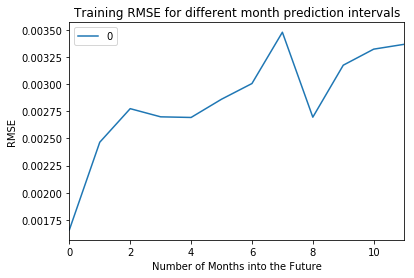

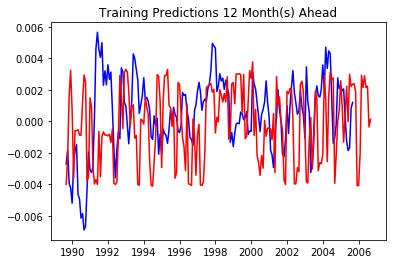

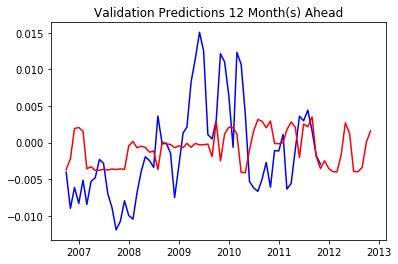

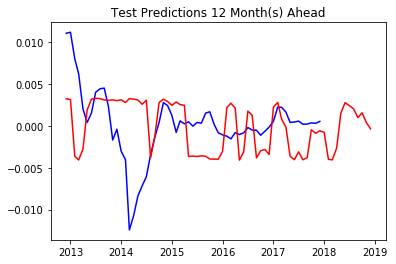

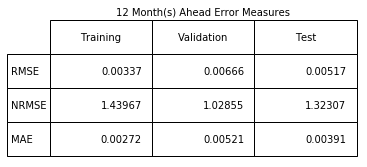

5
ADF Statistic: -2.977440
p-value: 0.037056
ADF Statistic: -4.280038
p-value: 0.000481
hello!!!!!
(203, 11)
(203, 1, 11)
(74, 11)
Epoch 1/100
203/203 [==============================] - 6s 30ms/step - loss: 1.1697
Epoch 2/100
203/203 [==============================] - 0s 28us/step - loss: 1.0789
Epoch 3/100
203/203 [==============================] - 0s 20us/step - loss: 1.0786
Epoch 4/100
203/203 [==============================] - 0s 21us/step - loss: 1.1454
Epoch 5/100
203/203 [==============================] - 0s 22us/step - loss: 1.1828
Epoch 6/100
203/203 [==============================] - 0s 21us/step - loss: 1.1037
Epoch 7/100
203/203 [==============================] - 0s 29us/step - loss: 1.1003
Epoch 8/100
203/203 [==============================] - 0s 21us/step - loss: 1.0711
Epoch 9/100
203/203 [==============================] - 0s 23us/step - loss: 1.1267
Epoch 10/100
203/203 [==============================] - 0s 20us/step - loss: 1.0944
Epoch 11/100
203/203 [================

203/203 [==============================] - 0s 27us/step - loss: 1.0769
Epoch 98/100
203/203 [==============================] - 0s 21us/step - loss: 1.0439
Epoch 99/100
203/203 [==============================] - 0s 19us/step - loss: 1.0676
Epoch 100/100
203/203 [==============================] - 0s 24us/step - loss: 1.0935
Epoch 1/100
203/203 [==============================] - 6s 30ms/step - loss: 1.1976
Epoch 2/100
203/203 [==============================] - 0s 22us/step - loss: 1.0647
Epoch 3/100
203/203 [==============================] - 0s 21us/step - loss: 1.0756
Epoch 4/100
203/203 [==============================] - 0s 21us/step - loss: 1.0362
Epoch 5/100
203/203 [==============================] - 0s 21us/step - loss: 1.0863
Epoch 6/100
203/203 [==============================] - 0s 26us/step - loss: 1.0848
Epoch 7/100
203/203 [==============================] - 0s 20us/step - loss: 1.0142
Epoch 8/100
203/203 [==============================] - 0s 21us/step - loss: 0.9944
Epoch 9/100


Epoch 95/100
203/203 [==============================] - 0s 24us/step - loss: 0.7308
Epoch 96/100
203/203 [==============================] - 0s 25us/step - loss: 0.7342
Epoch 97/100
203/203 [==============================] - 0s 23us/step - loss: 0.7364
Epoch 98/100
203/203 [==============================] - 0s 23us/step - loss: 0.7800
Epoch 99/100
203/203 [==============================] - 0s 23us/step - loss: 0.6823
Epoch 100/100
203/203 [==============================] - 0s 21us/step - loss: 0.6581
Epoch 1/100
203/203 [==============================] - 6s 30ms/step - loss: 0.9390
Epoch 2/100
203/203 [==============================] - 0s 22us/step - loss: 0.9178
Epoch 3/100
203/203 [==============================] - 0s 25us/step - loss: 0.8732
Epoch 4/100
203/203 [==============================] - 0s 20us/step - loss: 0.8676
Epoch 5/100
203/203 [==============================] - 0s 21us/step - loss: 0.7916
Epoch 6/100
203/203 [==============================] - 0s 25us/step - loss: 0.77

Epoch 93/100
203/203 [==============================] - 0s 26us/step - loss: 0.4314
Epoch 94/100
203/203 [==============================] - 0s 30us/step - loss: 0.4539
Epoch 95/100
203/203 [==============================] - 0s 27us/step - loss: 0.4211
Epoch 96/100
203/203 [==============================] - 0s 25us/step - loss: 0.4250
Epoch 97/100
203/203 [==============================] - 0s 23us/step - loss: 0.4538
Epoch 98/100
203/203 [==============================] - 0s 22us/step - loss: 0.4138
Epoch 99/100
203/203 [==============================] - 0s 26us/step - loss: 0.4844
Epoch 100/100
203/203 [==============================] - 0s 30us/step - loss: 0.4447
Epoch 1/100
203/203 [==============================] - 6s 32ms/step - loss: 0.9231
Epoch 2/100
203/203 [==============================] - 0s 20us/step - loss: 1.0082
Epoch 3/100
203/203 [==============================] - 0s 28us/step - loss: 0.9185
Epoch 4/100
203/203 [==============================] - 0s 21us/step - loss: 0.

Epoch 91/100
203/203 [==============================] - 0s 23us/step - loss: 0.5036
Epoch 92/100
203/203 [==============================] - 0s 25us/step - loss: 0.5104
Epoch 93/100
203/203 [==============================] - 0s 26us/step - loss: 0.5652
Epoch 94/100
203/203 [==============================] - 0s 26us/step - loss: 0.4560
Epoch 95/100
203/203 [==============================] - 0s 22us/step - loss: 0.5237
Epoch 96/100
203/203 [==============================] - 0s 26us/step - loss: 0.5355
Epoch 97/100
203/203 [==============================] - 0s 27us/step - loss: 0.5297
Epoch 98/100
203/203 [==============================] - 0s 30us/step - loss: 0.5630
Epoch 99/100
203/203 [==============================] - 0s 25us/step - loss: 0.4424
Epoch 100/100
203/203 [==============================] - 0s 27us/step - loss: 0.5310
Epoch 1/100
203/203 [==============================] - 6s 32ms/step - loss: 1.0603
Epoch 2/100
203/203 [==============================] - 0s 22us/step - loss: 

Epoch 89/100
203/203 [==============================] - 0s 26us/step - loss: 0.9837
Epoch 90/100
203/203 [==============================] - 0s 33us/step - loss: 0.9998
Epoch 91/100
203/203 [==============================] - 0s 23us/step - loss: 0.9606
Epoch 92/100
203/203 [==============================] - 0s 29us/step - loss: 1.0190
Epoch 93/100
203/203 [==============================] - 0s 23us/step - loss: 0.9994
Epoch 94/100
203/203 [==============================] - 0s 35us/step - loss: 0.9685
Epoch 95/100
203/203 [==============================] - 0s 23us/step - loss: 0.9706
Epoch 96/100
203/203 [==============================] - 0s 20us/step - loss: 0.9508
Epoch 97/100
203/203 [==============================] - 0s 24us/step - loss: 0.9723
Epoch 98/100
203/203 [==============================] - 0s 38us/step - loss: 0.9534
Epoch 99/100
203/203 [==============================] - 0s 24us/step - loss: 1.0023
Epoch 100/100
203/203 [==============================] - 0s 21us/step - loss

Epoch 87/100
203/203 [==============================] - 0s 22us/step - loss: 0.7938
Epoch 88/100
203/203 [==============================] - 0s 29us/step - loss: 0.7806
Epoch 89/100
203/203 [==============================] - 0s 25us/step - loss: 0.7881
Epoch 90/100
203/203 [==============================] - 0s 27us/step - loss: 0.8428
Epoch 91/100
203/203 [==============================] - 0s 22us/step - loss: 0.7719
Epoch 92/100
203/203 [==============================] - 0s 29us/step - loss: 0.7963
Epoch 93/100
203/203 [==============================] - 0s 21us/step - loss: 0.7674
Epoch 94/100
203/203 [==============================] - 0s 24us/step - loss: 0.8120
Epoch 95/100
203/203 [==============================] - 0s 24us/step - loss: 0.8443
Epoch 96/100
203/203 [==============================] - 0s 28us/step - loss: 0.8393
Epoch 97/100
203/203 [==============================] - 0s 27us/step - loss: 0.8022
Epoch 98/100
203/203 [==============================] - 0s 31us/step - loss:

Epoch 85/100
203/203 [==============================] - 0s 22us/step - loss: 0.4097
Epoch 86/100
203/203 [==============================] - 0s 27us/step - loss: 0.3533
Epoch 87/100
203/203 [==============================] - 0s 25us/step - loss: 0.4132
Epoch 88/100
203/203 [==============================] - 0s 34us/step - loss: 0.3334
Epoch 89/100
203/203 [==============================] - 0s 21us/step - loss: 0.3416
Epoch 90/100
203/203 [==============================] - 0s 27us/step - loss: 0.3837
Epoch 91/100
203/203 [==============================] - 0s 19us/step - loss: 0.3902
Epoch 92/100
203/203 [==============================] - 0s 29us/step - loss: 0.3220
Epoch 93/100
203/203 [==============================] - 0s 22us/step - loss: 0.2806
Epoch 94/100
203/203 [==============================] - 0s 44us/step - loss: 0.3297
Epoch 95/100
203/203 [==============================] - 0s 28us/step - loss: 0.3692
Epoch 96/100
203/203 [==============================] - 0s 22us/step - loss:

Epoch 83/100
203/203 [==============================] - 0s 19us/step - loss: 0.3919
Epoch 84/100
203/203 [==============================] - 0s 20us/step - loss: 0.4371
Epoch 85/100
203/203 [==============================] - 0s 24us/step - loss: 0.4541
Epoch 86/100
203/203 [==============================] - 0s 19us/step - loss: 0.3782
Epoch 87/100
203/203 [==============================] - 0s 22us/step - loss: 0.3854
Epoch 88/100
203/203 [==============================] - 0s 19us/step - loss: 0.3596
Epoch 89/100
203/203 [==============================] - 0s 19us/step - loss: 0.4128
Epoch 90/100
203/203 [==============================] - 0s 20us/step - loss: 0.3479
Epoch 91/100
203/203 [==============================] - 0s 21us/step - loss: 0.4187
Epoch 92/100
203/203 [==============================] - 0s 22us/step - loss: 0.3854
Epoch 93/100
203/203 [==============================] - 0s 27us/step - loss: 0.3993
Epoch 94/100
203/203 [==============================] - 0s 23us/step - loss:

Epoch 81/100
203/203 [==============================] - 0s 25us/step - loss: 1.0869
Epoch 82/100
203/203 [==============================] - 0s 25us/step - loss: 1.0978
Epoch 83/100
203/203 [==============================] - 0s 25us/step - loss: 1.0600
Epoch 84/100
203/203 [==============================] - 0s 33us/step - loss: 1.0753
Epoch 85/100
203/203 [==============================] - 0s 29us/step - loss: 1.0589
Epoch 86/100
203/203 [==============================] - 0s 21us/step - loss: 1.0371
Epoch 87/100
203/203 [==============================] - 0s 19us/step - loss: 1.0607
Epoch 88/100
203/203 [==============================] - 0s 28us/step - loss: 1.0891
Epoch 89/100
203/203 [==============================] - 0s 20us/step - loss: 1.0894
Epoch 90/100
203/203 [==============================] - 0s 28us/step - loss: 1.0626
Epoch 91/100
203/203 [==============================] - 0s 33us/step - loss: 1.0340
Epoch 92/100
203/203 [==============================] - 0s 31us/step - loss:

Epoch 79/100
203/203 [==============================] - 0s 32us/step - loss: 0.4900
Epoch 80/100
203/203 [==============================] - 0s 29us/step - loss: 0.5153
Epoch 81/100
203/203 [==============================] - 0s 28us/step - loss: 0.5259
Epoch 82/100
203/203 [==============================] - 0s 35us/step - loss: 0.5145
Epoch 83/100
203/203 [==============================] - 0s 23us/step - loss: 0.5483
Epoch 84/100
203/203 [==============================] - 0s 38us/step - loss: 0.4811
Epoch 85/100
203/203 [==============================] - 0s 28us/step - loss: 0.5125
Epoch 86/100
203/203 [==============================] - 0s 25us/step - loss: 0.5046
Epoch 87/100
203/203 [==============================] - 0s 24us/step - loss: 0.5053
Epoch 88/100
203/203 [==============================] - 0s 25us/step - loss: 0.4730
Epoch 89/100
203/203 [==============================] - 0s 29us/step - loss: 0.4970
Epoch 90/100
203/203 [==============================] - 0s 33us/step - loss:

203/203 [==============================] - 0s 22us/step - loss: 0.3135
Epoch 77/100
203/203 [==============================] - 0s 26us/step - loss: 0.2721
Epoch 78/100
203/203 [==============================] - 0s 25us/step - loss: 0.2953
Epoch 79/100
203/203 [==============================] - 0s 27us/step - loss: 0.3310
Epoch 80/100
203/203 [==============================] - 0s 22us/step - loss: 0.3187
Epoch 81/100
203/203 [==============================] - 0s 25us/step - loss: 0.3209
Epoch 82/100
203/203 [==============================] - 0s 25us/step - loss: 0.3027
Epoch 83/100
203/203 [==============================] - 0s 20us/step - loss: 0.3241
Epoch 84/100
203/203 [==============================] - 0s 20us/step - loss: 0.3285
Epoch 85/100
203/203 [==============================] - 0s 19us/step - loss: 0.3058
Epoch 86/100
203/203 [==============================] - 0s 20us/step - loss: 0.3248
Epoch 87/100
203/203 [==============================] - 0s 23us/step - loss: 0.2724
Epoch

Epoch 74/100
203/203 [==============================] - 0s 30us/step - loss: 0.3378
Epoch 75/100
203/203 [==============================] - 0s 22us/step - loss: 0.3111
Epoch 76/100
203/203 [==============================] - 0s 45us/step - loss: 0.3269
Epoch 77/100
203/203 [==============================] - 0s 28us/step - loss: 0.3212
Epoch 78/100
203/203 [==============================] - 0s 22us/step - loss: 0.3203
Epoch 79/100
203/203 [==============================] - 0s 25us/step - loss: 0.3433
Epoch 80/100
203/203 [==============================] - 0s 21us/step - loss: 0.3796
Epoch 81/100
203/203 [==============================] - 0s 24us/step - loss: 0.3919
Epoch 82/100
203/203 [==============================] - 0s 23us/step - loss: 0.3064
Epoch 83/100
203/203 [==============================] - 0s 35us/step - loss: 0.3005
Epoch 84/100
203/203 [==============================] - 0s 20us/step - loss: 0.3472
Epoch 85/100
203/203 [==============================] - 0s 31us/step - loss:

203/203 [==============================] - 0s 27us/step - loss: 0.8492
Epoch 72/100
203/203 [==============================] - 0s 24us/step - loss: 0.8536
Epoch 73/100
203/203 [==============================] - 0s 27us/step - loss: 0.8836
Epoch 74/100
203/203 [==============================] - 0s 24us/step - loss: 0.8380
Epoch 75/100
203/203 [==============================] - 0s 29us/step - loss: 0.8551
Epoch 76/100
203/203 [==============================] - 0s 30us/step - loss: 0.8766
Epoch 77/100
203/203 [==============================] - 0s 31us/step - loss: 0.8784
Epoch 78/100
203/203 [==============================] - 0s 32us/step - loss: 0.8683
Epoch 79/100
203/203 [==============================] - 0s 31us/step - loss: 0.8345
Epoch 80/100
203/203 [==============================] - 0s 29us/step - loss: 0.8949
Epoch 81/100
203/203 [==============================] - 0s 26us/step - loss: 0.8396
Epoch 82/100
203/203 [==============================] - 0s 29us/step - loss: 0.8538
Epoch

Epoch 69/100
203/203 [==============================] - 0s 34us/step - loss: 0.5466
Epoch 70/100
203/203 [==============================] - 0s 29us/step - loss: 0.5426
Epoch 71/100
203/203 [==============================] - 0s 28us/step - loss: 0.5545
Epoch 72/100
203/203 [==============================] - 0s 27us/step - loss: 0.5137
Epoch 73/100
203/203 [==============================] - 0s 25us/step - loss: 0.5483
Epoch 74/100
203/203 [==============================] - 0s 28us/step - loss: 0.5390
Epoch 75/100
203/203 [==============================] - 0s 45us/step - loss: 0.5590
Epoch 76/100
203/203 [==============================] - 0s 30us/step - loss: 0.5227
Epoch 77/100
203/203 [==============================] - 0s 37us/step - loss: 0.5233
Epoch 78/100
203/203 [==============================] - 0s 43us/step - loss: 0.4865
Epoch 79/100
203/203 [==============================] - 0s 30us/step - loss: 0.4890
Epoch 80/100
203/203 [==============================] - 0s 48us/step - loss:

Epoch 67/100
203/203 [==============================] - 0s 24us/step - loss: 0.2855
Epoch 68/100
203/203 [==============================] - 0s 24us/step - loss: 0.2810
Epoch 69/100
203/203 [==============================] - 0s 25us/step - loss: 0.2771
Epoch 70/100
203/203 [==============================] - 0s 27us/step - loss: 0.2566
Epoch 71/100
203/203 [==============================] - 0s 43us/step - loss: 0.2911
Epoch 72/100
203/203 [==============================] - 0s 37us/step - loss: 0.2658
Epoch 73/100
203/203 [==============================] - 0s 29us/step - loss: 0.2781
Epoch 74/100
203/203 [==============================] - 0s 36us/step - loss: 0.3317
Epoch 75/100
203/203 [==============================] - 0s 36us/step - loss: 0.2646
Epoch 76/100
203/203 [==============================] - 0s 30us/step - loss: 0.2616
Epoch 77/100
203/203 [==============================] - 0s 31us/step - loss: 0.2705
Epoch 78/100
203/203 [==============================] - 0s 42us/step - loss:

Epoch 65/100
203/203 [==============================] - 0s 34us/step - loss: 0.4377
Epoch 66/100
203/203 [==============================] - 0s 33us/step - loss: 0.4473
Epoch 67/100
203/203 [==============================] - 0s 27us/step - loss: 0.4728
Epoch 68/100
203/203 [==============================] - 0s 32us/step - loss: 0.5449
Epoch 69/100
203/203 [==============================] - 0s 39us/step - loss: 0.3253
Epoch 70/100
203/203 [==============================] - 0s 39us/step - loss: 0.3317
Epoch 71/100
203/203 [==============================] - 0s 31us/step - loss: 0.3353
Epoch 72/100
203/203 [==============================] - 0s 31us/step - loss: 0.3215
Epoch 73/100
203/203 [==============================] - 0s 34us/step - loss: 0.4411
Epoch 74/100
203/203 [==============================] - 0s 31us/step - loss: 0.2761
Epoch 75/100
203/203 [==============================] - 0s 30us/step - loss: 0.2897
Epoch 76/100
203/203 [==============================] - 0s 38us/step - loss:

Epoch 63/100
203/203 [==============================] - 0s 39us/step - loss: 0.8369
Epoch 64/100
203/203 [==============================] - 0s 36us/step - loss: 0.8490
Epoch 65/100
203/203 [==============================] - 0s 46us/step - loss: 0.8340
Epoch 66/100
203/203 [==============================] - 0s 42us/step - loss: 0.8518
Epoch 67/100
203/203 [==============================] - 0s 35us/step - loss: 0.8144
Epoch 68/100
203/203 [==============================] - 0s 36us/step - loss: 0.8227
Epoch 69/100
203/203 [==============================] - 0s 32us/step - loss: 0.8427
Epoch 70/100
203/203 [==============================] - 0s 37us/step - loss: 0.8476
Epoch 71/100
203/203 [==============================] - 0s 40us/step - loss: 0.8390
Epoch 72/100
203/203 [==============================] - 0s 41us/step - loss: 0.8371
Epoch 73/100
203/203 [==============================] - 0s 49us/step - loss: 0.8474
Epoch 74/100
203/203 [==============================] - 0s 37us/step - loss:

Epoch 61/100
203/203 [==============================] - 0s 38us/step - loss: 0.4645
Epoch 62/100
203/203 [==============================] - 0s 34us/step - loss: 0.4686
Epoch 63/100
203/203 [==============================] - 0s 41us/step - loss: 0.5053
Epoch 64/100
203/203 [==============================] - 0s 34us/step - loss: 0.5017
Epoch 65/100
203/203 [==============================] - 0s 44us/step - loss: 0.4541
Epoch 66/100
203/203 [==============================] - 0s 39us/step - loss: 0.4573
Epoch 67/100
203/203 [==============================] - 0s 39us/step - loss: 0.4575
Epoch 68/100
203/203 [==============================] - 0s 38us/step - loss: 0.4716
Epoch 69/100
203/203 [==============================] - 0s 39us/step - loss: 0.4516
Epoch 70/100
203/203 [==============================] - 0s 37us/step - loss: 0.4575
Epoch 71/100
203/203 [==============================] - 0s 33us/step - loss: 0.4675
Epoch 72/100
203/203 [==============================] - 0s 54us/step - loss:

Epoch 59/100
203/203 [==============================] - 0s 33us/step - loss: 0.3095
Epoch 60/100
203/203 [==============================] - 0s 34us/step - loss: 0.3225
Epoch 61/100
203/203 [==============================] - 0s 42us/step - loss: 0.2767
Epoch 62/100
203/203 [==============================] - 0s 35us/step - loss: 0.2550
Epoch 63/100
203/203 [==============================] - 0s 41us/step - loss: 0.2566
Epoch 64/100
203/203 [==============================] - 0s 47us/step - loss: 0.2579
Epoch 65/100
203/203 [==============================] - 0s 40us/step - loss: 0.2592
Epoch 66/100
203/203 [==============================] - 0s 33us/step - loss: 0.2456
Epoch 67/100
203/203 [==============================] - 0s 37us/step - loss: 0.2464
Epoch 68/100
203/203 [==============================] - 0s 39us/step - loss: 0.2665
Epoch 69/100
203/203 [==============================] - 0s 37us/step - loss: 0.2575
Epoch 70/100
203/203 [==============================] - 0s 37us/step - loss:

Epoch 57/100
203/203 [==============================] - 0s 41us/step - loss: 0.2799
Epoch 58/100
203/203 [==============================] - 0s 42us/step - loss: 0.3324
Epoch 59/100
203/203 [==============================] - 0s 38us/step - loss: 0.4588
Epoch 60/100
203/203 [==============================] - 0s 35us/step - loss: 0.6113
Epoch 61/100
203/203 [==============================] - 0s 32us/step - loss: 0.7769
Epoch 62/100
203/203 [==============================] - 0s 32us/step - loss: 0.4465
Epoch 63/100
203/203 [==============================] - 0s 46us/step - loss: 0.5983
Epoch 64/100
203/203 [==============================] - 0s 45us/step - loss: 0.4498
Epoch 65/100
203/203 [==============================] - 0s 32us/step - loss: 0.4580
Epoch 66/100
203/203 [==============================] - 0s 37us/step - loss: 0.3567
Epoch 67/100
203/203 [==============================] - 0s 35us/step - loss: 0.4187
Epoch 68/100
203/203 [==============================] - 0s 37us/step - loss:

Epoch 55/100
203/203 [==============================] - 1s 5ms/step - loss: 0.4387
Epoch 56/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3886
Epoch 57/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3861
Epoch 58/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3587
Epoch 59/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3755
Epoch 60/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3566
Epoch 61/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3080
Epoch 62/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3687
Epoch 63/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3529
Epoch 64/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3438
Epoch 65/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3398
Epoch 66/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3099
Epoc

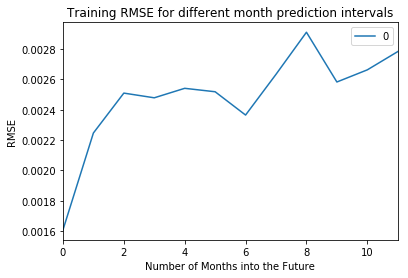

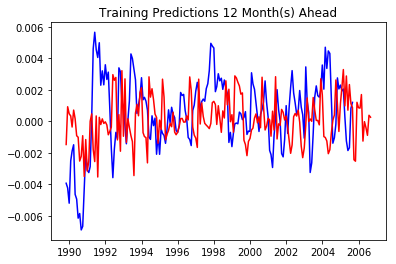

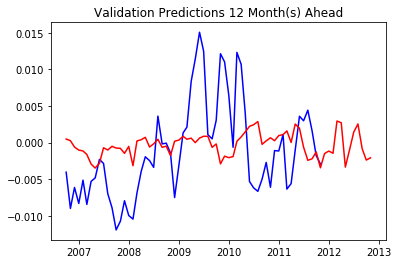

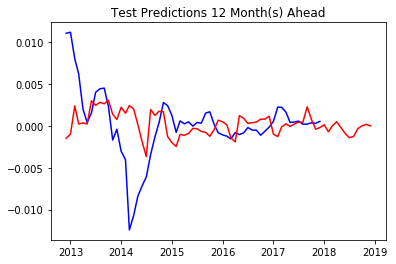

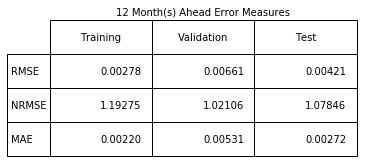

6
ADF Statistic: -2.977440
p-value: 0.037056
ADF Statistic: -4.331711
p-value: 0.000391
hello!!!!!
(201, 13)
(201, 1, 13)
(74, 13)
Epoch 1/100
201/201 [==============================] - 8s 38ms/step - loss: 1.2354
Epoch 2/100
201/201 [==============================] - 0s 25us/step - loss: 1.2030
Epoch 3/100
201/201 [==============================] - 0s 28us/step - loss: 1.2014
Epoch 4/100
201/201 [==============================] - 0s 41us/step - loss: 1.2120
Epoch 5/100
201/201 [==============================] - 0s 36us/step - loss: 1.2113
Epoch 6/100
201/201 [==============================] - 0s 40us/step - loss: 1.2083
Epoch 7/100
201/201 [==============================] - 0s 28us/step - loss: 1.1761
Epoch 8/100
201/201 [==============================] - 0s 28us/step - loss: 1.1885
Epoch 9/100
201/201 [==============================] - 0s 39us/step - loss: 1.1890
Epoch 10/100
201/201 [==============================] - 0s 27us/step - loss: 1.1872
Epoch 11/100
201/201 [================

Epoch 98/100
201/201 [==============================] - 0s 24us/step - loss: 1.1800
Epoch 99/100
201/201 [==============================] - 0s 25us/step - loss: 1.1665
Epoch 100/100
201/201 [==============================] - 0s 21us/step - loss: 1.1095
Epoch 1/100
201/201 [==============================] - 8s 38ms/step - loss: 1.0957
Epoch 2/100
201/201 [==============================] - 0s 28us/step - loss: 1.1059
Epoch 3/100
201/201 [==============================] - 0s 28us/step - loss: 1.1103
Epoch 4/100
201/201 [==============================] - 0s 40us/step - loss: 0.9817
Epoch 5/100
201/201 [==============================] - 0s 63us/step - loss: 1.0064
Epoch 6/100
201/201 [==============================] - 0s 32us/step - loss: 1.0883
Epoch 7/100
201/201 [==============================] - 0s 24us/step - loss: 1.0753
Epoch 8/100
201/201 [==============================] - 0s 32us/step - loss: 1.0409
Epoch 9/100
201/201 [==============================] - 0s 25us/step - loss: 0.9968


Epoch 96/100
201/201 [==============================] - 0s 25us/step - loss: 0.7055
Epoch 97/100
201/201 [==============================] - 0s 32us/step - loss: 0.8070
Epoch 98/100
201/201 [==============================] - 0s 31us/step - loss: 0.7457
Epoch 99/100
201/201 [==============================] - 0s 27us/step - loss: 0.6712
Epoch 100/100
201/201 [==============================] - 0s 25us/step - loss: 0.7034
Epoch 1/100
201/201 [==============================] - 8s 38ms/step - loss: 1.0996
Epoch 2/100
201/201 [==============================] - 0s 23us/step - loss: 0.9968
Epoch 3/100
201/201 [==============================] - 0s 29us/step - loss: 0.8808
Epoch 4/100
201/201 [==============================] - 0s 43us/step - loss: 0.8557
Epoch 5/100
201/201 [==============================] - 0s 53us/step - loss: 0.7718
Epoch 6/100
201/201 [==============================] - 0s 37us/step - loss: 0.7608
Epoch 7/100
201/201 [==============================] - 0s 45us/step - loss: 0.770

Epoch 94/100
201/201 [==============================] - 0s 21us/step - loss: 0.4713
Epoch 95/100
201/201 [==============================] - 0s 27us/step - loss: 0.4733
Epoch 96/100
201/201 [==============================] - 0s 23us/step - loss: 0.4075
Epoch 97/100
201/201 [==============================] - 0s 33us/step - loss: 0.3931
Epoch 98/100
201/201 [==============================] - 0s 28us/step - loss: 0.4765
Epoch 99/100
201/201 [==============================] - 0s 25us/step - loss: 0.4432
Epoch 100/100
201/201 [==============================] - 0s 21us/step - loss: 0.4485
Epoch 1/100
201/201 [==============================] - 8s 38ms/step - loss: 1.0352
Epoch 2/100
201/201 [==============================] - 0s 23us/step - loss: 1.1969
Epoch 3/100
201/201 [==============================] - 0s 25us/step - loss: 0.9140
Epoch 4/100
201/201 [==============================] - 0s 35us/step - loss: 0.7467
Epoch 5/100
201/201 [==============================] - 0s 26us/step - loss: 0.5

Epoch 92/100
201/201 [==============================] - 0s 30us/step - loss: 0.5983
Epoch 93/100
201/201 [==============================] - 0s 28us/step - loss: 0.4615
Epoch 94/100
201/201 [==============================] - 0s 32us/step - loss: 0.5415
Epoch 95/100
201/201 [==============================] - 0s 28us/step - loss: 0.5399
Epoch 96/100
201/201 [==============================] - 0s 26us/step - loss: 0.5271
Epoch 97/100
201/201 [==============================] - 0s 24us/step - loss: 0.5403
Epoch 98/100
201/201 [==============================] - 0s 29us/step - loss: 0.4595
Epoch 99/100
201/201 [==============================] - 0s 30us/step - loss: 0.5156
Epoch 100/100
201/201 [==============================] - 0s 30us/step - loss: 0.4777
Epoch 1/100
201/201 [==============================] - 8s 39ms/step - loss: 1.0428
Epoch 2/100
201/201 [==============================] - 0s 23us/step - loss: 1.0208
Epoch 3/100
201/201 [==============================] - 0s 27us/step - loss: 1

201/201 [==============================] - 0s 39us/step - loss: 0.9707
Epoch 90/100
201/201 [==============================] - 0s 39us/step - loss: 0.9750
Epoch 91/100
201/201 [==============================] - 0s 30us/step - loss: 0.9740
Epoch 92/100
201/201 [==============================] - 0s 30us/step - loss: 0.9573
Epoch 93/100
201/201 [==============================] - 0s 33us/step - loss: 0.9530
Epoch 94/100
201/201 [==============================] - 0s 32us/step - loss: 0.9545
Epoch 95/100
201/201 [==============================] - 0s 36us/step - loss: 0.9500
Epoch 96/100
201/201 [==============================] - 0s 25us/step - loss: 0.9665
Epoch 97/100
201/201 [==============================] - 0s 29us/step - loss: 0.9195
Epoch 98/100
201/201 [==============================] - 0s 30us/step - loss: 0.9596
Epoch 99/100
201/201 [==============================] - 0s 34us/step - loss: 0.9769
Epoch 100/100
201/201 [==============================] - 0s 33us/step - loss: 0.9802
Epoc

Epoch 87/100
201/201 [==============================] - 0s 30us/step - loss: 0.6544
Epoch 88/100
201/201 [==============================] - 0s 29us/step - loss: 0.6412
Epoch 89/100
201/201 [==============================] - 0s 26us/step - loss: 0.6198
Epoch 90/100
201/201 [==============================] - 0s 38us/step - loss: 0.6669
Epoch 91/100
201/201 [==============================] - 0s 30us/step - loss: 0.6455
Epoch 92/100
201/201 [==============================] - 0s 34us/step - loss: 0.6525
Epoch 93/100
201/201 [==============================] - 0s 26us/step - loss: 0.6198
Epoch 94/100
201/201 [==============================] - 0s 28us/step - loss: 0.6246
Epoch 95/100
201/201 [==============================] - 0s 33us/step - loss: 0.6329
Epoch 96/100
201/201 [==============================] - 0s 40us/step - loss: 0.5949
Epoch 97/100
201/201 [==============================] - 0s 28us/step - loss: 0.6620
Epoch 98/100
201/201 [==============================] - 0s 36us/step - loss:

Epoch 85/100
201/201 [==============================] - 0s 31us/step - loss: 0.3183
Epoch 86/100
201/201 [==============================] - 0s 45us/step - loss: 0.3296
Epoch 87/100
201/201 [==============================] - 0s 34us/step - loss: 0.3876
Epoch 88/100
201/201 [==============================] - 0s 26us/step - loss: 0.4280
Epoch 89/100
201/201 [==============================] - 0s 32us/step - loss: 0.3521
Epoch 90/100
201/201 [==============================] - 0s 24us/step - loss: 0.3335
Epoch 91/100
201/201 [==============================] - 0s 39us/step - loss: 0.4377
Epoch 92/100
201/201 [==============================] - 0s 26us/step - loss: 0.3947
Epoch 93/100
201/201 [==============================] - 0s 27us/step - loss: 0.3567
Epoch 94/100
201/201 [==============================] - 0s 43us/step - loss: 0.3328
Epoch 95/100
201/201 [==============================] - 0s 36us/step - loss: 0.3648
Epoch 96/100
201/201 [==============================] - 0s 24us/step - loss:

Epoch 83/100
201/201 [==============================] - 0s 24us/step - loss: 0.3429
Epoch 84/100
201/201 [==============================] - 0s 29us/step - loss: 0.3451
Epoch 85/100
201/201 [==============================] - 0s 31us/step - loss: 0.4254
Epoch 86/100
201/201 [==============================] - 0s 22us/step - loss: 0.4162
Epoch 87/100
201/201 [==============================] - 0s 27us/step - loss: 0.3684
Epoch 88/100
201/201 [==============================] - 0s 21us/step - loss: 0.4008
Epoch 89/100
201/201 [==============================] - 0s 25us/step - loss: 0.4615
Epoch 90/100
201/201 [==============================] - 0s 29us/step - loss: 0.4828
Epoch 91/100
201/201 [==============================] - 0s 31us/step - loss: 0.4027
Epoch 92/100
201/201 [==============================] - 0s 33us/step - loss: 0.3804
Epoch 93/100
201/201 [==============================] - 0s 27us/step - loss: 0.3563
Epoch 94/100
201/201 [==============================] - 0s 21us/step - loss:

Epoch 81/100
201/201 [==============================] - 0s 21us/step - loss: 0.9962
Epoch 82/100
201/201 [==============================] - 0s 21us/step - loss: 1.0094
Epoch 83/100
201/201 [==============================] - 0s 24us/step - loss: 0.9420
Epoch 84/100
201/201 [==============================] - 0s 27us/step - loss: 1.0164
Epoch 85/100
201/201 [==============================] - 0s 23us/step - loss: 1.0100
Epoch 86/100
201/201 [==============================] - 0s 22us/step - loss: 1.0598
Epoch 87/100
201/201 [==============================] - 0s 23us/step - loss: 0.9917
Epoch 88/100
201/201 [==============================] - 0s 22us/step - loss: 0.9702
Epoch 89/100
201/201 [==============================] - 0s 29us/step - loss: 1.0231
Epoch 90/100
201/201 [==============================] - 0s 28us/step - loss: 1.0495
Epoch 91/100
201/201 [==============================] - 0s 21us/step - loss: 0.9864
Epoch 92/100
201/201 [==============================] - 0s 25us/step - loss:

Epoch 79/100
201/201 [==============================] - 0s 43us/step - loss: 0.7257
Epoch 80/100
201/201 [==============================] - 0s 33us/step - loss: 0.7458
Epoch 81/100
201/201 [==============================] - 0s 28us/step - loss: 0.6702
Epoch 82/100
201/201 [==============================] - 0s 30us/step - loss: 0.6783
Epoch 83/100
201/201 [==============================] - 0s 40us/step - loss: 0.6815
Epoch 84/100
201/201 [==============================] - 0s 38us/step - loss: 0.6602
Epoch 85/100
201/201 [==============================] - 0s 25us/step - loss: 0.7223
Epoch 86/100
201/201 [==============================] - 0s 37us/step - loss: 0.6466
Epoch 87/100
201/201 [==============================] - 0s 32us/step - loss: 0.6579
Epoch 88/100
201/201 [==============================] - 0s 40us/step - loss: 0.7000
Epoch 89/100
201/201 [==============================] - 0s 44us/step - loss: 0.7248
Epoch 90/100
201/201 [==============================] - 0s 27us/step - loss:

Epoch 77/100
201/201 [==============================] - 0s 28us/step - loss: 0.2702
Epoch 78/100
201/201 [==============================] - 0s 23us/step - loss: 0.2899
Epoch 79/100
201/201 [==============================] - 0s 31us/step - loss: 0.2713
Epoch 80/100
201/201 [==============================] - 0s 33us/step - loss: 0.2862
Epoch 81/100
201/201 [==============================] - 0s 26us/step - loss: 0.2941
Epoch 82/100
201/201 [==============================] - 0s 26us/step - loss: 0.2558
Epoch 83/100
201/201 [==============================] - 0s 28us/step - loss: 0.2509
Epoch 84/100
201/201 [==============================] - 0s 32us/step - loss: 0.2752
Epoch 85/100
201/201 [==============================] - 0s 26us/step - loss: 0.2892
Epoch 86/100
201/201 [==============================] - 0s 33us/step - loss: 0.3105
Epoch 87/100
201/201 [==============================] - 0s 36us/step - loss: 0.3062
Epoch 88/100
201/201 [==============================] - 0s 28us/step - loss:

Epoch 75/100
201/201 [==============================] - 0s 27us/step - loss: 0.2728
Epoch 76/100
201/201 [==============================] - 0s 33us/step - loss: 0.2957
Epoch 77/100
201/201 [==============================] - 0s 32us/step - loss: 0.3236
Epoch 78/100
201/201 [==============================] - 0s 30us/step - loss: 0.3158
Epoch 79/100
201/201 [==============================] - 0s 34us/step - loss: 0.3558
Epoch 80/100
201/201 [==============================] - 0s 32us/step - loss: 0.4150
Epoch 81/100
201/201 [==============================] - 0s 34us/step - loss: 0.3066
Epoch 82/100
201/201 [==============================] - 0s 34us/step - loss: 0.3017
Epoch 83/100
201/201 [==============================] - 0s 31us/step - loss: 0.4870
Epoch 84/100
201/201 [==============================] - 0s 34us/step - loss: 0.3063
Epoch 85/100
201/201 [==============================] - 0s 29us/step - loss: 0.3141
Epoch 86/100
201/201 [==============================] - 0s 33us/step - loss:

Epoch 73/100
201/201 [==============================] - 0s 29us/step - loss: 1.0750
Epoch 74/100
201/201 [==============================] - 0s 34us/step - loss: 1.0701
Epoch 75/100
201/201 [==============================] - 0s 23us/step - loss: 1.0762
Epoch 76/100
201/201 [==============================] - 0s 28us/step - loss: 1.0759
Epoch 77/100
201/201 [==============================] - 0s 29us/step - loss: 1.0940
Epoch 78/100
201/201 [==============================] - 0s 29us/step - loss: 1.0740
Epoch 79/100
201/201 [==============================] - 0s 25us/step - loss: 1.0748
Epoch 80/100
201/201 [==============================] - 0s 32us/step - loss: 1.0894
Epoch 81/100
201/201 [==============================] - 0s 43us/step - loss: 1.0738
Epoch 82/100
201/201 [==============================] - 0s 31us/step - loss: 1.0749
Epoch 83/100
201/201 [==============================] - 0s 29us/step - loss: 1.0916
Epoch 84/100
201/201 [==============================] - 0s 25us/step - loss:

Epoch 71/100
201/201 [==============================] - 0s 27us/step - loss: 0.4964
Epoch 72/100
201/201 [==============================] - 0s 32us/step - loss: 0.5070
Epoch 73/100
201/201 [==============================] - 0s 38us/step - loss: 0.5234
Epoch 74/100
201/201 [==============================] - 0s 32us/step - loss: 0.5106
Epoch 75/100
201/201 [==============================] - 0s 29us/step - loss: 0.4747
Epoch 76/100
201/201 [==============================] - 0s 33us/step - loss: 0.4979
Epoch 77/100
201/201 [==============================] - 0s 29us/step - loss: 0.4812
Epoch 78/100
201/201 [==============================] - 0s 35us/step - loss: 0.4936
Epoch 79/100
201/201 [==============================] - 0s 46us/step - loss: 0.4558
Epoch 80/100
201/201 [==============================] - 0s 30us/step - loss: 0.4926
Epoch 81/100
201/201 [==============================] - 0s 38us/step - loss: 0.4871
Epoch 82/100
201/201 [==============================] - 0s 29us/step - loss:

201/201 [==============================] - 0s 32us/step - loss: 0.2511
Epoch 69/100
201/201 [==============================] - 0s 30us/step - loss: 0.2417
Epoch 70/100
201/201 [==============================] - 0s 32us/step - loss: 0.2660
Epoch 71/100
201/201 [==============================] - 0s 28us/step - loss: 0.2508
Epoch 72/100
201/201 [==============================] - 0s 34us/step - loss: 0.2297
Epoch 73/100
201/201 [==============================] - 0s 35us/step - loss: 0.2238
Epoch 74/100
201/201 [==============================] - 0s 33us/step - loss: 0.2334
Epoch 75/100
201/201 [==============================] - 0s 29us/step - loss: 0.2289
Epoch 76/100
201/201 [==============================] - 0s 30us/step - loss: 0.2427
Epoch 77/100
201/201 [==============================] - 0s 38us/step - loss: 0.2384
Epoch 78/100
201/201 [==============================] - 0s 41us/step - loss: 0.2456
Epoch 79/100
201/201 [==============================] - 0s 27us/step - loss: 0.2341
Epoch

Epoch 66/100
201/201 [==============================] - 0s 23us/step - loss: 0.2614
Epoch 67/100
201/201 [==============================] - 0s 35us/step - loss: 0.3026
Epoch 68/100
201/201 [==============================] - 0s 40us/step - loss: 0.4563
Epoch 69/100
201/201 [==============================] - 0s 34us/step - loss: 0.5475
Epoch 70/100
201/201 [==============================] - 0s 30us/step - loss: 0.3259
Epoch 71/100
201/201 [==============================] - 0s 34us/step - loss: 0.3734
Epoch 72/100
201/201 [==============================] - 0s 38us/step - loss: 0.4260
Epoch 73/100
201/201 [==============================] - 0s 31us/step - loss: 0.5899
Epoch 74/100
201/201 [==============================] - 0s 31us/step - loss: 0.5624
Epoch 75/100
201/201 [==============================] - 0s 39us/step - loss: 0.5143
Epoch 76/100
201/201 [==============================] - 0s 39us/step - loss: 0.3658
Epoch 77/100
201/201 [==============================] - 0s 32us/step - loss:

Epoch 64/100
201/201 [==============================] - 0s 34us/step - loss: 0.8666
Epoch 65/100
201/201 [==============================] - 0s 35us/step - loss: 0.8597
Epoch 66/100
201/201 [==============================] - 0s 37us/step - loss: 0.8680
Epoch 67/100
201/201 [==============================] - 0s 37us/step - loss: 0.8546
Epoch 68/100
201/201 [==============================] - 0s 40us/step - loss: 0.8723
Epoch 69/100
201/201 [==============================] - 0s 35us/step - loss: 0.8817
Epoch 70/100
201/201 [==============================] - 0s 34us/step - loss: 0.8485
Epoch 71/100
201/201 [==============================] - 0s 34us/step - loss: 0.8626
Epoch 72/100
201/201 [==============================] - 0s 31us/step - loss: 0.8586
Epoch 73/100
201/201 [==============================] - 0s 48us/step - loss: 0.8679
Epoch 74/100
201/201 [==============================] - 0s 35us/step - loss: 0.8703
Epoch 75/100
201/201 [==============================] - 0s 36us/step - loss:

Epoch 62/100
201/201 [==============================] - 0s 35us/step - loss: 0.4047
Epoch 63/100
201/201 [==============================] - 0s 55us/step - loss: 0.4370
Epoch 64/100
201/201 [==============================] - 0s 38us/step - loss: 0.4003
Epoch 65/100
201/201 [==============================] - 0s 33us/step - loss: 0.4074
Epoch 66/100
201/201 [==============================] - 0s 39us/step - loss: 0.3997
Epoch 67/100
201/201 [==============================] - 0s 43us/step - loss: 0.4013
Epoch 68/100
201/201 [==============================] - 0s 39us/step - loss: 0.4093
Epoch 69/100
201/201 [==============================] - 0s 37us/step - loss: 0.3890
Epoch 70/100
201/201 [==============================] - 0s 42us/step - loss: 0.3841
Epoch 71/100
201/201 [==============================] - 0s 46us/step - loss: 0.4023
Epoch 72/100
201/201 [==============================] - 0s 29us/step - loss: 0.3859
Epoch 73/100
201/201 [==============================] - 0s 31us/step - loss:

Epoch 60/100
201/201 [==============================] - 0s 50us/step - loss: 0.2477
Epoch 61/100
201/201 [==============================] - 0s 34us/step - loss: 0.2778
Epoch 62/100
201/201 [==============================] - 0s 38us/step - loss: 0.2875
Epoch 63/100
201/201 [==============================] - 0s 57us/step - loss: 0.2550
Epoch 64/100
201/201 [==============================] - 0s 45us/step - loss: 0.2695
Epoch 65/100
201/201 [==============================] - 0s 39us/step - loss: 0.2376
Epoch 66/100
201/201 [==============================] - 0s 40us/step - loss: 0.2612
Epoch 67/100
201/201 [==============================] - 0s 39us/step - loss: 0.2451
Epoch 68/100
201/201 [==============================] - 0s 46us/step - loss: 0.2444
Epoch 69/100
201/201 [==============================] - 0s 37us/step - loss: 0.2344
Epoch 70/100
201/201 [==============================] - 0s 47us/step - loss: 0.2240
Epoch 71/100
201/201 [==============================] - 0s 40us/step - loss:

Epoch 58/100
201/201 [==============================] - 0s 39us/step - loss: 0.7348
Epoch 59/100
201/201 [==============================] - 0s 32us/step - loss: 1.4927
Epoch 60/100
201/201 [==============================] - 0s 44us/step - loss: 0.7816
Epoch 61/100
201/201 [==============================] - 0s 40us/step - loss: 0.4072
Epoch 62/100
201/201 [==============================] - 0s 38us/step - loss: 0.3300
Epoch 63/100
201/201 [==============================] - 0s 40us/step - loss: 0.3515
Epoch 64/100
201/201 [==============================] - 0s 34us/step - loss: 0.3567
Epoch 65/100
201/201 [==============================] - 0s 34us/step - loss: 0.4787
Epoch 66/100
201/201 [==============================] - 0s 48us/step - loss: 0.3936
Epoch 67/100
201/201 [==============================] - 0s 48us/step - loss: 0.4104
Epoch 68/100
201/201 [==============================] - 0s 47us/step - loss: 0.6057
Epoch 69/100
201/201 [==============================] - 0s 41us/step - loss:

201/201 [==============================] - 1s 5ms/step - loss: 0.2862
Epoch 57/100
201/201 [==============================] - 1s 4ms/step - loss: 0.2541
Epoch 58/100
201/201 [==============================] - 1s 5ms/step - loss: 0.2913
Epoch 59/100
201/201 [==============================] - 1s 4ms/step - loss: 0.2642
Epoch 60/100
201/201 [==============================] - 1s 4ms/step - loss: 0.2566
Epoch 61/100
201/201 [==============================] - 1s 5ms/step - loss: 0.2769
Epoch 62/100
201/201 [==============================] - 1s 4ms/step - loss: 0.2885
Epoch 63/100
201/201 [==============================] - 1s 5ms/step - loss: 0.2891
Epoch 64/100
201/201 [==============================] - 1s 5ms/step - loss: 0.2803
Epoch 65/100
201/201 [==============================] - 1s 5ms/step - loss: 0.2513
Epoch 66/100
201/201 [==============================] - 1s 5ms/step - loss: 0.2775
Epoch 67/100
201/201 [==============================] - 1s 5ms/step - loss: 0.2907
Epoch 68/100
201/

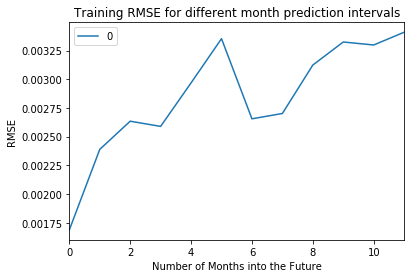

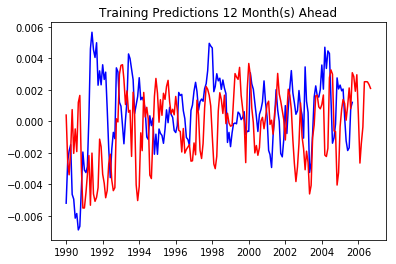

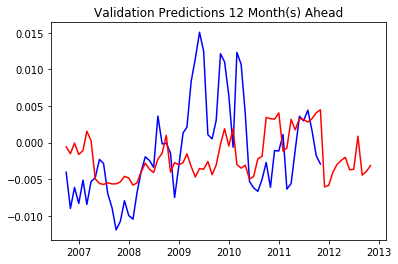

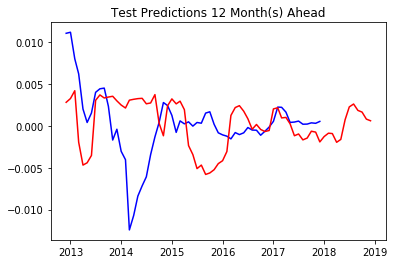

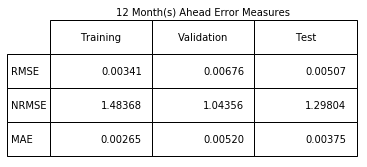

7
ADF Statistic: -2.977440
p-value: 0.037056
ADF Statistic: -4.390272
p-value: 0.000309
hello!!!!!
(199, 15)
(199, 1, 15)
(74, 15)
Epoch 1/100
199/199 [==============================] - 9s 46ms/step - loss: 1.0908
Epoch 2/100
199/199 [==============================] - 0s 25us/step - loss: 1.0944
Epoch 3/100
199/199 [==============================] - 0s 30us/step - loss: 1.1148
Epoch 4/100
199/199 [==============================] - 0s 27us/step - loss: 1.0760
Epoch 5/100
199/199 [==============================] - 0s 38us/step - loss: 1.0782
Epoch 6/100
199/199 [==============================] - 0s 41us/step - loss: 1.1101
Epoch 7/100
199/199 [==============================] - 0s 35us/step - loss: 1.1054
Epoch 8/100
199/199 [==============================] - 0s 31us/step - loss: 1.0967
Epoch 9/100
199/199 [==============================] - 0s 37us/step - loss: 1.1068
Epoch 10/100
199/199 [==============================] - 0s 35us/step - loss: 1.0305
Epoch 11/100
199/199 [================

199/199 [==============================] - 0s 41us/step - loss: 1.0283
Epoch 98/100
199/199 [==============================] - 0s 29us/step - loss: 1.0256
Epoch 99/100
199/199 [==============================] - 0s 26us/step - loss: 1.0481
Epoch 100/100
199/199 [==============================] - 0s 25us/step - loss: 1.0324
Epoch 1/100
199/199 [==============================] - 9s 48ms/step - loss: 1.2177
Epoch 2/100
199/199 [==============================] - 0s 26us/step - loss: 1.1981
Epoch 3/100
199/199 [==============================] - 0s 29us/step - loss: 1.1243
Epoch 4/100
199/199 [==============================] - 0s 37us/step - loss: 1.2490
Epoch 5/100
199/199 [==============================] - 0s 32us/step - loss: 1.2108
Epoch 6/100
199/199 [==============================] - 0s 52us/step - loss: 1.0952
Epoch 7/100
199/199 [==============================] - 0s 39us/step - loss: 1.2156
Epoch 8/100
199/199 [==============================] - 0s 28us/step - loss: 1.1639
Epoch 9/100


Epoch 95/100
199/199 [==============================] - 0s 43us/step - loss: 0.9250
Epoch 96/100
199/199 [==============================] - 0s 27us/step - loss: 0.8747
Epoch 97/100
199/199 [==============================] - 0s 27us/step - loss: 0.8792
Epoch 98/100
199/199 [==============================] - 0s 21us/step - loss: 0.9797
Epoch 99/100
199/199 [==============================] - 0s 27us/step - loss: 0.9097
Epoch 100/100
199/199 [==============================] - 0s 22us/step - loss: 0.9463
Epoch 1/100
199/199 [==============================] - 10s 48ms/step - loss: 0.9565
Epoch 2/100
199/199 [==============================] - 0s 31us/step - loss: 0.8459
Epoch 3/100
199/199 [==============================] - 0s 26us/step - loss: 0.8834
Epoch 4/100
199/199 [==============================] - 0s 39us/step - loss: 0.8083
Epoch 5/100
199/199 [==============================] - 0s 39us/step - loss: 0.8488
Epoch 6/100
199/199 [==============================] - 0s 73us/step - loss: 0.7

Epoch 93/100
199/199 [==============================] - 0s 36us/step - loss: 0.4819
Epoch 94/100
199/199 [==============================] - 0s 23us/step - loss: 0.3724
Epoch 95/100
199/199 [==============================] - 0s 27us/step - loss: 0.4341
Epoch 96/100
199/199 [==============================] - 0s 27us/step - loss: 0.3897
Epoch 97/100
199/199 [==============================] - 0s 29us/step - loss: 0.4301
Epoch 98/100
199/199 [==============================] - 0s 32us/step - loss: 0.3656
Epoch 99/100
199/199 [==============================] - 0s 28us/step - loss: 0.4904
Epoch 100/100
199/199 [==============================] - 0s 29us/step - loss: 0.4985
Epoch 1/100
199/199 [==============================] - 10s 48ms/step - loss: 1.2712
Epoch 2/100
199/199 [==============================] - 0s 26us/step - loss: 0.9548
Epoch 3/100
199/199 [==============================] - 0s 25us/step - loss: 0.8124
Epoch 4/100
199/199 [==============================] - 0s 34us/step - loss: 0

Epoch 91/100
199/199 [==============================] - 0s 29us/step - loss: 0.4499
Epoch 92/100
199/199 [==============================] - 0s 37us/step - loss: 0.4947
Epoch 93/100
199/199 [==============================] - 0s 32us/step - loss: 0.4624
Epoch 94/100
199/199 [==============================] - 0s 29us/step - loss: 0.4762
Epoch 95/100
199/199 [==============================] - 0s 33us/step - loss: 0.4877
Epoch 96/100
199/199 [==============================] - 0s 24us/step - loss: 0.5391
Epoch 97/100
199/199 [==============================] - 0s 29us/step - loss: 0.5309
Epoch 98/100
199/199 [==============================] - 0s 40us/step - loss: 0.5136
Epoch 99/100
199/199 [==============================] - 0s 30us/step - loss: 0.5527
Epoch 100/100
199/199 [==============================] - 0s 27us/step - loss: 0.6180
Epoch 1/100
199/199 [==============================] - 9s 47ms/step - loss: 1.0958
Epoch 2/100
199/199 [==============================] - 0s 25us/step - loss: 

Epoch 89/100
199/199 [==============================] - 0s 26us/step - loss: 0.9600
Epoch 90/100
199/199 [==============================] - 0s 39us/step - loss: 1.0767
Epoch 91/100
199/199 [==============================] - 0s 29us/step - loss: 1.0035
Epoch 92/100
199/199 [==============================] - 0s 27us/step - loss: 0.9630
Epoch 93/100
199/199 [==============================] - 0s 24us/step - loss: 0.9570
Epoch 94/100
199/199 [==============================] - 0s 24us/step - loss: 1.0886
Epoch 95/100
199/199 [==============================] - 0s 24us/step - loss: 0.9309
Epoch 96/100
199/199 [==============================] - 0s 41us/step - loss: 1.0119
Epoch 97/100
199/199 [==============================] - 0s 24us/step - loss: 1.0449
Epoch 98/100
199/199 [==============================] - 0s 26us/step - loss: 0.9347
Epoch 99/100
199/199 [==============================] - 0s 32us/step - loss: 0.9869
Epoch 100/100
199/199 [==============================] - 0s 28us/step - loss

Epoch 87/100
199/199 [==============================] - 0s 27us/step - loss: 0.8345
Epoch 88/100
199/199 [==============================] - 0s 25us/step - loss: 0.8869
Epoch 89/100
199/199 [==============================] - 0s 23us/step - loss: 0.8094
Epoch 90/100
199/199 [==============================] - 0s 23us/step - loss: 0.8059
Epoch 91/100
199/199 [==============================] - 0s 33us/step - loss: 0.7902
Epoch 92/100
199/199 [==============================] - 0s 25us/step - loss: 0.8233
Epoch 93/100
199/199 [==============================] - 0s 28us/step - loss: 0.8634
Epoch 94/100
199/199 [==============================] - 0s 23us/step - loss: 0.7929
Epoch 95/100
199/199 [==============================] - 0s 25us/step - loss: 0.8627
Epoch 96/100
199/199 [==============================] - 0s 24us/step - loss: 0.8226
Epoch 97/100
199/199 [==============================] - 0s 22us/step - loss: 0.7685
Epoch 98/100
199/199 [==============================] - 0s 23us/step - loss:

Epoch 85/100
199/199 [==============================] - 0s 25us/step - loss: 0.4152
Epoch 86/100
199/199 [==============================] - 0s 30us/step - loss: 0.3244
Epoch 87/100
199/199 [==============================] - 0s 25us/step - loss: 0.2816
Epoch 88/100
199/199 [==============================] - 0s 29us/step - loss: 0.3490
Epoch 89/100
199/199 [==============================] - 0s 30us/step - loss: 0.3557
Epoch 90/100
199/199 [==============================] - 0s 23us/step - loss: 0.3435
Epoch 91/100
199/199 [==============================] - 0s 30us/step - loss: 0.3467
Epoch 92/100
199/199 [==============================] - 0s 27us/step - loss: 0.2887
Epoch 93/100
199/199 [==============================] - 0s 30us/step - loss: 0.3041
Epoch 94/100
199/199 [==============================] - 0s 28us/step - loss: 0.3683
Epoch 95/100
199/199 [==============================] - 0s 32us/step - loss: 0.3382
Epoch 96/100
199/199 [==============================] - 0s 34us/step - loss:

199/199 [==============================] - 0s 27us/step - loss: 0.3546
Epoch 83/100
199/199 [==============================] - 0s 27us/step - loss: 0.4596
Epoch 84/100
199/199 [==============================] - 0s 25us/step - loss: 0.4990
Epoch 85/100
199/199 [==============================] - 0s 40us/step - loss: 0.4926
Epoch 86/100
199/199 [==============================] - 0s 35us/step - loss: 0.3992
Epoch 87/100
199/199 [==============================] - 0s 30us/step - loss: 0.3821
Epoch 88/100
199/199 [==============================] - 0s 29us/step - loss: 0.3299
Epoch 89/100
199/199 [==============================] - 0s 25us/step - loss: 0.3418
Epoch 90/100
199/199 [==============================] - 0s 29us/step - loss: 0.3545
Epoch 91/100
199/199 [==============================] - 0s 28us/step - loss: 0.3912
Epoch 92/100
199/199 [==============================] - 0s 41us/step - loss: 0.3510
Epoch 93/100
199/199 [==============================] - 0s 26us/step - loss: 0.3167
Epoch

Epoch 80/100
199/199 [==============================] - 0s 44us/step - loss: 1.0331
Epoch 81/100
199/199 [==============================] - 0s 35us/step - loss: 0.8972
Epoch 82/100
199/199 [==============================] - 0s 35us/step - loss: 0.9465
Epoch 83/100
199/199 [==============================] - 0s 35us/step - loss: 0.9548
Epoch 84/100
199/199 [==============================] - 0s 32us/step - loss: 0.9890
Epoch 85/100
199/199 [==============================] - 0s 36us/step - loss: 0.9789
Epoch 86/100
199/199 [==============================] - 0s 47us/step - loss: 0.9566
Epoch 87/100
199/199 [==============================] - 0s 42us/step - loss: 0.9250
Epoch 88/100
199/199 [==============================] - 0s 47us/step - loss: 0.9791
Epoch 89/100
199/199 [==============================] - 0s 39us/step - loss: 0.9565
Epoch 90/100
199/199 [==============================] - 0s 34us/step - loss: 0.9414
Epoch 91/100
199/199 [==============================] - 0s 31us/step - loss:

Epoch 78/100
199/199 [==============================] - 0s 32us/step - loss: 0.6488
Epoch 79/100
199/199 [==============================] - 0s 37us/step - loss: 0.5763
Epoch 80/100
199/199 [==============================] - 0s 31us/step - loss: 0.6198
Epoch 81/100
199/199 [==============================] - 0s 28us/step - loss: 0.6040
Epoch 82/100
199/199 [==============================] - 0s 33us/step - loss: 0.6151
Epoch 83/100
199/199 [==============================] - 0s 36us/step - loss: 0.6064
Epoch 84/100
199/199 [==============================] - 0s 29us/step - loss: 0.5680
Epoch 85/100
199/199 [==============================] - 0s 31us/step - loss: 0.5815
Epoch 86/100
199/199 [==============================] - 0s 34us/step - loss: 0.5910
Epoch 87/100
199/199 [==============================] - 0s 49us/step - loss: 0.5844
Epoch 88/100
199/199 [==============================] - 0s 37us/step - loss: 0.6311
Epoch 89/100
199/199 [==============================] - 0s 42us/step - loss:

Epoch 76/100
199/199 [==============================] - 0s 33us/step - loss: 0.2382
Epoch 77/100
199/199 [==============================] - 0s 23us/step - loss: 0.2875
Epoch 78/100
199/199 [==============================] - 0s 28us/step - loss: 0.3086
Epoch 79/100
199/199 [==============================] - 0s 35us/step - loss: 0.2513
Epoch 80/100
199/199 [==============================] - 0s 31us/step - loss: 0.2876
Epoch 81/100
199/199 [==============================] - 0s 30us/step - loss: 0.2992
Epoch 82/100
199/199 [==============================] - 0s 31us/step - loss: 0.2613
Epoch 83/100
199/199 [==============================] - 0s 27us/step - loss: 0.2822
Epoch 84/100
199/199 [==============================] - 0s 36us/step - loss: 0.2643
Epoch 85/100
199/199 [==============================] - 0s 33us/step - loss: 0.2227
Epoch 86/100
199/199 [==============================] - 0s 37us/step - loss: 0.2765
Epoch 87/100
199/199 [==============================] - 0s 28us/step - loss:

Epoch 74/100
199/199 [==============================] - 0s 35us/step - loss: 0.2903
Epoch 75/100
199/199 [==============================] - 0s 27us/step - loss: 0.2130
Epoch 76/100
199/199 [==============================] - 0s 33us/step - loss: 0.2728
Epoch 77/100
199/199 [==============================] - 0s 25us/step - loss: 0.2796
Epoch 78/100
199/199 [==============================] - 0s 35us/step - loss: 0.3358
Epoch 79/100
199/199 [==============================] - 0s 25us/step - loss: 0.3906
Epoch 80/100
199/199 [==============================] - 0s 26us/step - loss: 0.3311
Epoch 81/100
199/199 [==============================] - 0s 29us/step - loss: 0.3119
Epoch 82/100
199/199 [==============================] - 0s 31us/step - loss: 0.2241
Epoch 83/100
199/199 [==============================] - 0s 45us/step - loss: 0.3316
Epoch 84/100
199/199 [==============================] - 0s 26us/step - loss: 0.3599
Epoch 85/100
199/199 [==============================] - 0s 26us/step - loss:

Epoch 72/100
199/199 [==============================] - 0s 33us/step - loss: 0.9668
Epoch 73/100
199/199 [==============================] - 0s 30us/step - loss: 1.0483
Epoch 74/100
199/199 [==============================] - 0s 31us/step - loss: 0.9944
Epoch 75/100
199/199 [==============================] - 0s 30us/step - loss: 0.9723
Epoch 76/100
199/199 [==============================] - 0s 32us/step - loss: 1.0050
Epoch 77/100
199/199 [==============================] - 0s 39us/step - loss: 1.0059
Epoch 78/100
199/199 [==============================] - 0s 32us/step - loss: 0.9791
Epoch 79/100
199/199 [==============================] - 0s 40us/step - loss: 0.9650
Epoch 80/100
199/199 [==============================] - 0s 47us/step - loss: 0.9738
Epoch 81/100
199/199 [==============================] - 0s 32us/step - loss: 0.9908
Epoch 82/100
199/199 [==============================] - 0s 35us/step - loss: 0.9968
Epoch 83/100
199/199 [==============================] - 0s 43us/step - loss:

Epoch 70/100
199/199 [==============================] - 0s 29us/step - loss: 0.4525
Epoch 71/100
199/199 [==============================] - 0s 31us/step - loss: 0.4385
Epoch 72/100
199/199 [==============================] - 0s 56us/step - loss: 0.4703
Epoch 73/100
199/199 [==============================] - 0s 30us/step - loss: 0.4848
Epoch 74/100
199/199 [==============================] - 0s 37us/step - loss: 0.4477
Epoch 75/100
199/199 [==============================] - 0s 37us/step - loss: 0.4793
Epoch 76/100
199/199 [==============================] - 0s 41us/step - loss: 0.4382
Epoch 77/100
199/199 [==============================] - 0s 41us/step - loss: 0.4484
Epoch 78/100
199/199 [==============================] - 0s 45us/step - loss: 0.4942
Epoch 79/100
199/199 [==============================] - 0s 30us/step - loss: 0.4288
Epoch 80/100
199/199 [==============================] - 0s 43us/step - loss: 0.4363
Epoch 81/100
199/199 [==============================] - 0s 47us/step - loss:

Epoch 68/100
199/199 [==============================] - 0s 52us/step - loss: 0.2148
Epoch 69/100
199/199 [==============================] - 0s 36us/step - loss: 0.2538
Epoch 70/100
199/199 [==============================] - 0s 33us/step - loss: 0.2227
Epoch 71/100
199/199 [==============================] - 0s 41us/step - loss: 0.2667
Epoch 72/100
199/199 [==============================] - 0s 47us/step - loss: 0.2662
Epoch 73/100
199/199 [==============================] - 0s 34us/step - loss: 0.2568
Epoch 74/100
199/199 [==============================] - 0s 37us/step - loss: 0.2316
Epoch 75/100
199/199 [==============================] - 0s 38us/step - loss: 0.2327
Epoch 76/100
199/199 [==============================] - 0s 55us/step - loss: 0.2481
Epoch 77/100
199/199 [==============================] - 0s 44us/step - loss: 0.2911
Epoch 78/100
199/199 [==============================] - 0s 31us/step - loss: 0.2296
Epoch 79/100
199/199 [==============================] - 0s 40us/step - loss:

Epoch 66/100
199/199 [==============================] - 0s 35us/step - loss: 0.2240
Epoch 67/100
199/199 [==============================] - 0s 33us/step - loss: 0.2920
Epoch 68/100
199/199 [==============================] - 0s 38us/step - loss: 0.2468
Epoch 69/100
199/199 [==============================] - 0s 38us/step - loss: 0.2966
Epoch 70/100
199/199 [==============================] - 0s 30us/step - loss: 0.2920
Epoch 71/100
199/199 [==============================] - 0s 37us/step - loss: 0.4291
Epoch 72/100
199/199 [==============================] - 0s 38us/step - loss: 0.2639
Epoch 73/100
199/199 [==============================] - 0s 35us/step - loss: 0.2123
Epoch 74/100
199/199 [==============================] - 0s 35us/step - loss: 0.1950
Epoch 75/100
199/199 [==============================] - 0s 43us/step - loss: 0.2395
Epoch 76/100
199/199 [==============================] - 0s 45us/step - loss: 0.2362
Epoch 77/100
199/199 [==============================] - 0s 41us/step - loss:

199/199 [==============================] - 0s 35us/step - loss: 0.9492
Epoch 64/100
199/199 [==============================] - 0s 33us/step - loss: 0.9515
Epoch 65/100
199/199 [==============================] - 0s 55us/step - loss: 0.9558
Epoch 66/100
199/199 [==============================] - 0s 40us/step - loss: 0.9294
Epoch 67/100
199/199 [==============================] - 0s 37us/step - loss: 0.9003
Epoch 68/100
199/199 [==============================] - 0s 38us/step - loss: 0.9341
Epoch 69/100
199/199 [==============================] - 0s 37us/step - loss: 0.9340
Epoch 70/100
199/199 [==============================] - 0s 44us/step - loss: 0.9574
Epoch 71/100
199/199 [==============================] - 0s 38us/step - loss: 0.9484
Epoch 72/100
199/199 [==============================] - 0s 33us/step - loss: 0.9243
Epoch 73/100
199/199 [==============================] - 0s 48us/step - loss: 0.8996
Epoch 74/100
199/199 [==============================] - 0s 42us/step - loss: 0.9042
Epoch

Epoch 61/100
199/199 [==============================] - 0s 41us/step - loss: 0.4518
Epoch 62/100
199/199 [==============================] - 0s 44us/step - loss: 0.4510
Epoch 63/100
199/199 [==============================] - 0s 45us/step - loss: 0.4692
Epoch 64/100
199/199 [==============================] - 0s 47us/step - loss: 0.4252
Epoch 65/100
199/199 [==============================] - 0s 37us/step - loss: 0.4803
Epoch 66/100
199/199 [==============================] - 0s 38us/step - loss: 0.4506
Epoch 67/100
199/199 [==============================] - 0s 52us/step - loss: 0.4494
Epoch 68/100
199/199 [==============================] - 0s 58us/step - loss: 0.4522
Epoch 69/100
199/199 [==============================] - 0s 55us/step - loss: 0.4588
Epoch 70/100
199/199 [==============================] - 0s 50us/step - loss: 0.4351
Epoch 71/100
199/199 [==============================] - 0s 36us/step - loss: 0.4343
Epoch 72/100
199/199 [==============================] - 0s 42us/step - loss:

Epoch 59/100
199/199 [==============================] - 0s 36us/step - loss: 0.2351
Epoch 60/100
199/199 [==============================] - 0s 36us/step - loss: 0.2300
Epoch 61/100
199/199 [==============================] - 0s 35us/step - loss: 0.2414
Epoch 62/100
199/199 [==============================] - 0s 47us/step - loss: 0.2151
Epoch 63/100
199/199 [==============================] - 0s 35us/step - loss: 0.2077
Epoch 64/100
199/199 [==============================] - 0s 35us/step - loss: 0.2281
Epoch 65/100
199/199 [==============================] - 0s 39us/step - loss: 0.2666
Epoch 66/100
199/199 [==============================] - 0s 33us/step - loss: 0.1855
Epoch 67/100
199/199 [==============================] - 0s 33us/step - loss: 0.1912
Epoch 68/100
199/199 [==============================] - 0s 36us/step - loss: 0.2365
Epoch 69/100
199/199 [==============================] - 0s 52us/step - loss: 0.2188
Epoch 70/100
199/199 [==============================] - 0s 34us/step - loss:

Epoch 57/100
199/199 [==============================] - 0s 42us/step - loss: 0.4786
Epoch 58/100
199/199 [==============================] - 0s 42us/step - loss: 0.2344
Epoch 59/100
199/199 [==============================] - 0s 40us/step - loss: 0.2350
Epoch 60/100
199/199 [==============================] - 0s 44us/step - loss: 0.2327
Epoch 61/100
199/199 [==============================] - 0s 41us/step - loss: 0.2041
Epoch 62/100
199/199 [==============================] - 0s 39us/step - loss: 0.2535
Epoch 63/100
199/199 [==============================] - 0s 65us/step - loss: 0.2151
Epoch 64/100
199/199 [==============================] - 0s 42us/step - loss: 0.2466
Epoch 65/100
199/199 [==============================] - 0s 31us/step - loss: 0.2399
Epoch 66/100
199/199 [==============================] - 0s 30us/step - loss: 0.3980
Epoch 67/100
199/199 [==============================] - 0s 44us/step - loss: 0.3452
Epoch 68/100
199/199 [==============================] - 0s 34us/step - loss:

199/199 [==============================] - 1s 5ms/step - loss: 0.2631
Epoch 56/100
199/199 [==============================] - 1s 5ms/step - loss: 0.2888
Epoch 57/100
199/199 [==============================] - 1s 5ms/step - loss: 0.2874
Epoch 58/100
199/199 [==============================] - 1s 5ms/step - loss: 0.2876
Epoch 59/100
199/199 [==============================] - 1s 5ms/step - loss: 0.2712
Epoch 60/100
199/199 [==============================] - 1s 5ms/step - loss: 0.2582
Epoch 61/100
199/199 [==============================] - 1s 5ms/step - loss: 0.2722
Epoch 62/100
199/199 [==============================] - 1s 5ms/step - loss: 0.2613
Epoch 63/100
199/199 [==============================] - 1s 5ms/step - loss: 0.2758
Epoch 64/100
199/199 [==============================] - 1s 5ms/step - loss: 0.2729
Epoch 65/100
199/199 [==============================] - 1s 5ms/step - loss: 0.2710
Epoch 66/100
199/199 [==============================] - 1s 5ms/step - loss: 0.2483
Epoch 67/100
199/

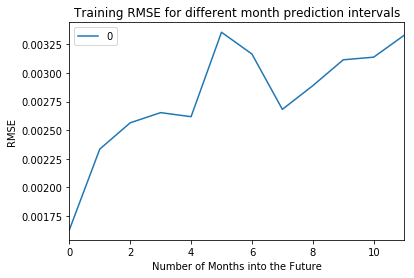

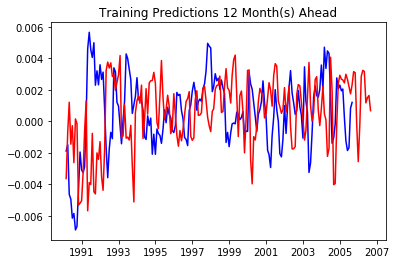

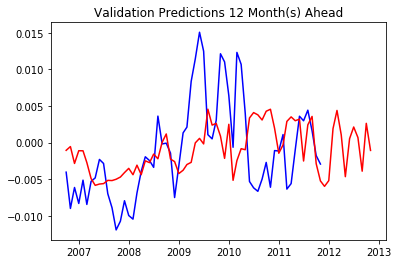

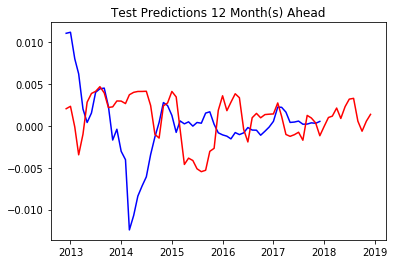

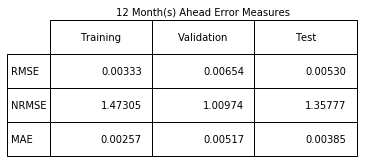

8
ADF Statistic: -2.977440
p-value: 0.037056
ADF Statistic: -4.413713
p-value: 0.000281
hello!!!!!
(197, 17)
(197, 1, 17)
(74, 17)
Epoch 1/100
197/197 [==============================] - 11s 56ms/step - loss: 1.0540
Epoch 2/100
197/197 [==============================] - 0s 30us/step - loss: 1.0654
Epoch 3/100
197/197 [==============================] - 0s 32us/step - loss: 1.0600
Epoch 4/100
197/197 [==============================] - 0s 54us/step - loss: 1.0607
Epoch 5/100
197/197 [==============================] - 0s 32us/step - loss: 1.0414
Epoch 6/100
197/197 [==============================] - 0s 30us/step - loss: 1.0406
Epoch 7/100
197/197 [==============================] - 0s 31us/step - loss: 1.0477
Epoch 8/100
197/197 [==============================] - 0s 39us/step - loss: 1.0556
Epoch 9/100
197/197 [==============================] - 0s 36us/step - loss: 1.0433
Epoch 10/100
197/197 [==============================] - 0s 36us/step - loss: 1.0663
Epoch 11/100
197/197 [===============

197/197 [==============================] - 0s 30us/step - loss: 1.0211
Epoch 98/100
197/197 [==============================] - 0s 36us/step - loss: 1.0441
Epoch 99/100
197/197 [==============================] - 0s 27us/step - loss: 1.0367
Epoch 100/100
197/197 [==============================] - 0s 30us/step - loss: 0.9992
Epoch 1/100
197/197 [==============================] - 11s 57ms/step - loss: 1.0903
Epoch 2/100
197/197 [==============================] - 0s 29us/step - loss: 0.9589
Epoch 3/100
197/197 [==============================] - 0s 29us/step - loss: 0.9444
Epoch 4/100
197/197 [==============================] - 0s 55us/step - loss: 0.9991
Epoch 5/100
197/197 [==============================] - 0s 58us/step - loss: 0.9638
Epoch 6/100
197/197 [==============================] - 0s 40us/step - loss: 1.0147
Epoch 7/100
197/197 [==============================] - 0s 37us/step - loss: 0.9312
Epoch 8/100
197/197 [==============================] - 0s 44us/step - loss: 0.9784
Epoch 9/100

Epoch 95/100
197/197 [==============================] - 0s 30us/step - loss: 0.7392
Epoch 96/100
197/197 [==============================] - 0s 41us/step - loss: 0.7989
Epoch 97/100
197/197 [==============================] - 0s 38us/step - loss: 0.8030
Epoch 98/100
197/197 [==============================] - 0s 26us/step - loss: 0.8542
Epoch 99/100
197/197 [==============================] - 0s 30us/step - loss: 0.8007
Epoch 100/100
197/197 [==============================] - 0s 32us/step - loss: 0.7573
Epoch 1/100
197/197 [==============================] - 12s 59ms/step - loss: 0.8582
Epoch 2/100
197/197 [==============================] - 0s 37us/step - loss: 0.8826
Epoch 3/100
197/197 [==============================] - 0s 30us/step - loss: 0.7458
Epoch 4/100
197/197 [==============================] - 0s 33us/step - loss: 0.8227
Epoch 5/100
197/197 [==============================] - 0s 33us/step - loss: 0.7657
Epoch 6/100
197/197 [==============================] - 0s 28us/step - loss: 0.6

197/197 [==============================] - 0s 38us/step - loss: 0.3958
Epoch 93/100
197/197 [==============================] - 0s 37us/step - loss: 0.4460
Epoch 94/100
197/197 [==============================] - 0s 42us/step - loss: 0.4668
Epoch 95/100
197/197 [==============================] - 0s 45us/step - loss: 0.4159
Epoch 96/100
197/197 [==============================] - 0s 32us/step - loss: 0.5061
Epoch 97/100
197/197 [==============================] - 0s 35us/step - loss: 0.4275
Epoch 98/100
197/197 [==============================] - 0s 32us/step - loss: 0.3978
Epoch 99/100
197/197 [==============================] - 0s 32us/step - loss: 0.3934
Epoch 100/100
197/197 [==============================] - 0s 31us/step - loss: 0.4065
Epoch 1/100
197/197 [==============================] - 11s 58ms/step - loss: 1.2379
Epoch 2/100
197/197 [==============================] - 0s 30us/step - loss: 0.8478
Epoch 3/100
197/197 [==============================] - 0s 29us/step - loss: 0.8150
Epoch 

Epoch 90/100
197/197 [==============================] - 0s 24us/step - loss: 0.5461
Epoch 91/100
197/197 [==============================] - 0s 24us/step - loss: 0.4967
Epoch 92/100
197/197 [==============================] - 0s 25us/step - loss: 0.4434
Epoch 93/100
197/197 [==============================] - 0s 31us/step - loss: 0.5156
Epoch 94/100
197/197 [==============================] - 0s 31us/step - loss: 0.4776
Epoch 95/100
197/197 [==============================] - 0s 25us/step - loss: 0.5124
Epoch 96/100
197/197 [==============================] - 0s 29us/step - loss: 0.4946
Epoch 97/100
197/197 [==============================] - 0s 23us/step - loss: 0.4700
Epoch 98/100
197/197 [==============================] - 0s 34us/step - loss: 0.5478
Epoch 99/100
197/197 [==============================] - 0s 30us/step - loss: 0.4788
Epoch 100/100
197/197 [==============================] - 0s 41us/step - loss: 0.4643
Epoch 1/100
197/197 [==============================] - 13s 64ms/step - loss

197/197 [==============================] - 0s 32us/step - loss: 0.9390
Epoch 88/100
197/197 [==============================] - 0s 35us/step - loss: 0.9414
Epoch 89/100
197/197 [==============================] - 0s 28us/step - loss: 0.9089
Epoch 90/100
197/197 [==============================] - 0s 35us/step - loss: 1.0578
Epoch 91/100
197/197 [==============================] - 0s 26us/step - loss: 0.9527
Epoch 92/100
197/197 [==============================] - 0s 28us/step - loss: 0.9844
Epoch 93/100
197/197 [==============================] - 0s 32us/step - loss: 0.9898
Epoch 94/100
197/197 [==============================] - 0s 26us/step - loss: 0.9998
Epoch 95/100
197/197 [==============================] - 0s 29us/step - loss: 1.0332
Epoch 96/100
197/197 [==============================] - 0s 25us/step - loss: 0.9243
Epoch 97/100
197/197 [==============================] - 0s 26us/step - loss: 1.0411
Epoch 98/100
197/197 [==============================] - 0s 25us/step - loss: 0.9875
Epoch

Epoch 85/100
197/197 [==============================] - 0s 31us/step - loss: 0.6757
Epoch 86/100
197/197 [==============================] - 0s 31us/step - loss: 0.6272
Epoch 87/100
197/197 [==============================] - 0s 34us/step - loss: 0.7107
Epoch 88/100
197/197 [==============================] - 0s 28us/step - loss: 0.7444
Epoch 89/100
197/197 [==============================] - 0s 29us/step - loss: 0.6873
Epoch 90/100
197/197 [==============================] - 0s 23us/step - loss: 0.6740
Epoch 91/100
197/197 [==============================] - 0s 30us/step - loss: 0.6569
Epoch 92/100
197/197 [==============================] - 0s 35us/step - loss: 0.6477
Epoch 93/100
197/197 [==============================] - 0s 26us/step - loss: 0.6734
Epoch 94/100
197/197 [==============================] - 0s 22us/step - loss: 0.6911
Epoch 95/100
197/197 [==============================] - 0s 25us/step - loss: 0.6255
Epoch 96/100
197/197 [==============================] - 0s 23us/step - loss:

Epoch 83/100
197/197 [==============================] - 0s 36us/step - loss: 0.3174
Epoch 84/100
197/197 [==============================] - 0s 25us/step - loss: 0.3360
Epoch 85/100
197/197 [==============================] - 0s 27us/step - loss: 0.2948
Epoch 86/100
197/197 [==============================] - 0s 29us/step - loss: 0.2992
Epoch 87/100
197/197 [==============================] - 0s 37us/step - loss: 0.3007
Epoch 88/100
197/197 [==============================] - 0s 30us/step - loss: 0.3420
Epoch 89/100
197/197 [==============================] - 0s 25us/step - loss: 0.3295
Epoch 90/100
197/197 [==============================] - 0s 42us/step - loss: 0.3048
Epoch 91/100
197/197 [==============================] - 0s 31us/step - loss: 0.2953
Epoch 92/100
197/197 [==============================] - 0s 24us/step - loss: 0.2901
Epoch 93/100
197/197 [==============================] - 0s 23us/step - loss: 0.3525
Epoch 94/100
197/197 [==============================] - 0s 25us/step - loss:

Epoch 81/100
197/197 [==============================] - 0s 29us/step - loss: 0.2793
Epoch 82/100
197/197 [==============================] - 0s 33us/step - loss: 0.4050
Epoch 83/100
197/197 [==============================] - 0s 26us/step - loss: 0.3916
Epoch 84/100
197/197 [==============================] - 0s 34us/step - loss: 0.3538
Epoch 85/100
197/197 [==============================] - 0s 29us/step - loss: 0.4060
Epoch 86/100
197/197 [==============================] - 0s 31us/step - loss: 0.4051
Epoch 87/100
197/197 [==============================] - 0s 29us/step - loss: 0.3320
Epoch 88/100
197/197 [==============================] - 0s 32us/step - loss: 0.4113
Epoch 89/100
197/197 [==============================] - 0s 33us/step - loss: 0.3672
Epoch 90/100
197/197 [==============================] - 0s 25us/step - loss: 0.3741
Epoch 91/100
197/197 [==============================] - 0s 29us/step - loss: 0.3867
Epoch 92/100
197/197 [==============================] - 0s 27us/step - loss:

Epoch 79/100
197/197 [==============================] - 0s 32us/step - loss: 0.8921
Epoch 80/100
197/197 [==============================] - 0s 26us/step - loss: 0.9080
Epoch 81/100
197/197 [==============================] - 0s 28us/step - loss: 0.8710
Epoch 82/100
197/197 [==============================] - 0s 26us/step - loss: 0.9038
Epoch 83/100
197/197 [==============================] - 0s 26us/step - loss: 0.9250
Epoch 84/100
197/197 [==============================] - 0s 30us/step - loss: 0.8757
Epoch 85/100
197/197 [==============================] - 0s 26us/step - loss: 0.8875
Epoch 86/100
197/197 [==============================] - 0s 26us/step - loss: 0.9086
Epoch 87/100
197/197 [==============================] - 0s 24us/step - loss: 0.9109
Epoch 88/100
197/197 [==============================] - 0s 26us/step - loss: 0.8953
Epoch 89/100
197/197 [==============================] - 0s 26us/step - loss: 0.8851
Epoch 90/100
197/197 [==============================] - 0s 27us/step - loss:

Epoch 77/100
197/197 [==============================] - 0s 27us/step - loss: 0.6107
Epoch 78/100
197/197 [==============================] - 0s 28us/step - loss: 0.6177
Epoch 79/100
197/197 [==============================] - 0s 27us/step - loss: 0.6263
Epoch 80/100
197/197 [==============================] - 0s 40us/step - loss: 0.6128
Epoch 81/100
197/197 [==============================] - 0s 24us/step - loss: 0.6596
Epoch 82/100
197/197 [==============================] - 0s 29us/step - loss: 0.6266
Epoch 83/100
197/197 [==============================] - 0s 26us/step - loss: 0.5793
Epoch 84/100
197/197 [==============================] - 0s 29us/step - loss: 0.6390
Epoch 85/100
197/197 [==============================] - 0s 26us/step - loss: 0.6453
Epoch 86/100
197/197 [==============================] - 0s 29us/step - loss: 0.6117
Epoch 87/100
197/197 [==============================] - 0s 25us/step - loss: 0.6208
Epoch 88/100
197/197 [==============================] - 0s 28us/step - loss:

Epoch 75/100
197/197 [==============================] - 0s 27us/step - loss: 0.2522
Epoch 76/100
197/197 [==============================] - 0s 27us/step - loss: 0.2591
Epoch 77/100
197/197 [==============================] - 0s 29us/step - loss: 0.2642
Epoch 78/100
197/197 [==============================] - 0s 27us/step - loss: 0.2567
Epoch 79/100
197/197 [==============================] - 0s 25us/step - loss: 0.2784
Epoch 80/100
197/197 [==============================] - 0s 26us/step - loss: 0.2851
Epoch 81/100
197/197 [==============================] - 0s 30us/step - loss: 0.2988
Epoch 82/100
197/197 [==============================] - 0s 30us/step - loss: 0.2382
Epoch 83/100
197/197 [==============================] - 0s 25us/step - loss: 0.2728
Epoch 84/100
197/197 [==============================] - 0s 26us/step - loss: 0.3003
Epoch 85/100
197/197 [==============================] - 0s 27us/step - loss: 0.2434
Epoch 86/100
197/197 [==============================] - 0s 31us/step - loss:

Epoch 73/100
197/197 [==============================] - 0s 27us/step - loss: 0.2758
Epoch 74/100
197/197 [==============================] - 0s 25us/step - loss: 0.3003
Epoch 75/100
197/197 [==============================] - 0s 23us/step - loss: 0.3185
Epoch 76/100
197/197 [==============================] - 0s 29us/step - loss: 0.2610
Epoch 77/100
197/197 [==============================] - 0s 29us/step - loss: 0.3357
Epoch 78/100
197/197 [==============================] - 0s 27us/step - loss: 0.2940
Epoch 79/100
197/197 [==============================] - 0s 27us/step - loss: 0.2309
Epoch 80/100
197/197 [==============================] - 0s 26us/step - loss: 0.3116
Epoch 81/100
197/197 [==============================] - 0s 25us/step - loss: 0.2952
Epoch 82/100
197/197 [==============================] - 0s 28us/step - loss: 0.2635
Epoch 83/100
197/197 [==============================] - 0s 29us/step - loss: 0.2232
Epoch 84/100
197/197 [==============================] - 0s 28us/step - loss:

Epoch 71/100
197/197 [==============================] - 0s 32us/step - loss: 0.7452
Epoch 72/100
197/197 [==============================] - 0s 31us/step - loss: 0.7416
Epoch 73/100
197/197 [==============================] - 0s 33us/step - loss: 0.7991
Epoch 74/100
197/197 [==============================] - 0s 26us/step - loss: 0.8039
Epoch 75/100
197/197 [==============================] - 0s 28us/step - loss: 0.7708
Epoch 76/100
197/197 [==============================] - 0s 28us/step - loss: 0.7447
Epoch 77/100
197/197 [==============================] - 0s 25us/step - loss: 0.7591
Epoch 78/100
197/197 [==============================] - 0s 32us/step - loss: 0.7665
Epoch 79/100
197/197 [==============================] - 0s 31us/step - loss: 0.7971
Epoch 80/100
197/197 [==============================] - 0s 29us/step - loss: 0.7725
Epoch 81/100
197/197 [==============================] - 0s 24us/step - loss: 0.7940
Epoch 82/100
197/197 [==============================] - 0s 26us/step - loss:

Epoch 69/100
197/197 [==============================] - 0s 32us/step - loss: 0.5384
Epoch 70/100
197/197 [==============================] - 0s 30us/step - loss: 0.5824
Epoch 71/100
197/197 [==============================] - 0s 38us/step - loss: 0.5562
Epoch 72/100
197/197 [==============================] - 0s 29us/step - loss: 0.5312
Epoch 73/100
197/197 [==============================] - 0s 33us/step - loss: 0.5331
Epoch 74/100
197/197 [==============================] - 0s 28us/step - loss: 0.4830
Epoch 75/100
197/197 [==============================] - 0s 27us/step - loss: 0.4667
Epoch 76/100
197/197 [==============================] - 0s 35us/step - loss: 0.5458
Epoch 77/100
197/197 [==============================] - 0s 30us/step - loss: 0.5219
Epoch 78/100
197/197 [==============================] - 0s 41us/step - loss: 0.5334
Epoch 79/100
197/197 [==============================] - 0s 32us/step - loss: 0.5331
Epoch 80/100
197/197 [==============================] - 0s 29us/step - loss:

Epoch 67/100
197/197 [==============================] - 0s 28us/step - loss: 0.2479
Epoch 68/100
197/197 [==============================] - 0s 27us/step - loss: 0.2488
Epoch 69/100
197/197 [==============================] - 0s 25us/step - loss: 0.2087
Epoch 70/100
197/197 [==============================] - 0s 27us/step - loss: 0.2222
Epoch 71/100
197/197 [==============================] - 0s 29us/step - loss: 0.2080
Epoch 72/100
197/197 [==============================] - 0s 26us/step - loss: 0.1951
Epoch 73/100
197/197 [==============================] - 0s 29us/step - loss: 0.2078
Epoch 74/100
197/197 [==============================] - 0s 28us/step - loss: 0.2242
Epoch 75/100
197/197 [==============================] - 0s 30us/step - loss: 0.2335
Epoch 76/100
197/197 [==============================] - 0s 28us/step - loss: 0.1990
Epoch 77/100
197/197 [==============================] - 0s 26us/step - loss: 0.1909
Epoch 78/100
197/197 [==============================] - 0s 26us/step - loss:

197/197 [==============================] - 0s 29us/step - loss: 0.2982
Epoch 65/100
197/197 [==============================] - 0s 37us/step - loss: 0.2070
Epoch 66/100
197/197 [==============================] - 0s 30us/step - loss: 0.3009
Epoch 67/100
197/197 [==============================] - 0s 28us/step - loss: 0.3114
Epoch 68/100
197/197 [==============================] - 0s 28us/step - loss: 0.4864
Epoch 69/100
197/197 [==============================] - 0s 29us/step - loss: 0.3924
Epoch 70/100
197/197 [==============================] - 0s 33us/step - loss: 0.2279
Epoch 71/100
197/197 [==============================] - 0s 31us/step - loss: 0.1780
Epoch 72/100
197/197 [==============================] - 0s 31us/step - loss: 0.2270
Epoch 73/100
197/197 [==============================] - 0s 32us/step - loss: 0.2274
Epoch 74/100
197/197 [==============================] - 0s 29us/step - loss: 0.2572
Epoch 75/100
197/197 [==============================] - 0s 39us/step - loss: 0.2757
Epoch

Epoch 62/100
197/197 [==============================] - 0s 40us/step - loss: 0.7922
Epoch 63/100
197/197 [==============================] - 0s 37us/step - loss: 0.7761
Epoch 64/100
197/197 [==============================] - 0s 35us/step - loss: 0.8118
Epoch 65/100
197/197 [==============================] - 0s 41us/step - loss: 0.7902
Epoch 66/100
197/197 [==============================] - 0s 33us/step - loss: 0.8066
Epoch 67/100
197/197 [==============================] - 0s 47us/step - loss: 0.7830
Epoch 68/100
197/197 [==============================] - 0s 33us/step - loss: 0.7829
Epoch 69/100
197/197 [==============================] - 0s 56us/step - loss: 0.7763
Epoch 70/100
197/197 [==============================] - 0s 39us/step - loss: 0.7949
Epoch 71/100
197/197 [==============================] - 0s 39us/step - loss: 0.7896
Epoch 72/100
197/197 [==============================] - 0s 34us/step - loss: 0.7883
Epoch 73/100
197/197 [==============================] - 0s 38us/step - loss:

Epoch 60/100
197/197 [==============================] - 0s 46us/step - loss: 0.4330
Epoch 61/100
197/197 [==============================] - 0s 42us/step - loss: 0.4326
Epoch 62/100
197/197 [==============================] - 0s 37us/step - loss: 0.4533
Epoch 63/100
197/197 [==============================] - 0s 37us/step - loss: 0.4163
Epoch 64/100
197/197 [==============================] - 0s 32us/step - loss: 0.4301
Epoch 65/100
197/197 [==============================] - 0s 37us/step - loss: 0.4094
Epoch 66/100
197/197 [==============================] - 0s 40us/step - loss: 0.4209
Epoch 67/100
197/197 [==============================] - 0s 39us/step - loss: 0.4147
Epoch 68/100
197/197 [==============================] - 0s 37us/step - loss: 0.4090
Epoch 69/100
197/197 [==============================] - 0s 45us/step - loss: 0.3966
Epoch 70/100
197/197 [==============================] - 0s 39us/step - loss: 0.4035
Epoch 71/100
197/197 [==============================] - 0s 39us/step - loss:

Epoch 58/100
197/197 [==============================] - 0s 39us/step - loss: 0.2045
Epoch 59/100
197/197 [==============================] - 0s 38us/step - loss: 0.1961
Epoch 60/100
197/197 [==============================] - 0s 39us/step - loss: 0.2085
Epoch 61/100
197/197 [==============================] - 0s 39us/step - loss: 0.2203
Epoch 62/100
197/197 [==============================] - 0s 39us/step - loss: 0.2144
Epoch 63/100
197/197 [==============================] - 0s 39us/step - loss: 0.2102
Epoch 64/100
197/197 [==============================] - 0s 39us/step - loss: 0.2095
Epoch 65/100
197/197 [==============================] - 0s 40us/step - loss: 0.1849
Epoch 66/100
197/197 [==============================] - 0s 41us/step - loss: 0.2056
Epoch 67/100
197/197 [==============================] - 0s 45us/step - loss: 0.2048
Epoch 68/100
197/197 [==============================] - 0s 38us/step - loss: 0.2603
Epoch 69/100
197/197 [==============================] - 0s 38us/step - loss:

197/197 [==============================] - 0s 42us/step - loss: 0.2918
Epoch 56/100
197/197 [==============================] - 0s 41us/step - loss: 0.1945
Epoch 57/100
197/197 [==============================] - 0s 37us/step - loss: 0.2261
Epoch 58/100
197/197 [==============================] - 0s 33us/step - loss: 0.1850
Epoch 59/100
197/197 [==============================] - 0s 35us/step - loss: 0.2510
Epoch 60/100
197/197 [==============================] - 0s 37us/step - loss: 0.2303
Epoch 61/100
197/197 [==============================] - 0s 35us/step - loss: 0.2197
Epoch 62/100
197/197 [==============================] - 0s 39us/step - loss: 0.2629
Epoch 63/100
197/197 [==============================] - 0s 34us/step - loss: 0.3678
Epoch 64/100
197/197 [==============================] - 0s 37us/step - loss: 0.4654
Epoch 65/100
197/197 [==============================] - 0s 35us/step - loss: 0.2817
Epoch 66/100
197/197 [==============================] - 0s 40us/step - loss: 0.3724
Epoch

197/197 [==============================] - 1s 4ms/step - loss: 0.2541
Epoch 54/100
197/197 [==============================] - 1s 5ms/step - loss: 0.3588
Epoch 55/100
197/197 [==============================] - 1s 4ms/step - loss: 0.2897
Epoch 56/100
197/197 [==============================] - 1s 5ms/step - loss: 0.3129
Epoch 57/100
197/197 [==============================] - 1s 5ms/step - loss: 0.2773
Epoch 58/100
197/197 [==============================] - 1s 4ms/step - loss: 0.2672
Epoch 59/100
197/197 [==============================] - 1s 5ms/step - loss: 0.3262
Epoch 60/100
197/197 [==============================] - 1s 5ms/step - loss: 0.3005
Epoch 61/100
197/197 [==============================] - 1s 5ms/step - loss: 0.2440
Epoch 62/100
197/197 [==============================] - 1s 4ms/step - loss: 0.2895
Epoch 63/100
197/197 [==============================] - 1s 4ms/step - loss: 0.3674
Epoch 64/100
197/197 [==============================] - 1s 4ms/step - loss: 0.2922
Epoch 65/100
197/

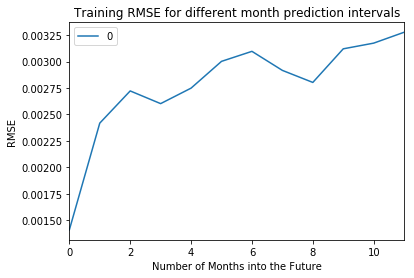

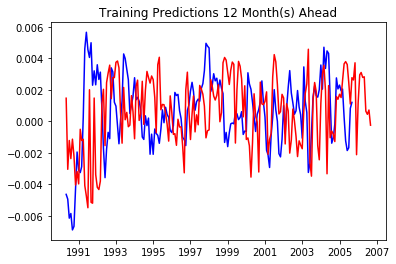

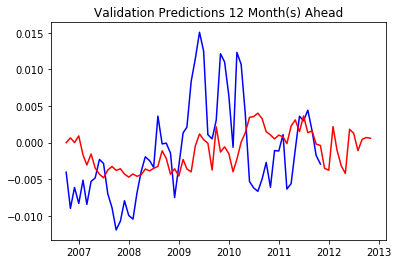

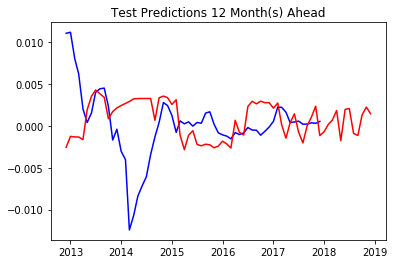

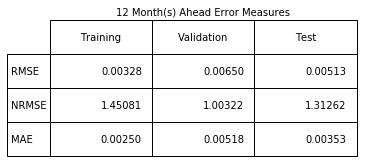

9
ADF Statistic: -2.977440
p-value: 0.037056
ADF Statistic: -4.330377
p-value: 0.000393
hello!!!!!
(195, 19)
(195, 1, 19)
(74, 19)
Epoch 1/100
195/195 [==============================] - 13s 65ms/step - loss: 0.9997
Epoch 2/100
195/195 [==============================] - 0s 27us/step - loss: 1.0260
Epoch 3/100
195/195 [==============================] - 0s 26us/step - loss: 1.0655
Epoch 4/100
195/195 [==============================] - 0s 28us/step - loss: 1.0156
Epoch 5/100
195/195 [==============================] - 0s 26us/step - loss: 1.0381
Epoch 6/100
195/195 [==============================] - 0s 28us/step - loss: 1.0084
Epoch 7/100
195/195 [==============================] - 0s 29us/step - loss: 1.0389
Epoch 8/100
195/195 [==============================] - 0s 26us/step - loss: 1.0054
Epoch 9/100
195/195 [==============================] - 0s 27us/step - loss: 1.0291
Epoch 10/100
195/195 [==============================] - 0s 26us/step - loss: 1.0029
Epoch 11/100
195/195 [===============

195/195 [==============================] - 0s 33us/step - loss: 0.9929
Epoch 98/100
195/195 [==============================] - 0s 39us/step - loss: 1.0072
Epoch 99/100
195/195 [==============================] - 0s 36us/step - loss: 0.9751
Epoch 100/100
195/195 [==============================] - 0s 29us/step - loss: 1.0405
Epoch 1/100
195/195 [==============================] - 13s 65ms/step - loss: 1.1479
Epoch 2/100
195/195 [==============================] - 0s 28us/step - loss: 1.2167
Epoch 3/100
195/195 [==============================] - 0s 27us/step - loss: 1.0976
Epoch 4/100
195/195 [==============================] - 0s 26us/step - loss: 1.1422
Epoch 5/100
195/195 [==============================] - 0s 25us/step - loss: 1.1936
Epoch 6/100
195/195 [==============================] - 0s 26us/step - loss: 1.1084
Epoch 7/100
195/195 [==============================] - 0s 27us/step - loss: 1.2129
Epoch 8/100
195/195 [==============================] - 0s 30us/step - loss: 1.0940
Epoch 9/100

Epoch 95/100
195/195 [==============================] - 0s 31us/step - loss: 0.8292
Epoch 96/100
195/195 [==============================] - 0s 33us/step - loss: 0.8165
Epoch 97/100
195/195 [==============================] - 0s 36us/step - loss: 0.7824
Epoch 98/100
195/195 [==============================] - 0s 25us/step - loss: 0.7847
Epoch 99/100
195/195 [==============================] - 0s 24us/step - loss: 0.7655
Epoch 100/100
195/195 [==============================] - 0s 25us/step - loss: 0.7812
Epoch 1/100
195/195 [==============================] - 13s 66ms/step - loss: 1.0632
Epoch 2/100
195/195 [==============================] - 0s 25us/step - loss: 1.0534
Epoch 3/100
195/195 [==============================] - 0s 26us/step - loss: 0.9933
Epoch 4/100
195/195 [==============================] - 0s 29us/step - loss: 0.9379
Epoch 5/100
195/195 [==============================] - 0s 28us/step - loss: 0.9226
Epoch 6/100
195/195 [==============================] - 0s 33us/step - loss: 0.9

Epoch 93/100
195/195 [==============================] - 0s 30us/step - loss: 0.4648
Epoch 94/100
195/195 [==============================] - 0s 26us/step - loss: 0.4341
Epoch 95/100
195/195 [==============================] - 0s 27us/step - loss: 0.4512
Epoch 96/100
195/195 [==============================] - 0s 27us/step - loss: 0.4289
Epoch 97/100
195/195 [==============================] - 0s 28us/step - loss: 0.4248
Epoch 98/100
195/195 [==============================] - 0s 30us/step - loss: 0.5036
Epoch 99/100
195/195 [==============================] - 0s 29us/step - loss: 0.4051
Epoch 100/100
195/195 [==============================] - 0s 30us/step - loss: 0.4369
Epoch 1/100
195/195 [==============================] - 13s 66ms/step - loss: 0.9930
Epoch 2/100
195/195 [==============================] - 0s 28us/step - loss: 1.2852
Epoch 3/100
195/195 [==============================] - 0s 27us/step - loss: 0.9038
Epoch 4/100
195/195 [==============================] - 0s 28us/step - loss: 0

Epoch 91/100
195/195 [==============================] - 0s 28us/step - loss: 0.4835
Epoch 92/100
195/195 [==============================] - 0s 29us/step - loss: 0.5936
Epoch 93/100
195/195 [==============================] - 0s 37us/step - loss: 0.5478
Epoch 94/100
195/195 [==============================] - 0s 28us/step - loss: 0.5501
Epoch 95/100
195/195 [==============================] - 0s 28us/step - loss: 0.5239
Epoch 96/100
195/195 [==============================] - 0s 29us/step - loss: 0.4333
Epoch 97/100
195/195 [==============================] - 0s 28us/step - loss: 0.5203
Epoch 98/100
195/195 [==============================] - 0s 30us/step - loss: 0.3686
Epoch 99/100
195/195 [==============================] - 0s 29us/step - loss: 0.3842
Epoch 100/100
195/195 [==============================] - 0s 34us/step - loss: 0.3968
Epoch 1/100
195/195 [==============================] - 13s 66ms/step - loss: 1.2600
Epoch 2/100
195/195 [==============================] - 0s 31us/step - loss:

Epoch 89/100
195/195 [==============================] - 0s 28us/step - loss: 1.1967
Epoch 90/100
195/195 [==============================] - 0s 29us/step - loss: 1.1821
Epoch 91/100
195/195 [==============================] - 0s 27us/step - loss: 1.1914
Epoch 92/100
195/195 [==============================] - 0s 28us/step - loss: 1.1563
Epoch 93/100
195/195 [==============================] - 0s 32us/step - loss: 1.1204
Epoch 94/100
195/195 [==============================] - 0s 30us/step - loss: 1.2205
Epoch 95/100
195/195 [==============================] - 0s 30us/step - loss: 1.1325
Epoch 96/100
195/195 [==============================] - 0s 28us/step - loss: 1.1344
Epoch 97/100
195/195 [==============================] - 0s 28us/step - loss: 1.1558
Epoch 98/100
195/195 [==============================] - 0s 29us/step - loss: 1.1648
Epoch 99/100
195/195 [==============================] - 0s 31us/step - loss: 1.1639
Epoch 100/100
195/195 [==============================] - 0s 28us/step - loss

Epoch 87/100
195/195 [==============================] - 0s 25us/step - loss: 0.7936
Epoch 88/100
195/195 [==============================] - 0s 29us/step - loss: 0.7996
Epoch 89/100
195/195 [==============================] - 0s 30us/step - loss: 0.7693
Epoch 90/100
195/195 [==============================] - 0s 30us/step - loss: 0.7906
Epoch 91/100
195/195 [==============================] - 0s 28us/step - loss: 0.7964
Epoch 92/100
195/195 [==============================] - 0s 28us/step - loss: 0.8113
Epoch 93/100
195/195 [==============================] - 0s 28us/step - loss: 0.7809
Epoch 94/100
195/195 [==============================] - 0s 29us/step - loss: 0.8102
Epoch 95/100
195/195 [==============================] - 0s 27us/step - loss: 0.8435
Epoch 96/100
195/195 [==============================] - 0s 31us/step - loss: 0.8498
Epoch 97/100
195/195 [==============================] - 0s 28us/step - loss: 0.8209
Epoch 98/100
195/195 [==============================] - 0s 31us/step - loss:

Epoch 85/100
195/195 [==============================] - 0s 28us/step - loss: 0.4124
Epoch 86/100
195/195 [==============================] - 0s 26us/step - loss: 0.3038
Epoch 87/100
195/195 [==============================] - 0s 27us/step - loss: 0.2896
Epoch 88/100
195/195 [==============================] - 0s 31us/step - loss: 0.2986
Epoch 89/100
195/195 [==============================] - 0s 29us/step - loss: 0.3661
Epoch 90/100
195/195 [==============================] - 0s 33us/step - loss: 0.3153
Epoch 91/100
195/195 [==============================] - 0s 30us/step - loss: 0.2630
Epoch 92/100
195/195 [==============================] - 0s 25us/step - loss: 0.3131
Epoch 93/100
195/195 [==============================] - 0s 26us/step - loss: 0.2919
Epoch 94/100
195/195 [==============================] - 0s 28us/step - loss: 0.2684
Epoch 95/100
195/195 [==============================] - 0s 25us/step - loss: 0.2986
Epoch 96/100
195/195 [==============================] - 0s 29us/step - loss:

Epoch 83/100
195/195 [==============================] - 0s 28us/step - loss: 0.4019
Epoch 84/100
195/195 [==============================] - 0s 37us/step - loss: 0.3532
Epoch 85/100
195/195 [==============================] - 0s 30us/step - loss: 0.2747
Epoch 86/100
195/195 [==============================] - 0s 38us/step - loss: 0.3233
Epoch 87/100
195/195 [==============================] - 0s 25us/step - loss: 0.3019
Epoch 88/100
195/195 [==============================] - 0s 31us/step - loss: 0.3579
Epoch 89/100
195/195 [==============================] - 0s 25us/step - loss: 0.3354
Epoch 90/100
195/195 [==============================] - 0s 26us/step - loss: 0.3728
Epoch 91/100
195/195 [==============================] - 0s 28us/step - loss: 0.4505
Epoch 92/100
195/195 [==============================] - 0s 28us/step - loss: 0.5056
Epoch 93/100
195/195 [==============================] - 0s 27us/step - loss: 0.3810
Epoch 94/100
195/195 [==============================] - 0s 29us/step - loss:

Epoch 81/100
195/195 [==============================] - 0s 29us/step - loss: 0.9186
Epoch 82/100
195/195 [==============================] - 0s 30us/step - loss: 0.9576
Epoch 83/100
195/195 [==============================] - 0s 38us/step - loss: 0.9565
Epoch 84/100
195/195 [==============================] - 0s 28us/step - loss: 0.9566
Epoch 85/100
195/195 [==============================] - 0s 28us/step - loss: 0.9173
Epoch 86/100
195/195 [==============================] - 0s 33us/step - loss: 0.9199
Epoch 87/100
195/195 [==============================] - 0s 29us/step - loss: 0.8984
Epoch 88/100
195/195 [==============================] - 0s 30us/step - loss: 0.8933
Epoch 89/100
195/195 [==============================] - 0s 27us/step - loss: 0.8768
Epoch 90/100
195/195 [==============================] - 0s 30us/step - loss: 0.9024
Epoch 91/100
195/195 [==============================] - 0s 25us/step - loss: 0.9224
Epoch 92/100
195/195 [==============================] - 0s 29us/step - loss:

Epoch 79/100
195/195 [==============================] - 0s 27us/step - loss: 0.5631
Epoch 80/100
195/195 [==============================] - 0s 27us/step - loss: 0.5105
Epoch 81/100
195/195 [==============================] - 0s 28us/step - loss: 0.6263
Epoch 82/100
195/195 [==============================] - 0s 26us/step - loss: 0.5765
Epoch 83/100
195/195 [==============================] - 0s 27us/step - loss: 0.5570
Epoch 84/100
195/195 [==============================] - 0s 26us/step - loss: 0.5621
Epoch 85/100
195/195 [==============================] - 0s 26us/step - loss: 0.5319
Epoch 86/100
195/195 [==============================] - 0s 29us/step - loss: 0.5403
Epoch 87/100
195/195 [==============================] - 0s 28us/step - loss: 0.5443
Epoch 88/100
195/195 [==============================] - 0s 28us/step - loss: 0.5695
Epoch 89/100
195/195 [==============================] - 0s 34us/step - loss: 0.5580
Epoch 90/100
195/195 [==============================] - 0s 28us/step - loss:

Epoch 77/100
195/195 [==============================] - 0s 40us/step - loss: 0.2386
Epoch 78/100
195/195 [==============================] - 0s 29us/step - loss: 0.2552
Epoch 79/100
195/195 [==============================] - 0s 31us/step - loss: 0.2578
Epoch 80/100
195/195 [==============================] - 0s 28us/step - loss: 0.2922
Epoch 81/100
195/195 [==============================] - 0s 30us/step - loss: 0.2741
Epoch 82/100
195/195 [==============================] - 0s 27us/step - loss: 0.2364
Epoch 83/100
195/195 [==============================] - 0s 32us/step - loss: 0.2629
Epoch 84/100
195/195 [==============================] - 0s 31us/step - loss: 0.2408
Epoch 85/100
195/195 [==============================] - 0s 28us/step - loss: 0.2625
Epoch 86/100
195/195 [==============================] - 0s 30us/step - loss: 0.2204
Epoch 87/100
195/195 [==============================] - 0s 27us/step - loss: 0.2331
Epoch 88/100
195/195 [==============================] - 0s 34us/step - loss:

Epoch 75/100
195/195 [==============================] - 0s 26us/step - loss: 0.2957
Epoch 76/100
195/195 [==============================] - 0s 31us/step - loss: 0.3136
Epoch 77/100
195/195 [==============================] - 0s 30us/step - loss: 0.2670
Epoch 78/100
195/195 [==============================] - 0s 31us/step - loss: 0.3433
Epoch 79/100
195/195 [==============================] - 0s 35us/step - loss: 0.3581
Epoch 80/100
195/195 [==============================] - 0s 28us/step - loss: 0.3580
Epoch 81/100
195/195 [==============================] - 0s 31us/step - loss: 0.3148
Epoch 82/100
195/195 [==============================] - 0s 31us/step - loss: 0.2518
Epoch 83/100
195/195 [==============================] - 0s 29us/step - loss: 0.2774
Epoch 84/100
195/195 [==============================] - 0s 33us/step - loss: 0.2920
Epoch 85/100
195/195 [==============================] - 0s 28us/step - loss: 0.2847
Epoch 86/100
195/195 [==============================] - 0s 27us/step - loss:

Epoch 73/100
195/195 [==============================] - 0s 33us/step - loss: 0.9171
Epoch 74/100
195/195 [==============================] - 0s 29us/step - loss: 0.9434
Epoch 75/100
195/195 [==============================] - 0s 34us/step - loss: 0.9673
Epoch 76/100
195/195 [==============================] - 0s 30us/step - loss: 0.9285
Epoch 77/100
195/195 [==============================] - 0s 31us/step - loss: 0.9235
Epoch 78/100
195/195 [==============================] - 0s 39us/step - loss: 0.9298
Epoch 79/100
195/195 [==============================] - 0s 35us/step - loss: 0.9223
Epoch 80/100
195/195 [==============================] - 0s 32us/step - loss: 0.9181
Epoch 81/100
195/195 [==============================] - 0s 35us/step - loss: 0.9208
Epoch 82/100
195/195 [==============================] - 0s 29us/step - loss: 0.9675
Epoch 83/100
195/195 [==============================] - 0s 41us/step - loss: 0.9150
Epoch 84/100
195/195 [==============================] - 0s 32us/step - loss:

Epoch 71/100
195/195 [==============================] - 0s 28us/step - loss: 0.5410
Epoch 72/100
195/195 [==============================] - 0s 36us/step - loss: 0.5311
Epoch 73/100
195/195 [==============================] - 0s 31us/step - loss: 0.4888
Epoch 74/100
195/195 [==============================] - 0s 35us/step - loss: 0.5177
Epoch 75/100
195/195 [==============================] - 0s 33us/step - loss: 0.5077
Epoch 76/100
195/195 [==============================] - 0s 29us/step - loss: 0.5434
Epoch 77/100
195/195 [==============================] - 0s 30us/step - loss: 0.4781
Epoch 78/100
195/195 [==============================] - 0s 30us/step - loss: 0.5065
Epoch 79/100
195/195 [==============================] - 0s 30us/step - loss: 0.5002
Epoch 80/100
195/195 [==============================] - 0s 33us/step - loss: 0.5326
Epoch 81/100
195/195 [==============================] - 0s 30us/step - loss: 0.4517
Epoch 82/100
195/195 [==============================] - 0s 30us/step - loss:

Epoch 69/100
195/195 [==============================] - 0s 29us/step - loss: 0.1969
Epoch 70/100
195/195 [==============================] - 0s 32us/step - loss: 0.1895
Epoch 71/100
195/195 [==============================] - 0s 30us/step - loss: 0.1783
Epoch 72/100
195/195 [==============================] - 0s 32us/step - loss: 0.1914
Epoch 73/100
195/195 [==============================] - 0s 30us/step - loss: 0.2126
Epoch 74/100
195/195 [==============================] - 0s 31us/step - loss: 0.1885
Epoch 75/100
195/195 [==============================] - 0s 31us/step - loss: 0.1836
Epoch 76/100
195/195 [==============================] - 0s 32us/step - loss: 0.1881
Epoch 77/100
195/195 [==============================] - 0s 32us/step - loss: 0.1858
Epoch 78/100
195/195 [==============================] - 0s 30us/step - loss: 0.1576
Epoch 79/100
195/195 [==============================] - 0s 28us/step - loss: 0.2008
Epoch 80/100
195/195 [==============================] - 0s 31us/step - loss:

Epoch 67/100
195/195 [==============================] - 0s 40us/step - loss: 0.2840
Epoch 68/100
195/195 [==============================] - 0s 37us/step - loss: 0.1815
Epoch 69/100
195/195 [==============================] - 0s 39us/step - loss: 0.2364
Epoch 70/100
195/195 [==============================] - 0s 39us/step - loss: 0.2496
Epoch 71/100
195/195 [==============================] - 0s 33us/step - loss: 0.2228
Epoch 72/100
195/195 [==============================] - 0s 30us/step - loss: 0.1698
Epoch 73/100
195/195 [==============================] - 0s 34us/step - loss: 0.1676
Epoch 74/100
195/195 [==============================] - 0s 31us/step - loss: 0.2378
Epoch 75/100
195/195 [==============================] - 0s 30us/step - loss: 0.2470
Epoch 76/100
195/195 [==============================] - 0s 32us/step - loss: 0.2525
Epoch 77/100
195/195 [==============================] - 0s 34us/step - loss: 0.3322
Epoch 78/100
195/195 [==============================] - 0s 34us/step - loss:

Epoch 65/100
195/195 [==============================] - 0s 38us/step - loss: 0.8327
Epoch 66/100
195/195 [==============================] - 0s 36us/step - loss: 0.8255
Epoch 67/100
195/195 [==============================] - 0s 35us/step - loss: 0.8004
Epoch 68/100
195/195 [==============================] - 0s 40us/step - loss: 0.8450
Epoch 69/100
195/195 [==============================] - 0s 36us/step - loss: 0.8453
Epoch 70/100
195/195 [==============================] - 0s 39us/step - loss: 0.8300
Epoch 71/100
195/195 [==============================] - 0s 36us/step - loss: 0.8253
Epoch 72/100
195/195 [==============================] - 0s 51us/step - loss: 0.8221
Epoch 73/100
195/195 [==============================] - 0s 42us/step - loss: 0.8255
Epoch 74/100
195/195 [==============================] - 0s 38us/step - loss: 0.8375
Epoch 75/100
195/195 [==============================] - 0s 33us/step - loss: 0.8121
Epoch 76/100
195/195 [==============================] - 0s 39us/step - loss:

Epoch 63/100
195/195 [==============================] - 0s 41us/step - loss: 0.3702
Epoch 64/100
195/195 [==============================] - 0s 38us/step - loss: 0.3739
Epoch 65/100
195/195 [==============================] - 0s 52us/step - loss: 0.3789
Epoch 66/100
195/195 [==============================] - 0s 39us/step - loss: 0.3629
Epoch 67/100
195/195 [==============================] - 0s 40us/step - loss: 0.3996
Epoch 68/100
195/195 [==============================] - 0s 40us/step - loss: 0.3680
Epoch 69/100
195/195 [==============================] - 0s 36us/step - loss: 0.3744
Epoch 70/100
195/195 [==============================] - 0s 39us/step - loss: 0.3515
Epoch 71/100
195/195 [==============================] - 0s 37us/step - loss: 0.3753
Epoch 72/100
195/195 [==============================] - 0s 48us/step - loss: 0.3840
Epoch 73/100
195/195 [==============================] - 0s 40us/step - loss: 0.3609
Epoch 74/100
195/195 [==============================] - 0s 49us/step - loss:

Epoch 61/100
195/195 [==============================] - 0s 35us/step - loss: 0.1972
Epoch 62/100
195/195 [==============================] - 0s 38us/step - loss: 0.1855
Epoch 63/100
195/195 [==============================] - 0s 37us/step - loss: 0.1607
Epoch 64/100
195/195 [==============================] - 0s 43us/step - loss: 0.1826
Epoch 65/100
195/195 [==============================] - 0s 36us/step - loss: 0.2246
Epoch 66/100
195/195 [==============================] - 0s 36us/step - loss: 0.1935
Epoch 67/100
195/195 [==============================] - 0s 36us/step - loss: 0.2206
Epoch 68/100
195/195 [==============================] - 0s 36us/step - loss: 0.1850
Epoch 69/100
195/195 [==============================] - 0s 39us/step - loss: 0.1768
Epoch 70/100
195/195 [==============================] - 0s 38us/step - loss: 0.1879
Epoch 71/100
195/195 [==============================] - 0s 35us/step - loss: 0.1662
Epoch 72/100
195/195 [==============================] - 0s 37us/step - loss:

Epoch 59/100
195/195 [==============================] - 0s 41us/step - loss: 0.2553
Epoch 60/100
195/195 [==============================] - 0s 38us/step - loss: 0.2912
Epoch 61/100
195/195 [==============================] - 0s 42us/step - loss: 0.2745
Epoch 62/100
195/195 [==============================] - 0s 37us/step - loss: 0.3936
Epoch 63/100
195/195 [==============================] - 0s 38us/step - loss: 0.3654
Epoch 64/100
195/195 [==============================] - 0s 37us/step - loss: 0.3076
Epoch 65/100
195/195 [==============================] - 0s 55us/step - loss: 0.2421
Epoch 66/100
195/195 [==============================] - 0s 46us/step - loss: 0.2304
Epoch 67/100
195/195 [==============================] - 0s 42us/step - loss: 0.2536
Epoch 68/100
195/195 [==============================] - 0s 47us/step - loss: 0.1763
Epoch 69/100
195/195 [==============================] - 0s 47us/step - loss: 0.2270
Epoch 70/100
195/195 [==============================] - 0s 43us/step - loss:

195/195 [==============================] - 1s 5ms/step - loss: 0.2176
Epoch 58/100
195/195 [==============================] - 1s 5ms/step - loss: 0.2150
Epoch 59/100
195/195 [==============================] - 1s 5ms/step - loss: 0.2108
Epoch 60/100
195/195 [==============================] - 1s 5ms/step - loss: 0.2453
Epoch 61/100
195/195 [==============================] - 1s 5ms/step - loss: 0.2243
Epoch 62/100
195/195 [==============================] - 1s 5ms/step - loss: 0.2340
Epoch 63/100
195/195 [==============================] - 1s 5ms/step - loss: 0.2373
Epoch 64/100
195/195 [==============================] - 1s 5ms/step - loss: 0.2050
Epoch 65/100
195/195 [==============================] - 1s 5ms/step - loss: 0.2182
Epoch 66/100
195/195 [==============================] - 1s 5ms/step - loss: 0.2030
Epoch 67/100
195/195 [==============================] - 1s 5ms/step - loss: 0.1968
Epoch 68/100
195/195 [==============================] - 1s 5ms/step - loss: 0.2167
Epoch 69/100
195/

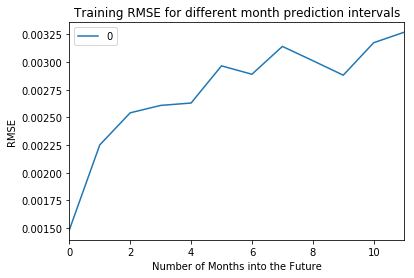

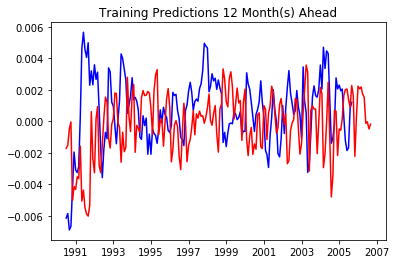

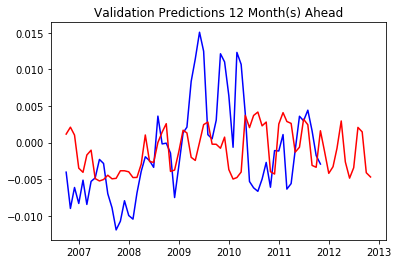

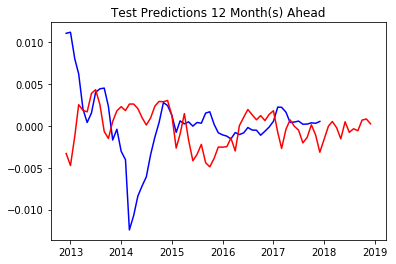

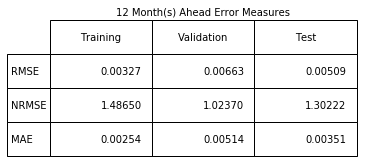

10
ADF Statistic: -2.977440
p-value: 0.037056
ADF Statistic: -4.338925
p-value: 0.000380
hello!!!!!
(193, 21)
(193, 1, 21)
(74, 21)
Epoch 1/100
193/193 [==============================] - 15s 76ms/step - loss: 0.9672
Epoch 2/100
193/193 [==============================] - 0s 27us/step - loss: 0.9911
Epoch 3/100
193/193 [==============================] - 0s 27us/step - loss: 1.0244
Epoch 4/100
193/193 [==============================] - 0s 27us/step - loss: 1.0034
Epoch 5/100
193/193 [==============================] - 0s 27us/step - loss: 1.0137
Epoch 6/100
193/193 [==============================] - 0s 28us/step - loss: 0.9963
Epoch 7/100
193/193 [==============================] - 0s 31us/step - loss: 1.0031
Epoch 8/100
193/193 [==============================] - 0s 29us/step - loss: 0.9844
Epoch 9/100
193/193 [==============================] - 0s 25us/step - loss: 0.9755
Epoch 10/100
193/193 [==============================] - 0s 23us/step - loss: 1.0027
Epoch 11/100
193/193 [==============

Epoch 97/100
193/193 [==============================] - 0s 32us/step - loss: 0.9655
Epoch 98/100
193/193 [==============================] - 0s 25us/step - loss: 0.9823
Epoch 99/100
193/193 [==============================] - 0s 27us/step - loss: 0.9683
Epoch 100/100
193/193 [==============================] - 0s 26us/step - loss: 0.9930
Epoch 1/100
193/193 [==============================] - 15s 78ms/step - loss: 1.1143
Epoch 2/100
193/193 [==============================] - 0s 34us/step - loss: 1.0754
Epoch 3/100
193/193 [==============================] - 0s 29us/step - loss: 1.1309
Epoch 4/100
193/193 [==============================] - 0s 27us/step - loss: 1.0426
Epoch 5/100
193/193 [==============================] - 0s 28us/step - loss: 1.1008
Epoch 6/100
193/193 [==============================] - 0s 27us/step - loss: 1.0496
Epoch 7/100
193/193 [==============================] - 0s 25us/step - loss: 1.0795
Epoch 8/100
193/193 [==============================] - 0s 27us/step - loss: 1.005

193/193 [==============================] - 0s 30us/step - loss: 0.8341
Epoch 95/100
193/193 [==============================] - 0s 31us/step - loss: 0.8448
Epoch 96/100
193/193 [==============================] - 0s 27us/step - loss: 0.7765
Epoch 97/100
193/193 [==============================] - 0s 30us/step - loss: 0.8289
Epoch 98/100
193/193 [==============================] - 0s 29us/step - loss: 0.8543
Epoch 99/100
193/193 [==============================] - 0s 30us/step - loss: 0.7646
Epoch 100/100
193/193 [==============================] - 0s 28us/step - loss: 0.7923
Epoch 1/100
193/193 [==============================] - 16s 83ms/step - loss: 1.2334
Epoch 2/100
193/193 [==============================] - 0s 45us/step - loss: 1.0110
Epoch 3/100
193/193 [==============================] - 0s 27us/step - loss: 0.9819
Epoch 4/100
193/193 [==============================] - 0s 28us/step - loss: 0.8576
Epoch 5/100
193/193 [==============================] - 0s 26us/step - loss: 0.7974
Epoch 6/

Epoch 92/100
193/193 [==============================] - 0s 31us/step - loss: 0.4074
Epoch 93/100
193/193 [==============================] - 0s 33us/step - loss: 0.4194
Epoch 94/100
193/193 [==============================] - 0s 27us/step - loss: 0.3581
Epoch 95/100
193/193 [==============================] - 0s 31us/step - loss: 0.3486
Epoch 96/100
193/193 [==============================] - 0s 33us/step - loss: 0.3490
Epoch 97/100
193/193 [==============================] - 0s 27us/step - loss: 0.3846
Epoch 98/100
193/193 [==============================] - 0s 26us/step - loss: 0.4405
Epoch 99/100
193/193 [==============================] - 0s 27us/step - loss: 0.3946
Epoch 100/100
193/193 [==============================] - 0s 26us/step - loss: 0.4132
Epoch 1/100
193/193 [==============================] - 15s 77ms/step - loss: 1.1836
Epoch 2/100
193/193 [==============================] - 0s 39us/step - loss: 1.1566
Epoch 3/100
193/193 [==============================] - 0s 27us/step - loss: 

Epoch 90/100
193/193 [==============================] - 0s 26us/step - loss: 0.5865
Epoch 91/100
193/193 [==============================] - 0s 30us/step - loss: 0.4016
Epoch 92/100
193/193 [==============================] - 0s 27us/step - loss: 0.4064
Epoch 93/100
193/193 [==============================] - 0s 28us/step - loss: 0.3916
Epoch 94/100
193/193 [==============================] - 0s 29us/step - loss: 0.4645
Epoch 95/100
193/193 [==============================] - 0s 30us/step - loss: 0.4063
Epoch 96/100
193/193 [==============================] - 0s 28us/step - loss: 0.4386
Epoch 97/100
193/193 [==============================] - 0s 33us/step - loss: 0.4714
Epoch 98/100
193/193 [==============================] - 0s 28us/step - loss: 0.4515
Epoch 99/100
193/193 [==============================] - 0s 29us/step - loss: 0.4770
Epoch 100/100
193/193 [==============================] - 0s 30us/step - loss: 0.5385
Epoch 1/100
193/193 [==============================] - 15s 77ms/step - loss

Epoch 88/100
193/193 [==============================] - 0s 33us/step - loss: 0.8922
Epoch 89/100
193/193 [==============================] - 0s 28us/step - loss: 0.9741
Epoch 90/100
193/193 [==============================] - 0s 33us/step - loss: 0.9930
Epoch 91/100
193/193 [==============================] - 0s 30us/step - loss: 0.9662
Epoch 92/100
193/193 [==============================] - 0s 30us/step - loss: 0.9337
Epoch 93/100
193/193 [==============================] - 0s 30us/step - loss: 0.9881
Epoch 94/100
193/193 [==============================] - 0s 29us/step - loss: 0.9368
Epoch 95/100
193/193 [==============================] - 0s 29us/step - loss: 0.9560
Epoch 96/100
193/193 [==============================] - 0s 33us/step - loss: 0.9170
Epoch 97/100
193/193 [==============================] - 0s 29us/step - loss: 0.9050
Epoch 98/100
193/193 [==============================] - 0s 29us/step - loss: 0.9038
Epoch 99/100
193/193 [==============================] - 0s 33us/step - loss:

Epoch 86/100
193/193 [==============================] - 0s 29us/step - loss: 0.7221
Epoch 87/100
193/193 [==============================] - 0s 32us/step - loss: 0.7570
Epoch 88/100
193/193 [==============================] - 0s 28us/step - loss: 0.7469
Epoch 89/100
193/193 [==============================] - 0s 30us/step - loss: 0.7225
Epoch 90/100
193/193 [==============================] - 0s 31us/step - loss: 0.6586
Epoch 91/100
193/193 [==============================] - 0s 28us/step - loss: 0.6765
Epoch 92/100
193/193 [==============================] - 0s 31us/step - loss: 0.7304
Epoch 93/100
193/193 [==============================] - 0s 28us/step - loss: 0.7037
Epoch 94/100
193/193 [==============================] - 0s 31us/step - loss: 0.6642
Epoch 95/100
193/193 [==============================] - 0s 33us/step - loss: 0.7373
Epoch 96/100
193/193 [==============================] - 0s 32us/step - loss: 0.6955
Epoch 97/100
193/193 [==============================] - 0s 37us/step - loss:

Epoch 84/100
193/193 [==============================] - 0s 32us/step - loss: 0.3265
Epoch 85/100
193/193 [==============================] - 0s 29us/step - loss: 0.2862
Epoch 86/100
193/193 [==============================] - 0s 35us/step - loss: 0.3569
Epoch 87/100
193/193 [==============================] - 0s 31us/step - loss: 0.3324
Epoch 88/100
193/193 [==============================] - 0s 30us/step - loss: 0.2910
Epoch 89/100
193/193 [==============================] - 0s 29us/step - loss: 0.2525
Epoch 90/100
193/193 [==============================] - 0s 30us/step - loss: 0.3028
Epoch 91/100
193/193 [==============================] - 0s 30us/step - loss: 0.3000
Epoch 92/100
193/193 [==============================] - 0s 32us/step - loss: 0.3731
Epoch 93/100
193/193 [==============================] - 0s 27us/step - loss: 0.3082
Epoch 94/100
193/193 [==============================] - 0s 31us/step - loss: 0.3323
Epoch 95/100
193/193 [==============================] - 0s 31us/step - loss:

Epoch 82/100
193/193 [==============================] - 0s 33us/step - loss: 0.3235
Epoch 83/100
193/193 [==============================] - 0s 33us/step - loss: 0.2901
Epoch 84/100
193/193 [==============================] - 0s 31us/step - loss: 0.3626
Epoch 85/100
193/193 [==============================] - 0s 29us/step - loss: 0.3355
Epoch 86/100
193/193 [==============================] - 0s 31us/step - loss: 0.2410
Epoch 87/100
193/193 [==============================] - 0s 28us/step - loss: 0.3966
Epoch 88/100
193/193 [==============================] - 0s 26us/step - loss: 0.3602
Epoch 89/100
193/193 [==============================] - 0s 30us/step - loss: 0.2924
Epoch 90/100
193/193 [==============================] - 0s 29us/step - loss: 0.3427
Epoch 91/100
193/193 [==============================] - 0s 29us/step - loss: 0.2422
Epoch 92/100
193/193 [==============================] - 0s 31us/step - loss: 0.2861
Epoch 93/100
193/193 [==============================] - 0s 29us/step - loss:

Epoch 80/100
193/193 [==============================] - 0s 29us/step - loss: 1.0907
Epoch 81/100
193/193 [==============================] - 0s 25us/step - loss: 1.0802
Epoch 82/100
193/193 [==============================] - 0s 25us/step - loss: 1.0758
Epoch 83/100
193/193 [==============================] - 0s 28us/step - loss: 1.1050
Epoch 84/100
193/193 [==============================] - 0s 28us/step - loss: 1.0651
Epoch 85/100
193/193 [==============================] - 0s 29us/step - loss: 1.0380
Epoch 86/100
193/193 [==============================] - 0s 29us/step - loss: 1.1013
Epoch 87/100
193/193 [==============================] - 0s 29us/step - loss: 1.0869
Epoch 88/100
193/193 [==============================] - 0s 26us/step - loss: 1.0770
Epoch 89/100
193/193 [==============================] - 0s 27us/step - loss: 1.1349
Epoch 90/100
193/193 [==============================] - 0s 29us/step - loss: 1.0708
Epoch 91/100
193/193 [==============================] - 0s 28us/step - loss:

Epoch 78/100
193/193 [==============================] - 0s 28us/step - loss: 0.5822
Epoch 79/100
193/193 [==============================] - 0s 32us/step - loss: 0.5198
Epoch 80/100
193/193 [==============================] - 0s 30us/step - loss: 0.5318
Epoch 81/100
193/193 [==============================] - 0s 28us/step - loss: 0.5503
Epoch 82/100
193/193 [==============================] - 0s 30us/step - loss: 0.5704
Epoch 83/100
193/193 [==============================] - 0s 31us/step - loss: 0.4964
Epoch 84/100
193/193 [==============================] - 0s 28us/step - loss: 0.4892
Epoch 85/100
193/193 [==============================] - 0s 28us/step - loss: 0.5211
Epoch 86/100
193/193 [==============================] - 0s 28us/step - loss: 0.5130
Epoch 87/100
193/193 [==============================] - 0s 30us/step - loss: 0.5153
Epoch 88/100
193/193 [==============================] - 0s 30us/step - loss: 0.5099
Epoch 89/100
193/193 [==============================] - 0s 32us/step - loss:

Epoch 76/100
193/193 [==============================] - 0s 36us/step - loss: 0.2219
Epoch 77/100
193/193 [==============================] - 0s 40us/step - loss: 0.2490
Epoch 78/100
193/193 [==============================] - 0s 32us/step - loss: 0.2469
Epoch 79/100
193/193 [==============================] - 0s 37us/step - loss: 0.2237
Epoch 80/100
193/193 [==============================] - 0s 38us/step - loss: 0.2251
Epoch 81/100
193/193 [==============================] - 0s 30us/step - loss: 0.1918
Epoch 82/100
193/193 [==============================] - 0s 34us/step - loss: 0.2423
Epoch 83/100
193/193 [==============================] - 0s 31us/step - loss: 0.2736
Epoch 84/100
193/193 [==============================] - 0s 34us/step - loss: 0.2596
Epoch 85/100
193/193 [==============================] - 0s 32us/step - loss: 0.2530
Epoch 86/100
193/193 [==============================] - 0s 33us/step - loss: 0.2634
Epoch 87/100
193/193 [==============================] - 0s 35us/step - loss:

Epoch 74/100
193/193 [==============================] - 0s 31us/step - loss: 0.2968
Epoch 75/100
193/193 [==============================] - 0s 33us/step - loss: 0.2678
Epoch 76/100
193/193 [==============================] - 0s 33us/step - loss: 0.2394
Epoch 77/100
193/193 [==============================] - 0s 31us/step - loss: 0.3030
Epoch 78/100
193/193 [==============================] - 0s 33us/step - loss: 0.2595
Epoch 79/100
193/193 [==============================] - 0s 37us/step - loss: 0.2732
Epoch 80/100
193/193 [==============================] - 0s 27us/step - loss: 0.2703
Epoch 81/100
193/193 [==============================] - 0s 31us/step - loss: 0.2675
Epoch 82/100
193/193 [==============================] - 0s 31us/step - loss: 0.3595
Epoch 83/100
193/193 [==============================] - 0s 32us/step - loss: 0.2548
Epoch 84/100
193/193 [==============================] - 0s 34us/step - loss: 0.3572
Epoch 85/100
193/193 [==============================] - 0s 31us/step - loss:

Epoch 72/100
193/193 [==============================] - 0s 30us/step - loss: 0.9882
Epoch 73/100
193/193 [==============================] - 0s 37us/step - loss: 1.0440
Epoch 74/100
193/193 [==============================] - 0s 29us/step - loss: 1.0463
Epoch 75/100
193/193 [==============================] - 0s 35us/step - loss: 1.0228
Epoch 76/100
193/193 [==============================] - 0s 34us/step - loss: 0.9997
Epoch 77/100
193/193 [==============================] - 0s 29us/step - loss: 0.9455
Epoch 78/100
193/193 [==============================] - 0s 33us/step - loss: 1.0082
Epoch 79/100
193/193 [==============================] - 0s 30us/step - loss: 0.9956
Epoch 80/100
193/193 [==============================] - 0s 29us/step - loss: 1.0478
Epoch 81/100
193/193 [==============================] - 0s 30us/step - loss: 1.0113
Epoch 82/100
193/193 [==============================] - 0s 32us/step - loss: 0.9713
Epoch 83/100
193/193 [==============================] - 0s 32us/step - loss:

Epoch 70/100
193/193 [==============================] - 0s 34us/step - loss: 0.4748
Epoch 71/100
193/193 [==============================] - 0s 29us/step - loss: 0.5133
Epoch 72/100
193/193 [==============================] - 0s 32us/step - loss: 0.4967
Epoch 73/100
193/193 [==============================] - 0s 35us/step - loss: 0.4488
Epoch 74/100
193/193 [==============================] - 0s 33us/step - loss: 0.4725
Epoch 75/100
193/193 [==============================] - 0s 34us/step - loss: 0.5141
Epoch 76/100
193/193 [==============================] - 0s 34us/step - loss: 0.4671
Epoch 77/100
193/193 [==============================] - 0s 34us/step - loss: 0.4820
Epoch 78/100
193/193 [==============================] - 0s 31us/step - loss: 0.4436
Epoch 79/100
193/193 [==============================] - 0s 34us/step - loss: 0.4178
Epoch 80/100
193/193 [==============================] - 0s 34us/step - loss: 0.4190
Epoch 81/100
193/193 [==============================] - 0s 30us/step - loss:

Epoch 68/100
193/193 [==============================] - 0s 29us/step - loss: 0.1877
Epoch 69/100
193/193 [==============================] - 0s 33us/step - loss: 0.1951
Epoch 70/100
193/193 [==============================] - 0s 29us/step - loss: 0.1984
Epoch 71/100
193/193 [==============================] - 0s 33us/step - loss: 0.2325
Epoch 72/100
193/193 [==============================] - 0s 31us/step - loss: 0.1951
Epoch 73/100
193/193 [==============================] - 0s 32us/step - loss: 0.2197
Epoch 74/100
193/193 [==============================] - 0s 33us/step - loss: 0.1841
Epoch 75/100
193/193 [==============================] - 0s 33us/step - loss: 0.1993
Epoch 76/100
193/193 [==============================] - 0s 31us/step - loss: 0.2041
Epoch 77/100
193/193 [==============================] - 0s 35us/step - loss: 0.1850
Epoch 78/100
193/193 [==============================] - 0s 28us/step - loss: 0.1892
Epoch 79/100
193/193 [==============================] - 0s 30us/step - loss:

Epoch 66/100
193/193 [==============================] - 0s 34us/step - loss: 0.2763
Epoch 67/100
193/193 [==============================] - 0s 38us/step - loss: 0.2461
Epoch 68/100
193/193 [==============================] - 0s 35us/step - loss: 0.2631
Epoch 69/100
193/193 [==============================] - 0s 37us/step - loss: 0.4298
Epoch 70/100
193/193 [==============================] - 0s 32us/step - loss: 0.1764
Epoch 71/100
193/193 [==============================] - 0s 34us/step - loss: 0.2361
Epoch 72/100
193/193 [==============================] - 0s 33us/step - loss: 0.2659
Epoch 73/100
193/193 [==============================] - 0s 37us/step - loss: 0.2710
Epoch 74/100
193/193 [==============================] - 0s 36us/step - loss: 0.2827
Epoch 75/100
193/193 [==============================] - 0s 33us/step - loss: 0.3207
Epoch 76/100
193/193 [==============================] - 0s 26us/step - loss: 0.2347
Epoch 77/100
193/193 [==============================] - 0s 27us/step - loss:

Epoch 64/100
193/193 [==============================] - 0s 42us/step - loss: 0.8331
Epoch 65/100
193/193 [==============================] - 0s 41us/step - loss: 0.7877
Epoch 66/100
193/193 [==============================] - 0s 43us/step - loss: 0.8206
Epoch 67/100
193/193 [==============================] - 0s 43us/step - loss: 0.8178
Epoch 68/100
193/193 [==============================] - 0s 38us/step - loss: 0.8325
Epoch 69/100
193/193 [==============================] - 0s 40us/step - loss: 0.8414
Epoch 70/100
193/193 [==============================] - 0s 39us/step - loss: 0.8396
Epoch 71/100
193/193 [==============================] - 0s 36us/step - loss: 0.8332
Epoch 72/100
193/193 [==============================] - 0s 37us/step - loss: 0.8263
Epoch 73/100
193/193 [==============================] - 0s 41us/step - loss: 0.7847
Epoch 74/100
193/193 [==============================] - 0s 38us/step - loss: 0.8197
Epoch 75/100
193/193 [==============================] - 0s 37us/step - loss:

Epoch 62/100
193/193 [==============================] - 0s 36us/step - loss: 0.3564
Epoch 63/100
193/193 [==============================] - 0s 35us/step - loss: 0.3563
Epoch 64/100
193/193 [==============================] - 0s 37us/step - loss: 0.3734
Epoch 65/100
193/193 [==============================] - 0s 38us/step - loss: 0.3529
Epoch 66/100
193/193 [==============================] - 0s 38us/step - loss: 0.3421
Epoch 67/100
193/193 [==============================] - 0s 41us/step - loss: 0.3494
Epoch 68/100
193/193 [==============================] - 0s 43us/step - loss: 0.3447
Epoch 69/100
193/193 [==============================] - 0s 39us/step - loss: 0.3294
Epoch 70/100
193/193 [==============================] - 0s 37us/step - loss: 0.3532
Epoch 71/100
193/193 [==============================] - 0s 43us/step - loss: 0.3340
Epoch 72/100
193/193 [==============================] - 0s 42us/step - loss: 0.3596
Epoch 73/100
193/193 [==============================] - 0s 40us/step - loss:

Epoch 60/100
193/193 [==============================] - 0s 39us/step - loss: 0.1731
Epoch 61/100
193/193 [==============================] - 0s 43us/step - loss: 0.1968
Epoch 62/100
193/193 [==============================] - 0s 42us/step - loss: 0.1690
Epoch 63/100
193/193 [==============================] - 0s 40us/step - loss: 0.1749
Epoch 64/100
193/193 [==============================] - 0s 37us/step - loss: 0.1651
Epoch 65/100
193/193 [==============================] - 0s 38us/step - loss: 0.1575
Epoch 66/100
193/193 [==============================] - 0s 40us/step - loss: 0.1575
Epoch 67/100
193/193 [==============================] - 0s 35us/step - loss: 0.1558
Epoch 68/100
193/193 [==============================] - 0s 35us/step - loss: 0.1653
Epoch 69/100
193/193 [==============================] - 0s 35us/step - loss: 0.1543
Epoch 70/100
193/193 [==============================] - 0s 34us/step - loss: 0.1614
Epoch 71/100
193/193 [==============================] - 0s 37us/step - loss:

Epoch 58/100
193/193 [==============================] - 0s 39us/step - loss: 0.2195
Epoch 59/100
193/193 [==============================] - 0s 41us/step - loss: 0.2047
Epoch 60/100
193/193 [==============================] - 0s 38us/step - loss: 0.3331
Epoch 61/100
193/193 [==============================] - 0s 44us/step - loss: 0.2216
Epoch 62/100
193/193 [==============================] - 0s 43us/step - loss: 0.2754
Epoch 63/100
193/193 [==============================] - 0s 41us/step - loss: 0.2146
Epoch 64/100
193/193 [==============================] - 0s 36us/step - loss: 0.2941
Epoch 65/100
193/193 [==============================] - 0s 34us/step - loss: 0.2661
Epoch 66/100
193/193 [==============================] - 0s 41us/step - loss: 0.3122
Epoch 67/100
193/193 [==============================] - 0s 39us/step - loss: 0.2696
Epoch 68/100
193/193 [==============================] - 0s 45us/step - loss: 0.3841
Epoch 69/100
193/193 [==============================] - 0s 37us/step - loss:

193/193 [==============================] - 1s 5ms/step - loss: 0.2220
Epoch 57/100
193/193 [==============================] - 1s 5ms/step - loss: 0.2532
Epoch 58/100
193/193 [==============================] - 1s 5ms/step - loss: 0.2792
Epoch 59/100
193/193 [==============================] - 1s 5ms/step - loss: 0.2597
Epoch 60/100
193/193 [==============================] - 1s 5ms/step - loss: 0.2750
Epoch 61/100
193/193 [==============================] - 1s 5ms/step - loss: 0.2538
Epoch 62/100
193/193 [==============================] - 1s 5ms/step - loss: 0.2711
Epoch 63/100
193/193 [==============================] - 1s 5ms/step - loss: 0.2447
Epoch 64/100
193/193 [==============================] - 1s 5ms/step - loss: 0.2737
Epoch 65/100
193/193 [==============================] - 1s 5ms/step - loss: 0.2858
Epoch 66/100
193/193 [==============================] - 1s 5ms/step - loss: 0.2258
Epoch 67/100
193/193 [==============================] - 1s 5ms/step - loss: 0.2263
Epoch 68/100
193/

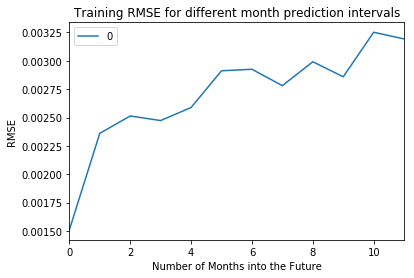

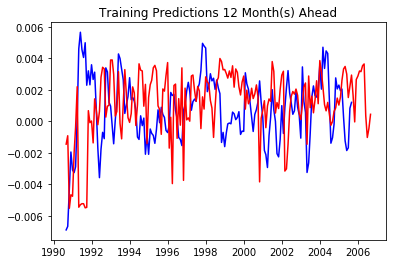

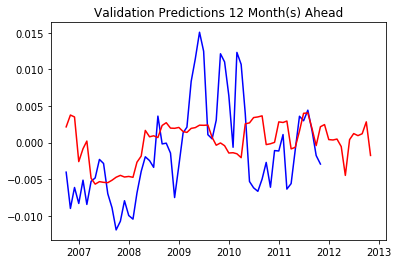

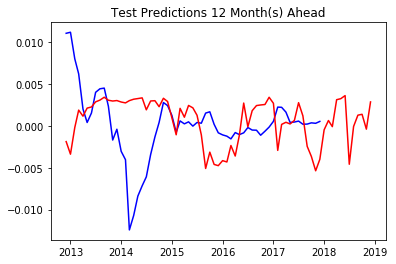

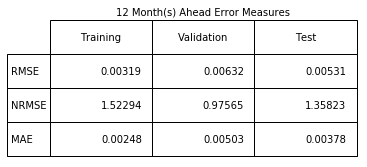

11
ADF Statistic: -2.977440
p-value: 0.037056
ADF Statistic: -4.215328
p-value: 0.000621
hello!!!!!
(191, 23)
(191, 1, 23)
(74, 23)
Epoch 1/100
191/191 [==============================] - 17s 88ms/step - loss: 1.1532
Epoch 2/100
191/191 [==============================] - 0s 30us/step - loss: 1.1529
Epoch 3/100
191/191 [==============================] - 0s 28us/step - loss: 1.1104
Epoch 4/100
191/191 [==============================] - 0s 29us/step - loss: 1.1422
Epoch 5/100
191/191 [==============================] - 0s 28us/step - loss: 1.1069
Epoch 6/100
191/191 [==============================] - 0s 30us/step - loss: 1.0747
Epoch 7/100
191/191 [==============================] - 0s 29us/step - loss: 1.1417
Epoch 8/100
191/191 [==============================] - 0s 30us/step - loss: 1.1093
Epoch 9/100
191/191 [==============================] - 0s 28us/step - loss: 1.1167
Epoch 10/100
191/191 [==============================] - 0s 30us/step - loss: 1.1992
Epoch 11/100
191/191 [==============

191/191 [==============================] - 0s 30us/step - loss: 1.1338
Epoch 98/100
191/191 [==============================] - 0s 36us/step - loss: 1.1077
Epoch 99/100
191/191 [==============================] - 0s 32us/step - loss: 1.1056
Epoch 100/100
191/191 [==============================] - 0s 34us/step - loss: 1.0847
Epoch 1/100
191/191 [==============================] - 17s 88ms/step - loss: 1.1029
Epoch 2/100
191/191 [==============================] - 0s 29us/step - loss: 1.0371
Epoch 3/100
191/191 [==============================] - 0s 31us/step - loss: 1.0302
Epoch 4/100
191/191 [==============================] - 0s 29us/step - loss: 0.9643
Epoch 5/100
191/191 [==============================] - 0s 29us/step - loss: 0.9523
Epoch 6/100
191/191 [==============================] - 0s 30us/step - loss: 0.9958
Epoch 7/100
191/191 [==============================] - 0s 28us/step - loss: 0.9836
Epoch 8/100
191/191 [==============================] - 0s 29us/step - loss: 0.9773
Epoch 9/100

Epoch 95/100
191/191 [==============================] - 0s 28us/step - loss: 0.6605
Epoch 96/100
191/191 [==============================] - 0s 28us/step - loss: 0.7341
Epoch 97/100
191/191 [==============================] - 0s 31us/step - loss: 0.7641
Epoch 98/100
191/191 [==============================] - 0s 32us/step - loss: 0.7544
Epoch 99/100
191/191 [==============================] - 0s 31us/step - loss: 0.6446
Epoch 100/100
191/191 [==============================] - 0s 33us/step - loss: 0.6404
Epoch 1/100
191/191 [==============================] - 88s 462ms/step - loss: 0.9726
Epoch 2/100
191/191 [==============================] - 0s 241us/step - loss: 0.8700
Epoch 3/100
191/191 [==============================] - 0s 42us/step - loss: 0.8867
Epoch 4/100
191/191 [==============================] - 0s 43us/step - loss: 0.8328
Epoch 5/100
191/191 [==============================] - 0s 41us/step - loss: 0.7923
Epoch 6/100
191/191 [==============================] - 0s 53us/step - loss: 0

Epoch 93/100
191/191 [==============================] - 0s 33us/step - loss: 0.3780
Epoch 94/100
191/191 [==============================] - 0s 29us/step - loss: 0.3597
Epoch 95/100
191/191 [==============================] - 0s 30us/step - loss: 0.4602
Epoch 96/100
191/191 [==============================] - 0s 39us/step - loss: 0.3954
Epoch 97/100
191/191 [==============================] - 0s 31us/step - loss: 0.4062
Epoch 98/100
191/191 [==============================] - 0s 43us/step - loss: 0.4142
Epoch 99/100
191/191 [==============================] - 0s 38us/step - loss: 0.4186
Epoch 100/100
191/191 [==============================] - 0s 29us/step - loss: 0.4705
Epoch 1/100
191/191 [==============================] - 19s 100ms/step - loss: 1.1436
Epoch 2/100
191/191 [==============================] - 0s 52us/step - loss: 1.0076
Epoch 3/100
191/191 [==============================] - 0s 39us/step - loss: 0.9117
Epoch 4/100
191/191 [==============================] - 0s 48us/step - loss: 

Epoch 91/100
191/191 [==============================] - 0s 42us/step - loss: 0.5275
Epoch 92/100
191/191 [==============================] - 0s 36us/step - loss: 0.5002
Epoch 93/100
191/191 [==============================] - 0s 35us/step - loss: 0.4412
Epoch 94/100
191/191 [==============================] - 0s 47us/step - loss: 0.6140
Epoch 95/100
191/191 [==============================] - 0s 36us/step - loss: 0.5101
Epoch 96/100
191/191 [==============================] - 0s 48us/step - loss: 0.5246
Epoch 97/100
191/191 [==============================] - 0s 33us/step - loss: 0.5761
Epoch 98/100
191/191 [==============================] - 0s 38us/step - loss: 0.4883
Epoch 99/100
191/191 [==============================] - 0s 48us/step - loss: 0.5450
Epoch 100/100
191/191 [==============================] - 0s 48us/step - loss: 0.6408
Epoch 1/100
191/191 [==============================] - 19s 98ms/step - loss: 1.2063
Epoch 2/100
191/191 [==============================] - 0s 52us/step - loss:

Epoch 89/100
191/191 [==============================] - 0s 36us/step - loss: 1.1003
Epoch 90/100
191/191 [==============================] - 0s 50us/step - loss: 1.0715
Epoch 91/100
191/191 [==============================] - 0s 43us/step - loss: 1.1009
Epoch 92/100
191/191 [==============================] - 0s 37us/step - loss: 1.1108
Epoch 93/100
191/191 [==============================] - 0s 41us/step - loss: 1.0734
Epoch 94/100
191/191 [==============================] - 0s 39us/step - loss: 1.1334
Epoch 95/100
191/191 [==============================] - 0s 32us/step - loss: 1.1582
Epoch 96/100
191/191 [==============================] - 0s 40us/step - loss: 1.0841
Epoch 97/100
191/191 [==============================] - 0s 41us/step - loss: 1.0362
Epoch 98/100
191/191 [==============================] - 0s 34us/step - loss: 1.1098
Epoch 99/100
191/191 [==============================] - 0s 40us/step - loss: 1.0733
Epoch 100/100
191/191 [==============================] - 0s 51us/step - loss

191/191 [==============================] - 0s 28us/step - loss: 0.6779
Epoch 87/100
191/191 [==============================] - 0s 42us/step - loss: 0.6516
Epoch 88/100
191/191 [==============================] - 0s 36us/step - loss: 0.5549
Epoch 89/100
191/191 [==============================] - 0s 32us/step - loss: 0.6355
Epoch 90/100
191/191 [==============================] - 0s 28us/step - loss: 0.6190
Epoch 91/100
191/191 [==============================] - 0s 30us/step - loss: 0.6164
Epoch 92/100
191/191 [==============================] - 0s 29us/step - loss: 0.5835
Epoch 93/100
191/191 [==============================] - 0s 32us/step - loss: 0.5956
Epoch 94/100
191/191 [==============================] - 0s 43us/step - loss: 0.5970
Epoch 95/100
191/191 [==============================] - 0s 30us/step - loss: 0.6998
Epoch 96/100
191/191 [==============================] - 0s 41us/step - loss: 0.6036
Epoch 97/100
191/191 [==============================] - 0s 30us/step - loss: 0.5308
Epoch

Epoch 84/100
191/191 [==============================] - 0s 28us/step - loss: 0.2574
Epoch 85/100
191/191 [==============================] - 0s 28us/step - loss: 0.2953
Epoch 86/100
191/191 [==============================] - 0s 39us/step - loss: 0.2838
Epoch 87/100
191/191 [==============================] - 0s 33us/step - loss: 0.3276
Epoch 88/100
191/191 [==============================] - 0s 28us/step - loss: 0.2994
Epoch 89/100
191/191 [==============================] - 0s 29us/step - loss: 0.2907
Epoch 90/100
191/191 [==============================] - 0s 29us/step - loss: 0.2697
Epoch 91/100
191/191 [==============================] - 0s 32us/step - loss: 0.3073
Epoch 92/100
191/191 [==============================] - 0s 38us/step - loss: 0.2592
Epoch 93/100
191/191 [==============================] - 0s 33us/step - loss: 0.3218
Epoch 94/100
191/191 [==============================] - 0s 39us/step - loss: 0.3357
Epoch 95/100
191/191 [==============================] - 0s 34us/step - loss:

Epoch 82/100
191/191 [==============================] - 0s 41us/step - loss: 0.2896
Epoch 83/100
191/191 [==============================] - 0s 34us/step - loss: 0.2786
Epoch 84/100
191/191 [==============================] - 0s 26us/step - loss: 0.3069
Epoch 85/100
191/191 [==============================] - 0s 28us/step - loss: 0.4146
Epoch 86/100
191/191 [==============================] - 0s 60us/step - loss: 0.4360
Epoch 87/100
191/191 [==============================] - 0s 33us/step - loss: 0.4038
Epoch 88/100
191/191 [==============================] - 0s 32us/step - loss: 0.3201
Epoch 89/100
191/191 [==============================] - 0s 30us/step - loss: 0.3437
Epoch 90/100
191/191 [==============================] - 0s 44us/step - loss: 0.3088
Epoch 91/100
191/191 [==============================] - 0s 39us/step - loss: 0.3648
Epoch 92/100
191/191 [==============================] - 0s 41us/step - loss: 0.3019
Epoch 93/100
191/191 [==============================] - 0s 45us/step - loss:

Epoch 80/100
191/191 [==============================] - 0s 29us/step - loss: 1.0410
Epoch 81/100
191/191 [==============================] - 0s 31us/step - loss: 1.0529
Epoch 82/100
191/191 [==============================] - 0s 49us/step - loss: 1.0137
Epoch 83/100
191/191 [==============================] - 0s 36us/step - loss: 1.0580
Epoch 84/100
191/191 [==============================] - 0s 32us/step - loss: 1.0125
Epoch 85/100
191/191 [==============================] - 0s 30us/step - loss: 1.0409
Epoch 86/100
191/191 [==============================] - 0s 30us/step - loss: 1.0232
Epoch 87/100
191/191 [==============================] - 0s 32us/step - loss: 1.0330
Epoch 88/100
191/191 [==============================] - 0s 28us/step - loss: 1.0355
Epoch 89/100
191/191 [==============================] - 0s 38us/step - loss: 1.0059
Epoch 90/100
191/191 [==============================] - 0s 33us/step - loss: 1.0563
Epoch 91/100
191/191 [==============================] - 0s 65us/step - loss:

191/191 [==============================] - 0s 45us/step - loss: 0.4988
Epoch 78/100
191/191 [==============================] - 0s 35us/step - loss: 0.5267
Epoch 79/100
191/191 [==============================] - 0s 30us/step - loss: 0.4949
Epoch 80/100
191/191 [==============================] - 0s 38us/step - loss: 0.4830
Epoch 81/100
191/191 [==============================] - 0s 31us/step - loss: 0.5828
Epoch 82/100
191/191 [==============================] - 0s 40us/step - loss: 0.5198
Epoch 83/100
191/191 [==============================] - 0s 46us/step - loss: 0.5260
Epoch 84/100
191/191 [==============================] - 0s 32us/step - loss: 0.5001
Epoch 85/100
191/191 [==============================] - 0s 40us/step - loss: 0.4498
Epoch 86/100
191/191 [==============================] - 0s 32us/step - loss: 0.5019
Epoch 87/100
191/191 [==============================] - 0s 58us/step - loss: 0.4909
Epoch 88/100
191/191 [==============================] - 0s 48us/step - loss: 0.5067
Epoch

Epoch 75/100
191/191 [==============================] - 0s 41us/step - loss: 0.2186
Epoch 76/100
191/191 [==============================] - 0s 42us/step - loss: 0.2127
Epoch 77/100
191/191 [==============================] - 0s 30us/step - loss: 0.2567
Epoch 78/100
191/191 [==============================] - 0s 34us/step - loss: 0.2061
Epoch 79/100
191/191 [==============================] - 0s 40us/step - loss: 0.2521
Epoch 80/100
191/191 [==============================] - 0s 54us/step - loss: 0.2098
Epoch 81/100
191/191 [==============================] - 0s 49us/step - loss: 0.2133
Epoch 82/100
191/191 [==============================] - 0s 44us/step - loss: 0.2330
Epoch 83/100
191/191 [==============================] - 0s 53us/step - loss: 0.1940
Epoch 84/100
191/191 [==============================] - 0s 39us/step - loss: 0.2014
Epoch 85/100
191/191 [==============================] - 0s 44us/step - loss: 0.2272
Epoch 86/100
191/191 [==============================] - 0s 40us/step - loss:

Epoch 73/100
191/191 [==============================] - 0s 29us/step - loss: 0.3159
Epoch 74/100
191/191 [==============================] - 0s 38us/step - loss: 0.3800
Epoch 75/100
191/191 [==============================] - 0s 28us/step - loss: 0.3155
Epoch 76/100
191/191 [==============================] - 0s 28us/step - loss: 0.3652
Epoch 77/100
191/191 [==============================] - 0s 28us/step - loss: 0.2051
Epoch 78/100
191/191 [==============================] - 0s 32us/step - loss: 0.1942
Epoch 79/100
191/191 [==============================] - 0s 29us/step - loss: 0.2464
Epoch 80/100
191/191 [==============================] - 0s 29us/step - loss: 0.2505
Epoch 81/100
191/191 [==============================] - 0s 31us/step - loss: 0.2779
Epoch 82/100
191/191 [==============================] - 0s 43us/step - loss: 0.2758
Epoch 83/100
191/191 [==============================] - 0s 26us/step - loss: 0.2961
Epoch 84/100
191/191 [==============================] - 0s 34us/step - loss:

Epoch 71/100
191/191 [==============================] - 0s 43us/step - loss: 0.9029
Epoch 72/100
191/191 [==============================] - 0s 37us/step - loss: 0.9085
Epoch 73/100
191/191 [==============================] - 0s 39us/step - loss: 0.9192
Epoch 74/100
191/191 [==============================] - 0s 42us/step - loss: 0.8986
Epoch 75/100
191/191 [==============================] - 0s 33us/step - loss: 0.8743
Epoch 76/100
191/191 [==============================] - 0s 37us/step - loss: 0.9116
Epoch 77/100
191/191 [==============================] - 0s 37us/step - loss: 0.8618
Epoch 78/100
191/191 [==============================] - 0s 32us/step - loss: 0.8693
Epoch 79/100
191/191 [==============================] - 0s 34us/step - loss: 0.9040
Epoch 80/100
191/191 [==============================] - 0s 38us/step - loss: 0.9102
Epoch 81/100
191/191 [==============================] - 0s 33us/step - loss: 0.8595
Epoch 82/100
191/191 [==============================] - 0s 43us/step - loss:

Epoch 69/100
191/191 [==============================] - 0s 33us/step - loss: 0.3995
Epoch 70/100
191/191 [==============================] - 0s 34us/step - loss: 0.4510
Epoch 71/100
191/191 [==============================] - 0s 34us/step - loss: 0.4060
Epoch 72/100
191/191 [==============================] - 0s 35us/step - loss: 0.4884
Epoch 73/100
191/191 [==============================] - 0s 34us/step - loss: 0.4061
Epoch 74/100
191/191 [==============================] - 0s 34us/step - loss: 0.3920
Epoch 75/100
191/191 [==============================] - 0s 36us/step - loss: 0.3896
Epoch 76/100
191/191 [==============================] - 0s 33us/step - loss: 0.4279
Epoch 77/100
191/191 [==============================] - 0s 33us/step - loss: 0.4194
Epoch 78/100
191/191 [==============================] - 0s 36us/step - loss: 0.3668
Epoch 79/100
191/191 [==============================] - 0s 32us/step - loss: 0.3989
Epoch 80/100
191/191 [==============================] - 0s 34us/step - loss:

Epoch 67/100
191/191 [==============================] - 0s 39us/step - loss: 0.1763
Epoch 68/100
191/191 [==============================] - 0s 32us/step - loss: 0.1773
Epoch 69/100
191/191 [==============================] - 0s 34us/step - loss: 0.2122
Epoch 70/100
191/191 [==============================] - 0s 33us/step - loss: 0.1536
Epoch 71/100
191/191 [==============================] - 0s 33us/step - loss: 0.1627
Epoch 72/100
191/191 [==============================] - 0s 28us/step - loss: 0.1585
Epoch 73/100
191/191 [==============================] - 0s 31us/step - loss: 0.2132
Epoch 74/100
191/191 [==============================] - 0s 33us/step - loss: 0.1599
Epoch 75/100
191/191 [==============================] - 0s 39us/step - loss: 0.1849
Epoch 76/100
191/191 [==============================] - 0s 35us/step - loss: 0.1759
Epoch 77/100
191/191 [==============================] - 0s 36us/step - loss: 0.1673
Epoch 78/100
191/191 [==============================] - 0s 52us/step - loss:

Epoch 65/100
191/191 [==============================] - 0s 39us/step - loss: 0.1893
Epoch 66/100
191/191 [==============================] - 0s 31us/step - loss: 0.3782
Epoch 67/100
191/191 [==============================] - 0s 32us/step - loss: 0.3071
Epoch 68/100
191/191 [==============================] - 0s 36us/step - loss: 0.3836
Epoch 69/100
191/191 [==============================] - 0s 38us/step - loss: 0.2523
Epoch 70/100
191/191 [==============================] - 0s 30us/step - loss: 0.2075
Epoch 71/100
191/191 [==============================] - 0s 38us/step - loss: 0.2447
Epoch 72/100
191/191 [==============================] - 0s 36us/step - loss: 0.2641
Epoch 73/100
191/191 [==============================] - 0s 32us/step - loss: 0.2216
Epoch 74/100
191/191 [==============================] - 0s 38us/step - loss: 0.2195
Epoch 75/100
191/191 [==============================] - 0s 33us/step - loss: 0.2072
Epoch 76/100
191/191 [==============================] - 0s 39us/step - loss:

Epoch 63/100
191/191 [==============================] - 0s 77us/step - loss: 0.9708
Epoch 64/100
191/191 [==============================] - 0s 75us/step - loss: 0.9654
Epoch 65/100
191/191 [==============================] - 0s 46us/step - loss: 0.9573
Epoch 66/100
191/191 [==============================] - 0s 39us/step - loss: 0.9405
Epoch 67/100
191/191 [==============================] - 0s 44us/step - loss: 0.9457
Epoch 68/100
191/191 [==============================] - 0s 50us/step - loss: 0.9367
Epoch 69/100
191/191 [==============================] - 0s 44us/step - loss: 0.9244
Epoch 70/100
191/191 [==============================] - 0s 38us/step - loss: 0.9708
Epoch 71/100
191/191 [==============================] - 0s 48us/step - loss: 0.9330
Epoch 72/100
191/191 [==============================] - 0s 35us/step - loss: 0.9306
Epoch 73/100
191/191 [==============================] - 0s 43us/step - loss: 0.9376
Epoch 74/100
191/191 [==============================] - 0s 43us/step - loss:

Epoch 61/100
191/191 [==============================] - 0s 42us/step - loss: 0.3667
Epoch 62/100
191/191 [==============================] - 0s 41us/step - loss: 0.3564
Epoch 63/100
191/191 [==============================] - 0s 42us/step - loss: 0.3736
Epoch 64/100
191/191 [==============================] - 0s 39us/step - loss: 0.3712
Epoch 65/100
191/191 [==============================] - 0s 39us/step - loss: 0.3763
Epoch 66/100
191/191 [==============================] - 0s 44us/step - loss: 0.3899
Epoch 67/100
191/191 [==============================] - 0s 48us/step - loss: 0.3416
Epoch 68/100
191/191 [==============================] - 0s 40us/step - loss: 0.3531
Epoch 69/100
191/191 [==============================] - 0s 43us/step - loss: 0.3350
Epoch 70/100
191/191 [==============================] - 0s 40us/step - loss: 0.3635
Epoch 71/100
191/191 [==============================] - 0s 46us/step - loss: 0.3239
Epoch 72/100
191/191 [==============================] - 0s 42us/step - loss:

Epoch 59/100
191/191 [==============================] - 0s 42us/step - loss: 0.1716
Epoch 60/100
191/191 [==============================] - 0s 40us/step - loss: 0.1717
Epoch 61/100
191/191 [==============================] - 0s 39us/step - loss: 0.1868
Epoch 62/100
191/191 [==============================] - 0s 51us/step - loss: 0.1473
Epoch 63/100
191/191 [==============================] - 0s 57us/step - loss: 0.1866
Epoch 64/100
191/191 [==============================] - 0s 56us/step - loss: 0.1636
Epoch 65/100
191/191 [==============================] - 0s 40us/step - loss: 0.1952
Epoch 66/100
191/191 [==============================] - 0s 39us/step - loss: 0.1837
Epoch 67/100
191/191 [==============================] - 0s 42us/step - loss: 0.1530
Epoch 68/100
191/191 [==============================] - 0s 37us/step - loss: 0.1381
Epoch 69/100
191/191 [==============================] - 0s 38us/step - loss: 0.1496
Epoch 70/100
191/191 [==============================] - 0s 48us/step - loss:

Epoch 57/100
191/191 [==============================] - 0s 50us/step - loss: 0.2960
Epoch 58/100
191/191 [==============================] - 0s 42us/step - loss: 0.1549
Epoch 59/100
191/191 [==============================] - 0s 43us/step - loss: 0.2065
Epoch 60/100
191/191 [==============================] - 0s 67us/step - loss: 0.2782
Epoch 61/100
191/191 [==============================] - 0s 55us/step - loss: 0.3058
Epoch 62/100
191/191 [==============================] - 0s 55us/step - loss: 0.2909
Epoch 63/100
191/191 [==============================] - 0s 49us/step - loss: 0.3075
Epoch 64/100
191/191 [==============================] - 0s 48us/step - loss: 0.2157
Epoch 65/100
191/191 [==============================] - 0s 57us/step - loss: 0.2454
Epoch 66/100
191/191 [==============================] - 0s 51us/step - loss: 0.2354
Epoch 67/100
191/191 [==============================] - 0s 56us/step - loss: 0.2915
Epoch 68/100
191/191 [==============================] - 0s 81us/step - loss:

191/191 [==============================] - 2s 8ms/step - loss: 0.2825
Epoch 55/100
191/191 [==============================] - 1s 7ms/step - loss: 0.2993
Epoch 56/100
191/191 [==============================] - 2s 9ms/step - loss: 0.2809
Epoch 57/100
191/191 [==============================] - 2s 8ms/step - loss: 0.2590
Epoch 58/100
191/191 [==============================] - 1s 6ms/step - loss: 0.3195
Epoch 59/100
191/191 [==============================] - 1s 6ms/step - loss: 0.2386
Epoch 60/100
191/191 [==============================] - 1s 6ms/step - loss: 0.2209
Epoch 61/100
191/191 [==============================] - 1s 6ms/step - loss: 0.2726
Epoch 62/100
191/191 [==============================] - 1s 7ms/step - loss: 0.2760
Epoch 63/100
191/191 [==============================] - 1s 6ms/step - loss: 0.2459
Epoch 64/100
191/191 [==============================] - 1s 6ms/step - loss: 0.2823
Epoch 65/100
191/191 [==============================] - 1s 6ms/step - loss: 0.3495
Epoch 66/100
191/

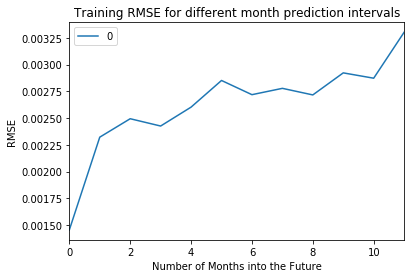

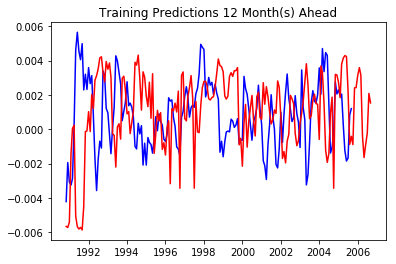

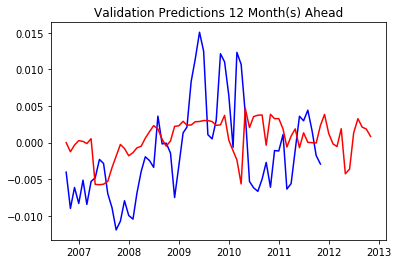

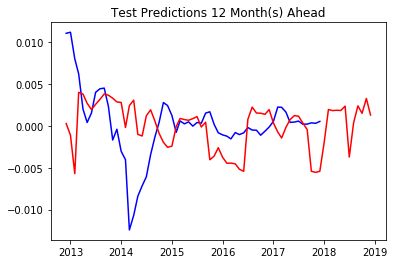

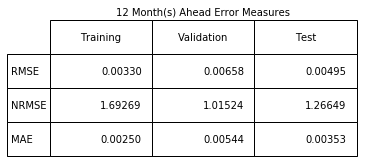

12
ADF Statistic: -2.977440
p-value: 0.037056
ADF Statistic: -4.119283
p-value: 0.000900
hello!!!!!
(189, 25)
(189, 1, 25)
(74, 25)
Epoch 1/100
189/189 [==============================] - 25s 134ms/step - loss: 0.9445
Epoch 2/100
189/189 [==============================] - 0s 46us/step - loss: 0.9247
Epoch 3/100
189/189 [==============================] - 0s 52us/step - loss: 0.9626
Epoch 4/100
189/189 [==============================] - 0s 54us/step - loss: 0.9615
Epoch 5/100
189/189 [==============================] - 0s 41us/step - loss: 0.9720
Epoch 6/100
189/189 [==============================] - 0s 61us/step - loss: 1.0673
Epoch 7/100
189/189 [==============================] - 0s 38us/step - loss: 0.8735
Epoch 8/100
189/189 [==============================] - 0s 46us/step - loss: 1.0165
Epoch 9/100
189/189 [==============================] - 0s 81us/step - loss: 0.9661
Epoch 10/100
189/189 [==============================] - 0s 37us/step - loss: 1.0256
Epoch 11/100
189/189 [=============

Epoch 97/100
189/189 [==============================] - 0s 32us/step - loss: 1.0088
Epoch 98/100
189/189 [==============================] - 0s 40us/step - loss: 0.9337
Epoch 99/100
189/189 [==============================] - 0s 38us/step - loss: 0.9284
Epoch 100/100
189/189 [==============================] - 0s 41us/step - loss: 0.8820
Epoch 1/100
189/189 [==============================] - 22s 115ms/step - loss: 0.9116
Epoch 2/100
189/189 [==============================] - 0s 35us/step - loss: 0.9257
Epoch 3/100
189/189 [==============================] - 0s 33us/step - loss: 0.9276
Epoch 4/100
189/189 [==============================] - 0s 32us/step - loss: 0.8824
Epoch 5/100
189/189 [==============================] - 0s 35us/step - loss: 0.9100
Epoch 6/100
189/189 [==============================] - 0s 38us/step - loss: 0.9571
Epoch 7/100
189/189 [==============================] - 0s 38us/step - loss: 0.8487
Epoch 8/100
189/189 [==============================] - 0s 30us/step - loss: 0.90

Epoch 95/100
189/189 [==============================] - 0s 42us/step - loss: 0.5911
Epoch 96/100
189/189 [==============================] - 0s 36us/step - loss: 0.7336
Epoch 97/100
189/189 [==============================] - 0s 34us/step - loss: 0.6180
Epoch 98/100
189/189 [==============================] - 0s 31us/step - loss: 0.6157
Epoch 99/100
189/189 [==============================] - 0s 35us/step - loss: 0.6453
Epoch 100/100
189/189 [==============================] - 0s 37us/step - loss: 0.6077
Epoch 1/100
189/189 [==============================] - 21s 113ms/step - loss: 1.2384
Epoch 2/100
189/189 [==============================] - 0s 63us/step - loss: 1.0753
Epoch 3/100
189/189 [==============================] - 0s 43us/step - loss: 0.9928
Epoch 4/100
189/189 [==============================] - 0s 36us/step - loss: 0.9269
Epoch 5/100
189/189 [==============================] - 0s 35us/step - loss: 0.8599
Epoch 6/100
189/189 [==============================] - 0s 40us/step - loss: 0.

Epoch 93/100
189/189 [==============================] - 0s 49us/step - loss: 0.3618
Epoch 94/100
189/189 [==============================] - 0s 42us/step - loss: 0.4051
Epoch 95/100
189/189 [==============================] - 0s 37us/step - loss: 0.3523
Epoch 96/100
189/189 [==============================] - 0s 51us/step - loss: 0.3709
Epoch 97/100
189/189 [==============================] - 0s 38us/step - loss: 0.4011
Epoch 98/100
189/189 [==============================] - 0s 34us/step - loss: 0.4318
Epoch 99/100
189/189 [==============================] - 0s 45us/step - loss: 0.3499
Epoch 100/100
189/189 [==============================] - 0s 41us/step - loss: 0.4011
Epoch 1/100
189/189 [==============================] - 25s 130ms/step - loss: 1.0080
Epoch 2/100
189/189 [==============================] - 0s 172us/step - loss: 1.0979
Epoch 3/100
189/189 [==============================] - 0s 35us/step - loss: 0.7350
Epoch 4/100
189/189 [==============================] - 0s 48us/step - loss:

Epoch 91/100
189/189 [==============================] - 0s 44us/step - loss: 0.3444
Epoch 92/100
189/189 [==============================] - 0s 41us/step - loss: 0.3858
Epoch 93/100
189/189 [==============================] - 0s 37us/step - loss: 0.4620
Epoch 94/100
189/189 [==============================] - 0s 42us/step - loss: 0.4593
Epoch 95/100
189/189 [==============================] - 0s 34us/step - loss: 0.4358
Epoch 96/100
189/189 [==============================] - 0s 44us/step - loss: 0.4234
Epoch 97/100
189/189 [==============================] - 0s 43us/step - loss: 0.5407
Epoch 98/100
189/189 [==============================] - 0s 47us/step - loss: 0.4896
Epoch 99/100
189/189 [==============================] - 0s 44us/step - loss: 0.4102
Epoch 100/100
189/189 [==============================] - 0s 38us/step - loss: 0.5599
Epoch 1/100
189/189 [==============================] - 32s 170ms/step - loss: 1.0414
Epoch 2/100
189/189 [==============================] - 0s 178us/step - los

Epoch 89/100
189/189 [==============================] - 0s 33us/step - loss: 0.8898
Epoch 90/100
189/189 [==============================] - 0s 34us/step - loss: 0.9165
Epoch 91/100
189/189 [==============================] - 0s 36us/step - loss: 0.9762
Epoch 92/100
189/189 [==============================] - 0s 34us/step - loss: 0.8582
Epoch 93/100
189/189 [==============================] - 0s 35us/step - loss: 0.9523
Epoch 94/100
189/189 [==============================] - 0s 34us/step - loss: 0.9443
Epoch 95/100
189/189 [==============================] - 0s 35us/step - loss: 0.8585
Epoch 96/100
189/189 [==============================] - 0s 31us/step - loss: 0.8883
Epoch 97/100
189/189 [==============================] - 0s 34us/step - loss: 0.8512
Epoch 98/100
189/189 [==============================] - 0s 33us/step - loss: 0.9045
Epoch 99/100
189/189 [==============================] - 0s 32us/step - loss: 0.9075
Epoch 100/100
189/189 [==============================] - 0s 37us/step - loss

Epoch 87/100
189/189 [==============================] - 0s 36us/step - loss: 0.4893
Epoch 88/100
189/189 [==============================] - 0s 34us/step - loss: 0.6025
Epoch 89/100
189/189 [==============================] - 0s 33us/step - loss: 0.5749
Epoch 90/100
189/189 [==============================] - 0s 33us/step - loss: 0.5875
Epoch 91/100
189/189 [==============================] - 0s 51us/step - loss: 0.5340
Epoch 92/100
189/189 [==============================] - 0s 34us/step - loss: 0.5575
Epoch 93/100
189/189 [==============================] - 0s 34us/step - loss: 0.5246
Epoch 94/100
189/189 [==============================] - 0s 43us/step - loss: 0.6110
Epoch 95/100
189/189 [==============================] - 0s 44us/step - loss: 0.6470
Epoch 96/100
189/189 [==============================] - 0s 42us/step - loss: 0.5838
Epoch 97/100
189/189 [==============================] - 0s 32us/step - loss: 0.5834
Epoch 98/100
189/189 [==============================] - 0s 33us/step - loss:

Epoch 85/100
189/189 [==============================] - 0s 31us/step - loss: 0.3013
Epoch 86/100
189/189 [==============================] - 0s 33us/step - loss: 0.2533
Epoch 87/100
189/189 [==============================] - 0s 32us/step - loss: 0.2966
Epoch 88/100
189/189 [==============================] - 0s 35us/step - loss: 0.2666
Epoch 89/100
189/189 [==============================] - 0s 31us/step - loss: 0.2662
Epoch 90/100
189/189 [==============================] - 0s 35us/step - loss: 0.3435
Epoch 91/100
189/189 [==============================] - 0s 30us/step - loss: 0.2518
Epoch 92/100
189/189 [==============================] - 0s 52us/step - loss: 0.2838
Epoch 93/100
189/189 [==============================] - 0s 29us/step - loss: 0.3115
Epoch 94/100
189/189 [==============================] - 0s 35us/step - loss: 0.2518
Epoch 95/100
189/189 [==============================] - 0s 30us/step - loss: 0.3030
Epoch 96/100
189/189 [==============================] - 0s 34us/step - loss:

Epoch 83/100
189/189 [==============================] - 0s 38us/step - loss: 0.3165
Epoch 84/100
189/189 [==============================] - 0s 30us/step - loss: 0.4194
Epoch 85/100
189/189 [==============================] - 0s 29us/step - loss: 0.3607
Epoch 86/100
189/189 [==============================] - 0s 34us/step - loss: 0.3396
Epoch 87/100
189/189 [==============================] - 0s 39us/step - loss: 0.3358
Epoch 88/100
189/189 [==============================] - 0s 46us/step - loss: 0.2948
Epoch 89/100
189/189 [==============================] - 0s 48us/step - loss: 0.3650
Epoch 90/100
189/189 [==============================] - 0s 44us/step - loss: 0.3172
Epoch 91/100
189/189 [==============================] - 0s 38us/step - loss: 0.2987
Epoch 92/100
189/189 [==============================] - 0s 42us/step - loss: 0.3310
Epoch 93/100
189/189 [==============================] - 0s 38us/step - loss: 0.3369
Epoch 94/100
189/189 [==============================] - 0s 43us/step - loss:

Epoch 81/100
189/189 [==============================] - 0s 38us/step - loss: 1.1575
Epoch 82/100
189/189 [==============================] - 0s 34us/step - loss: 1.1648
Epoch 83/100
189/189 [==============================] - 0s 34us/step - loss: 1.1081
Epoch 84/100
189/189 [==============================] - 0s 33us/step - loss: 1.1216
Epoch 85/100
189/189 [==============================] - 0s 33us/step - loss: 1.1352
Epoch 86/100
189/189 [==============================] - 0s 34us/step - loss: 1.1317
Epoch 87/100
189/189 [==============================] - 0s 34us/step - loss: 1.0954
Epoch 88/100
189/189 [==============================] - 0s 35us/step - loss: 1.0906
Epoch 89/100
189/189 [==============================] - 0s 36us/step - loss: 1.1465
Epoch 90/100
189/189 [==============================] - 0s 35us/step - loss: 1.1416
Epoch 91/100
189/189 [==============================] - 0s 39us/step - loss: 1.0786
Epoch 92/100
189/189 [==============================] - 0s 38us/step - loss:

Epoch 79/100
189/189 [==============================] - 0s 34us/step - loss: 0.5860
Epoch 80/100
189/189 [==============================] - 0s 51us/step - loss: 0.5797
Epoch 81/100
189/189 [==============================] - 0s 53us/step - loss: 0.5633
Epoch 82/100
189/189 [==============================] - 0s 76us/step - loss: 0.5447
Epoch 83/100
189/189 [==============================] - 0s 57us/step - loss: 0.5380
Epoch 84/100
189/189 [==============================] - 0s 34us/step - loss: 0.5084
Epoch 85/100
189/189 [==============================] - 0s 39us/step - loss: 0.5699
Epoch 86/100
189/189 [==============================] - 0s 30us/step - loss: 0.5026
Epoch 87/100
189/189 [==============================] - 0s 34us/step - loss: 0.5447
Epoch 88/100
189/189 [==============================] - 0s 53us/step - loss: 0.5688
Epoch 89/100
189/189 [==============================] - 0s 48us/step - loss: 0.5647
Epoch 90/100
189/189 [==============================] - 0s 47us/step - loss:

Epoch 77/100
189/189 [==============================] - 0s 45us/step - loss: 0.1833
Epoch 78/100
189/189 [==============================] - 0s 52us/step - loss: 0.1837
Epoch 79/100
189/189 [==============================] - 0s 33us/step - loss: 0.1907
Epoch 80/100
189/189 [==============================] - 0s 33us/step - loss: 0.2102
Epoch 81/100
189/189 [==============================] - 0s 36us/step - loss: 0.1992
Epoch 82/100
189/189 [==============================] - 0s 42us/step - loss: 0.2387
Epoch 83/100
189/189 [==============================] - 0s 45us/step - loss: 0.2190
Epoch 84/100
189/189 [==============================] - 0s 33us/step - loss: 0.2023
Epoch 85/100
189/189 [==============================] - 0s 34us/step - loss: 0.1884
Epoch 86/100
189/189 [==============================] - 0s 35us/step - loss: 0.2090
Epoch 87/100
189/189 [==============================] - 0s 36us/step - loss: 0.1962
Epoch 88/100
189/189 [==============================] - 0s 42us/step - loss:

Epoch 75/100
189/189 [==============================] - 0s 52us/step - loss: 0.2514
Epoch 76/100
189/189 [==============================] - 0s 37us/step - loss: 0.2640
Epoch 77/100
189/189 [==============================] - 0s 35us/step - loss: 0.3279
Epoch 78/100
189/189 [==============================] - 0s 45us/step - loss: 0.2861
Epoch 79/100
189/189 [==============================] - 0s 38us/step - loss: 0.2943
Epoch 80/100
189/189 [==============================] - 0s 40us/step - loss: 0.2248
Epoch 81/100
189/189 [==============================] - 0s 37us/step - loss: 0.2439
Epoch 82/100
189/189 [==============================] - 0s 32us/step - loss: 0.2626
Epoch 83/100
189/189 [==============================] - 0s 41us/step - loss: 0.2864
Epoch 84/100
189/189 [==============================] - 0s 37us/step - loss: 0.2806
Epoch 85/100
189/189 [==============================] - 0s 32us/step - loss: 0.1987
Epoch 86/100
189/189 [==============================] - 0s 34us/step - loss:

Epoch 73/100
189/189 [==============================] - 0s 34us/step - loss: 0.8691
Epoch 74/100
189/189 [==============================] - 0s 38us/step - loss: 0.8896
Epoch 75/100
189/189 [==============================] - 0s 35us/step - loss: 0.8792
Epoch 76/100
189/189 [==============================] - 0s 35us/step - loss: 0.8904
Epoch 77/100
189/189 [==============================] - 0s 47us/step - loss: 0.9050
Epoch 78/100
189/189 [==============================] - 0s 42us/step - loss: 0.8923
Epoch 79/100
189/189 [==============================] - 0s 37us/step - loss: 0.8874
Epoch 80/100
189/189 [==============================] - 0s 34us/step - loss: 0.8629
Epoch 81/100
189/189 [==============================] - 0s 34us/step - loss: 0.9204
Epoch 82/100
189/189 [==============================] - 0s 35us/step - loss: 0.8934
Epoch 83/100
189/189 [==============================] - 0s 36us/step - loss: 0.9163
Epoch 84/100
189/189 [==============================] - 0s 43us/step - loss:

Epoch 71/100
189/189 [==============================] - 0s 31us/step - loss: 0.4110
Epoch 72/100
189/189 [==============================] - 0s 35us/step - loss: 0.3534
Epoch 73/100
189/189 [==============================] - 0s 48us/step - loss: 0.3655
Epoch 74/100
189/189 [==============================] - 0s 48us/step - loss: 0.3931
Epoch 75/100
189/189 [==============================] - 0s 43us/step - loss: 0.3616
Epoch 76/100
189/189 [==============================] - 0s 37us/step - loss: 0.3871
Epoch 77/100
189/189 [==============================] - 0s 36us/step - loss: 0.3372
Epoch 78/100
189/189 [==============================] - 0s 42us/step - loss: 0.3468
Epoch 79/100
189/189 [==============================] - 0s 44us/step - loss: 0.3353
Epoch 80/100
189/189 [==============================] - 0s 34us/step - loss: 0.3103
Epoch 81/100
189/189 [==============================] - 0s 42us/step - loss: 0.3553
Epoch 82/100
189/189 [==============================] - 0s 35us/step - loss:

Epoch 69/100
189/189 [==============================] - 0s 36us/step - loss: 0.1538
Epoch 70/100
189/189 [==============================] - 0s 41us/step - loss: 0.1566
Epoch 71/100
189/189 [==============================] - 0s 35us/step - loss: 0.1543
Epoch 72/100
189/189 [==============================] - 0s 37us/step - loss: 0.1759
Epoch 73/100
189/189 [==============================] - 0s 36us/step - loss: 0.1624
Epoch 74/100
189/189 [==============================] - 0s 32us/step - loss: 0.1555
Epoch 75/100
189/189 [==============================] - 0s 38us/step - loss: 0.1386
Epoch 76/100
189/189 [==============================] - 0s 41us/step - loss: 0.1630
Epoch 77/100
189/189 [==============================] - 0s 38us/step - loss: 0.1483
Epoch 78/100
189/189 [==============================] - 0s 35us/step - loss: 0.1649
Epoch 79/100
189/189 [==============================] - 0s 39us/step - loss: 0.1728
Epoch 80/100
189/189 [==============================] - 0s 44us/step - loss:

Epoch 67/100
189/189 [==============================] - 0s 35us/step - loss: 0.1823
Epoch 68/100
189/189 [==============================] - 0s 37us/step - loss: 0.2764
Epoch 69/100
189/189 [==============================] - 0s 36us/step - loss: 0.3304
Epoch 70/100
189/189 [==============================] - 0s 34us/step - loss: 0.3047
Epoch 71/100
189/189 [==============================] - 0s 36us/step - loss: 0.2561
Epoch 72/100
189/189 [==============================] - 0s 36us/step - loss: 0.2264
Epoch 73/100
189/189 [==============================] - 0s 41us/step - loss: 0.2691
Epoch 74/100
189/189 [==============================] - 0s 37us/step - loss: 0.1863
Epoch 75/100
189/189 [==============================] - 0s 40us/step - loss: 0.1854
Epoch 76/100
189/189 [==============================] - 0s 38us/step - loss: 0.2086
Epoch 77/100
189/189 [==============================] - 0s 36us/step - loss: 0.2264
Epoch 78/100
189/189 [==============================] - 0s 38us/step - loss:

Epoch 65/100
189/189 [==============================] - 0s 49us/step - loss: 0.8731
Epoch 66/100
189/189 [==============================] - 0s 44us/step - loss: 0.8626
Epoch 67/100
189/189 [==============================] - 0s 45us/step - loss: 0.8415
Epoch 68/100
189/189 [==============================] - 0s 42us/step - loss: 0.8634
Epoch 69/100
189/189 [==============================] - 0s 47us/step - loss: 0.8792
Epoch 70/100
189/189 [==============================] - 0s 48us/step - loss: 0.8580
Epoch 71/100
189/189 [==============================] - 0s 50us/step - loss: 0.8690
Epoch 72/100
189/189 [==============================] - 0s 42us/step - loss: 0.8638
Epoch 73/100
189/189 [==============================] - 0s 45us/step - loss: 0.8244
Epoch 74/100
189/189 [==============================] - 0s 44us/step - loss: 0.8509
Epoch 75/100
189/189 [==============================] - 0s 40us/step - loss: 0.8462
Epoch 76/100
189/189 [==============================] - 0s 46us/step - loss:

Epoch 63/100
189/189 [==============================] - 0s 59us/step - loss: 0.3283
Epoch 64/100
189/189 [==============================] - 0s 59us/step - loss: 0.3625
Epoch 65/100
189/189 [==============================] - 0s 50us/step - loss: 0.3655
Epoch 66/100
189/189 [==============================] - 0s 47us/step - loss: 0.3209
Epoch 67/100
189/189 [==============================] - 0s 49us/step - loss: 0.3261
Epoch 68/100
189/189 [==============================] - 0s 43us/step - loss: 0.3056
Epoch 69/100
189/189 [==============================] - 0s 40us/step - loss: 0.2954
Epoch 70/100
189/189 [==============================] - 0s 38us/step - loss: 0.3144
Epoch 71/100
189/189 [==============================] - 0s 45us/step - loss: 0.3000
Epoch 72/100
189/189 [==============================] - 0s 45us/step - loss: 0.3143
Epoch 73/100
189/189 [==============================] - 0s 40us/step - loss: 0.3295
Epoch 74/100
189/189 [==============================] - 0s 42us/step - loss:

Epoch 61/100
189/189 [==============================] - 0s 52us/step - loss: 0.1560
Epoch 62/100
189/189 [==============================] - 0s 43us/step - loss: 0.1988
Epoch 63/100
189/189 [==============================] - 0s 47us/step - loss: 0.1368
Epoch 64/100
189/189 [==============================] - 0s 41us/step - loss: 0.1386
Epoch 65/100
189/189 [==============================] - 0s 50us/step - loss: 0.1230
Epoch 66/100
189/189 [==============================] - 0s 49us/step - loss: 0.1191
Epoch 67/100
189/189 [==============================] - 0s 45us/step - loss: 0.1278
Epoch 68/100
189/189 [==============================] - 0s 45us/step - loss: 0.1262
Epoch 69/100
189/189 [==============================] - 0s 51us/step - loss: 0.1500
Epoch 70/100
189/189 [==============================] - 0s 45us/step - loss: 0.1612
Epoch 71/100
189/189 [==============================] - 0s 49us/step - loss: 0.1561
Epoch 72/100
189/189 [==============================] - 0s 44us/step - loss:

Epoch 59/100
189/189 [==============================] - 0s 59us/step - loss: 0.2000
Epoch 60/100
189/189 [==============================] - 0s 47us/step - loss: 0.2068
Epoch 61/100
189/189 [==============================] - 0s 49us/step - loss: 0.2179
Epoch 62/100
189/189 [==============================] - 0s 51us/step - loss: 0.2638
Epoch 63/100
189/189 [==============================] - 0s 53us/step - loss: 0.3475
Epoch 64/100
189/189 [==============================] - 0s 65us/step - loss: 0.2633
Epoch 65/100
189/189 [==============================] - 0s 52us/step - loss: 0.3128
Epoch 66/100
189/189 [==============================] - 0s 46us/step - loss: 0.1527
Epoch 67/100
189/189 [==============================] - 0s 57us/step - loss: 0.1659
Epoch 68/100
189/189 [==============================] - 0s 69us/step - loss: 0.1589
Epoch 69/100
189/189 [==============================] - 0s 59us/step - loss: 0.2067
Epoch 70/100
189/189 [==============================] - 0s 65us/step - loss:

189/189 [==============================] - 1s 6ms/step - loss: 0.2063
Epoch 58/100
189/189 [==============================] - 1s 6ms/step - loss: 0.2148
Epoch 59/100
189/189 [==============================] - 1s 6ms/step - loss: 0.1912
Epoch 60/100
189/189 [==============================] - 1s 6ms/step - loss: 0.2205
Epoch 61/100
189/189 [==============================] - 1s 6ms/step - loss: 0.2276
Epoch 62/100
189/189 [==============================] - 1s 6ms/step - loss: 0.2155
Epoch 63/100
189/189 [==============================] - 1s 6ms/step - loss: 0.2288
Epoch 64/100
189/189 [==============================] - 1s 6ms/step - loss: 0.2204
Epoch 65/100
189/189 [==============================] - 1s 6ms/step - loss: 0.2124
Epoch 66/100
189/189 [==============================] - 1s 7ms/step - loss: 0.1973
Epoch 67/100
189/189 [==============================] - 1s 6ms/step - loss: 0.1784
Epoch 68/100
189/189 [==============================] - 1s 7ms/step - loss: 0.2316
Epoch 69/100
189/

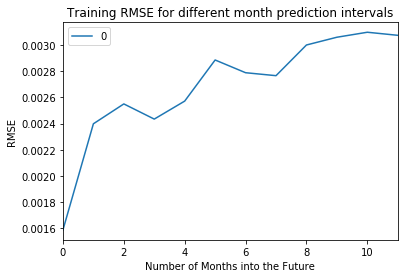

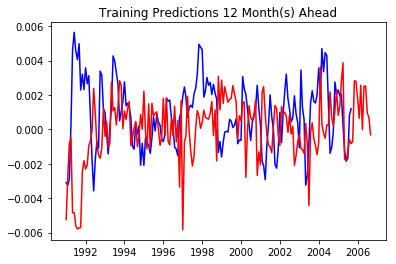

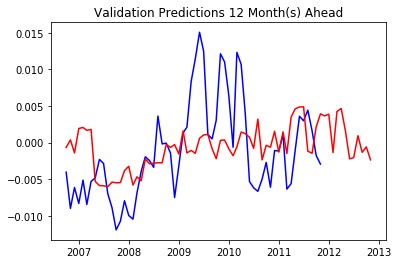

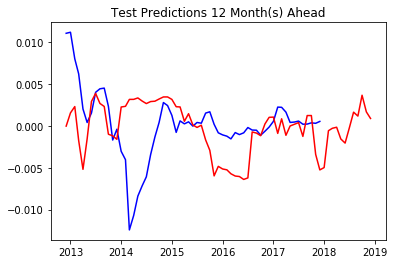

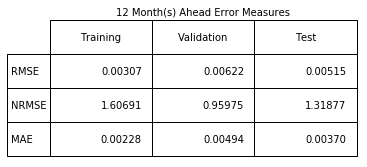

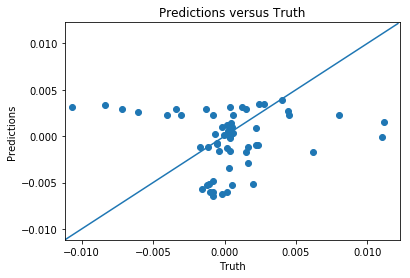

                            OLS Regression Results                            
Dep. Variable:             CSUSHPINSA   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.3452
Date:                Tue, 21 Aug 2018   Prob (F-statistic):              0.559
Time:                        15:36:44   Log-Likelihood:                 251.88
No. Observations:                  61   AIC:                            -499.8
Df Residuals:                      59   BIC:                            -495.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.224e-05      0.001      0.181      0.8

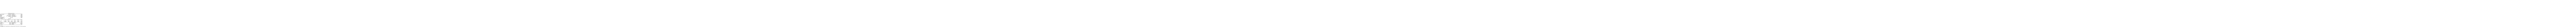

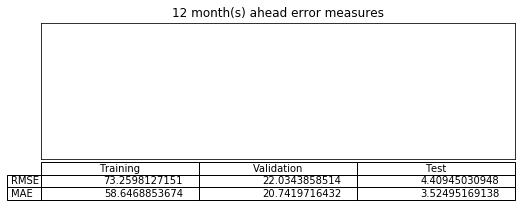

In [4]:
for i in range(2,13):
    print(i)
    #import clean and adjusted data
    CS_dat, adj_CS_dat, perc_adj_CS_dat, mdo_dat, new_PCE = fd.fix_data.cleanup_data('/Users/abbysuckow/Desktop/Thesis/Data/CSUSHPINSA.csv',
                            '/Users/abbysuckow/Desktop/Thesis/Data/pers_expend.csv',
                     '/Users/abbysuckow/Desktop/Thesis/Data/frb_mdo_historical.csv', False, logz=False)

    #get the relevant mortgage data and change into percentage change
    mdo_dat = fd.fix_data.get_residential_data(mdo_dat, new_PCE)
    mdo_dat = (mdo_dat - mdo_dat.shift(1)) / mdo_dat.shift(1)
    mdo_dat.iloc[:,0] = mdo_dat.iloc[:,0] - mdo_dat.iloc[0:,0].shift(12)
    
    #tests stationarity and autocorrelation
    fd.fix_data.check_stationary(perc_adj_CS_dat['CSUSHPINSA'], plots=False)

    #########################################################################
    #set some parameters
    train_size = 225
    valid_size = np.round((len(perc_adj_CS_dat) - train_size )/ 2).astype(int)
    month_forecast = 12 # number of months you want to forecast into the future
    num_dif = 1 #number of times to difference
    dif_order = 12 #lag you want to difference on
    num_lags = i #for building different number of lags in the model
    shift_ord = 0 #0 if we don't shift data, otherwise set to month_forecast
    #########################################################################

    #add lags as variables, do differencing (if you want) and split up the data
    y_, y_train, X_train, y_valid, X_valid, y_test, X_test, num = fd.fix_data.split_shift_data(perc_adj_CS_dat, train_size, valid_size, num_lags, dif_order=dif_order, num_dif=num_dif, shift_ord=shift_ord, plot=False, second_dif=False, mdo_dat=mdo_dat)

    num = num + num_lags 
    fd.fix_data.check_stationary(y_[num:]['CSUSHPINSA'], plots=False)
  
    #build the model
    model = pred.making_preds.optim_model(model_type, X_train, y_train, X_valid, y_valid, num, shift_ord)

    #make predictions
    y_hat = pred.making_preds.pred_ahead_combo(month_forecast, num_lags, X_train[num:],X_train[num:],y_train[num:], model, model_type)
    y_hat_valid = pred.making_preds.pred_ahead_combo(month_forecast, num_lags, X_valid[shift_ord:], X_train[num:],y_train[num:],model,model_type)
    y_hat_test = pred.making_preds.pred_ahead_combo(month_forecast, num_lags, X_test[shift_ord:],X_train[num:],y_train[num:], model,model_type)
    print(X_train.shape)
    #unadj_y = fix_data.switch_back(y_[dif_order:],perc_adj_CS_dat, dif_order,adj_CS_dat, new_PCE[dif_order:])
    rmse_train, rmse_valid[i-2], rmse_test, y_hat, y_hat_valid, y_hat_test = pred.making_preds.predict_things(model_type, X_train[shift_ord:], X_valid[shift_ord:], X_test[shift_ord:],y_train[shift_ord:], y_valid[shift_ord:], y_test[shift_ord:],y_hat, y_hat_valid, y_hat_test, num, model, month_forecast, shift_ord)

    
#slope analysis
pred.making_preds.slope_analysis(y_hat_test[:len(y_hat_test)-month_forecast+shift_ord][month_forecast-shift_ord-1], y_test[month_forecast:],model_type,month_forecast)

unadj_y_hat, unadj_y_hat_v, unadj_y_hat_t=pred.making_preds.adjusted_preds(model_type,y_hat, y_hat_valid, y_hat_test, CS_dat, perc_adj_CS_dat, dif_order, adj_CS_dat, new_PCE, train_size, valid_size, month_forecast, num)

###checking to see if switch back works ####################
# un = pd.DataFrame(fix_data.switch_back(y_train[num:], perc_adj_CS_dat[num-month_forecast:], dif_order, month_forecast, adj_CS_dat[num-month_forecast:], new_PCE[num:train_size]))
# un = un.set_index(y_train[num:].index)
# plt.plot(un)
# plt.plot(CS_dat[num:])
# plt.show()
#
# un = pd.DataFrame(fix_data.switch_back(y_valid, perc_adj_CS_dat[train_size-month_forecast:], dif_order, month_forecast, adj_CS_dat[train_size-month_forecast:], new_PCE[train_size:train_size+valid_size]))
# un = un.set_index(y_valid.index)
# plt.plot(un)
# plt.plot(CS_dat[num:])
# plt.show()
#
# un = pd.DataFrame(fix_data.switch_back(y_test,perc_adj_CS_dat[train_size+valid_size-month_forecast:], dif_order,month_forecast,adj_CS_dat[train_size+valid_size-month_forecast:], new_PCE[train_size+valid_size+1:]))
# un = un.set_index(y_test.index)
# plt.plot(un)
# plt.plot(CS_dat[num+month_forecast:])
# plt.show()


In [8]:
print(rmse_valid)
best_lags = np.argmin(rmse_valid) +2 
print(best_lags)

[ 0.007    0.00986  0.00666  0.00661  0.00676  0.00654  0.0065   0.00663
  0.00632  0.00658  0.00622]
12


ADF Statistic: -2.977440
p-value: 0.037056
ADF Statistic: -4.215328
p-value: 0.000621
hello!!!!!
(191, 23)
(191, 1, 23)
(74, 23)
Epoch 1/100
191/191 [==============================] - 123s 646ms/step - loss: 1.0207
Epoch 2/100
191/191 [==============================] - 0s 848us/step - loss: 1.0047
Epoch 3/100
191/191 [==============================] - 0s 48us/step - loss: 0.9661
Epoch 4/100
191/191 [==============================] - 0s 36us/step - loss: 0.9661
Epoch 5/100
191/191 [==============================] - 0s 60us/step - loss: 0.9922
Epoch 6/100
191/191 [==============================] - 0s 45us/step - loss: 0.9466
Epoch 7/100
191/191 [==============================] - 0s 35us/step - loss: 0.9329
Epoch 8/100
191/191 [==============================] - 0s 44us/step - loss: 0.9599
Epoch 9/100
191/191 [==============================] - 0s 59us/step - loss: 0.9588
Epoch 10/100
191/191 [==============================] - 0s 70us/step - loss: 1.0152
Epoch 11/100
191/191 [==============

191/191 [==============================] - 0s 44us/step - loss: 0.8939
Epoch 98/100
191/191 [==============================] - 0s 41us/step - loss: 0.9543
Epoch 99/100
191/191 [==============================] - 0s 39us/step - loss: 0.9230
Epoch 100/100
191/191 [==============================] - 0s 54us/step - loss: 0.9509
Epoch 1/100
191/191 [==============================] - 68s 357ms/step - loss: 0.9958
Epoch 2/100
191/191 [==============================] - 0s 921us/step - loss: 1.0212
Epoch 3/100
191/191 [==============================] - 0s 40us/step - loss: 0.9732
Epoch 4/100
191/191 [==============================] - 0s 51us/step - loss: 0.9742
Epoch 5/100
191/191 [==============================] - 0s 58us/step - loss: 0.9582
Epoch 6/100
191/191 [==============================] - 0s 40us/step - loss: 0.9507
Epoch 7/100
191/191 [==============================] - 0s 63us/step - loss: 0.9101
Epoch 8/100
191/191 [==============================] - 0s 35us/step - loss: 0.9457
Epoch 9/1

Epoch 95/100
191/191 [==============================] - 0s 35us/step - loss: 0.7427
Epoch 96/100
191/191 [==============================] - 0s 35us/step - loss: 0.7268
Epoch 97/100
191/191 [==============================] - 0s 57us/step - loss: 0.7289
Epoch 98/100
191/191 [==============================] - 0s 37us/step - loss: 0.7381
Epoch 99/100
191/191 [==============================] - 0s 37us/step - loss: 0.6706
Epoch 100/100
191/191 [==============================] - 0s 34us/step - loss: 0.6808
Epoch 1/100
191/191 [==============================] - 77s 402ms/step - loss: 1.2272
Epoch 2/100
191/191 [==============================] - 0s 1ms/step - loss: 1.0192
Epoch 3/100
191/191 [==============================] - 0s 50us/step - loss: 0.9961
Epoch 4/100
191/191 [==============================] - 0s 38us/step - loss: 0.9076
Epoch 5/100
191/191 [==============================] - 0s 39us/step - loss: 0.8938
Epoch 6/100
191/191 [==============================] - 0s 86us/step - loss: 0.9

Epoch 93/100
191/191 [==============================] - 0s 37us/step - loss: 0.3711
Epoch 94/100
191/191 [==============================] - 0s 36us/step - loss: 0.5112
Epoch 95/100
191/191 [==============================] - 0s 39us/step - loss: 0.3505
Epoch 96/100
191/191 [==============================] - 0s 37us/step - loss: 0.4237
Epoch 97/100
191/191 [==============================] - 0s 37us/step - loss: 0.3898
Epoch 98/100
191/191 [==============================] - 0s 38us/step - loss: 0.3558
Epoch 99/100
191/191 [==============================] - 0s 37us/step - loss: 0.4385
Epoch 100/100
191/191 [==============================] - 0s 38us/step - loss: 0.4133
Epoch 1/100
191/191 [==============================] - 66s 345ms/step - loss: 1.0350
Epoch 2/100
191/191 [==============================] - 0s 1ms/step - loss: 1.0671
Epoch 3/100
191/191 [==============================] - 0s 69us/step - loss: 0.9563
Epoch 4/100
191/191 [==============================] - 0s 136us/step - loss: 

Epoch 91/100
191/191 [==============================] - 0s 39us/step - loss: 0.4847
Epoch 92/100
191/191 [==============================] - 0s 40us/step - loss: 0.5662
Epoch 93/100
191/191 [==============================] - 0s 47us/step - loss: 0.4399
Epoch 94/100
191/191 [==============================] - 0s 37us/step - loss: 0.3573
Epoch 95/100
191/191 [==============================] - 0s 46us/step - loss: 0.4416
Epoch 96/100
191/191 [==============================] - 0s 55us/step - loss: 0.4458
Epoch 97/100
191/191 [==============================] - 0s 42us/step - loss: 0.3894
Epoch 98/100
191/191 [==============================] - 0s 40us/step - loss: 0.5346
Epoch 99/100
191/191 [==============================] - 0s 53us/step - loss: 0.4267
Epoch 100/100
191/191 [==============================] - 0s 43us/step - loss: 0.4042
Epoch 1/100
191/191 [==============================] - 653s 3s/step - loss: 1.0092
Epoch 2/100
191/191 [==============================] - 0s 1ms/step - loss: 1

Epoch 89/100
191/191 [==============================] - 0s 39us/step - loss: 0.9887
Epoch 90/100
191/191 [==============================] - 0s 43us/step - loss: 0.9863
Epoch 91/100
191/191 [==============================] - 0s 45us/step - loss: 1.0023
Epoch 92/100
191/191 [==============================] - 0s 55us/step - loss: 0.9693
Epoch 93/100
191/191 [==============================] - 0s 37us/step - loss: 0.9754
Epoch 94/100
191/191 [==============================] - 0s 38us/step - loss: 0.9780
Epoch 95/100
191/191 [==============================] - 0s 42us/step - loss: 0.9506
Epoch 96/100
191/191 [==============================] - 0s 44us/step - loss: 1.0243
Epoch 97/100
191/191 [==============================] - 0s 39us/step - loss: 1.0024
Epoch 98/100
191/191 [==============================] - 0s 44us/step - loss: 0.9779
Epoch 99/100
191/191 [==============================] - 0s 44us/step - loss: 1.0167
Epoch 100/100
191/191 [==============================] - 0s 43us/step - loss

Epoch 87/100
191/191 [==============================] - 0s 35us/step - loss: 0.6822
Epoch 88/100
191/191 [==============================] - 0s 63us/step - loss: 0.6327
Epoch 89/100
191/191 [==============================] - 0s 42us/step - loss: 0.6501
Epoch 90/100
191/191 [==============================] - 0s 58us/step - loss: 0.6037
Epoch 91/100
191/191 [==============================] - 0s 50us/step - loss: 0.6214
Epoch 92/100
191/191 [==============================] - 0s 41us/step - loss: 0.6114
Epoch 93/100
191/191 [==============================] - 0s 44us/step - loss: 0.6374
Epoch 94/100
191/191 [==============================] - 0s 50us/step - loss: 0.6762
Epoch 95/100
191/191 [==============================] - 0s 66us/step - loss: 0.6288
Epoch 96/100
191/191 [==============================] - 0s 41us/step - loss: 0.6774
Epoch 97/100
191/191 [==============================] - 0s 40us/step - loss: 0.6371
Epoch 98/100
191/191 [==============================] - 0s 41us/step - loss:

Epoch 85/100
191/191 [==============================] - 0s 43us/step - loss: 0.2565
Epoch 86/100
191/191 [==============================] - 0s 51us/step - loss: 0.3123
Epoch 87/100
191/191 [==============================] - 0s 40us/step - loss: 0.3155
Epoch 88/100
191/191 [==============================] - 0s 56us/step - loss: 0.2697
Epoch 89/100
191/191 [==============================] - 0s 42us/step - loss: 0.2765
Epoch 90/100
191/191 [==============================] - 0s 40us/step - loss: 0.2864
Epoch 91/100
191/191 [==============================] - 0s 44us/step - loss: 0.3004
Epoch 92/100
191/191 [==============================] - 0s 42us/step - loss: 0.2838
Epoch 93/100
191/191 [==============================] - 0s 43us/step - loss: 0.3079
Epoch 94/100
191/191 [==============================] - 0s 51us/step - loss: 0.3097
Epoch 95/100
191/191 [==============================] - 0s 44us/step - loss: 0.3076
Epoch 96/100
191/191 [==============================] - 0s 41us/step - loss:

Epoch 83/100
191/191 [==============================] - 0s 55us/step - loss: 0.4480
Epoch 84/100
191/191 [==============================] - 0s 41us/step - loss: 0.2671
Epoch 85/100
191/191 [==============================] - 0s 36us/step - loss: 0.3318
Epoch 86/100
191/191 [==============================] - 0s 37us/step - loss: 0.3256
Epoch 87/100
191/191 [==============================] - 0s 49us/step - loss: 0.3071
Epoch 88/100
191/191 [==============================] - 0s 38us/step - loss: 0.3526
Epoch 89/100
191/191 [==============================] - 0s 34us/step - loss: 0.4061
Epoch 90/100
191/191 [==============================] - 0s 39us/step - loss: 0.4009
Epoch 91/100
191/191 [==============================] - 0s 40us/step - loss: 0.3991
Epoch 92/100
191/191 [==============================] - 0s 37us/step - loss: 0.3698
Epoch 93/100
191/191 [==============================] - 0s 40us/step - loss: 0.3254
Epoch 94/100
191/191 [==============================] - 0s 37us/step - loss:

Epoch 81/100
191/191 [==============================] - 0s 45us/step - loss: 0.9367
Epoch 82/100
191/191 [==============================] - 0s 46us/step - loss: 0.9433
Epoch 83/100
191/191 [==============================] - 0s 47us/step - loss: 0.9078
Epoch 84/100
191/191 [==============================] - 0s 48us/step - loss: 0.9181
Epoch 85/100
191/191 [==============================] - 0s 39us/step - loss: 0.9144
Epoch 86/100
191/191 [==============================] - 0s 45us/step - loss: 0.8126
Epoch 87/100
191/191 [==============================] - 0s 59us/step - loss: 0.8623
Epoch 88/100
191/191 [==============================] - 0s 57us/step - loss: 0.9051
Epoch 89/100
191/191 [==============================] - 0s 93us/step - loss: 0.8404
Epoch 90/100
191/191 [==============================] - 0s 45us/step - loss: 0.9005
Epoch 91/100
191/191 [==============================] - 0s 53us/step - loss: 0.8997
Epoch 92/100
191/191 [==============================] - 0s 53us/step - loss:

Epoch 79/100
191/191 [==============================] - 0s 44us/step - loss: 0.4682
Epoch 80/100
191/191 [==============================] - 0s 39us/step - loss: 0.4298
Epoch 81/100
191/191 [==============================] - 0s 59us/step - loss: 0.4373
Epoch 82/100
191/191 [==============================] - 0s 40us/step - loss: 0.4667
Epoch 83/100
191/191 [==============================] - 0s 37us/step - loss: 0.4710
Epoch 84/100
191/191 [==============================] - 0s 37us/step - loss: 0.4092
Epoch 85/100
191/191 [==============================] - 0s 34us/step - loss: 0.4343
Epoch 86/100
191/191 [==============================] - 0s 37us/step - loss: 0.4875
Epoch 87/100
191/191 [==============================] - 0s 38us/step - loss: 0.5098
Epoch 88/100
191/191 [==============================] - 0s 35us/step - loss: 0.4087
Epoch 89/100
191/191 [==============================] - 0s 35us/step - loss: 0.5259
Epoch 90/100
191/191 [==============================] - 0s 40us/step - loss:

Epoch 77/100
191/191 [==============================] - 0s 62us/step - loss: 0.2142
Epoch 78/100
191/191 [==============================] - 0s 49us/step - loss: 0.2084
Epoch 79/100
191/191 [==============================] - 0s 72us/step - loss: 0.2090
Epoch 80/100
191/191 [==============================] - 0s 48us/step - loss: 0.2393
Epoch 81/100
191/191 [==============================] - 0s 72us/step - loss: 0.2234
Epoch 82/100
191/191 [==============================] - 0s 52us/step - loss: 0.2262
Epoch 83/100
191/191 [==============================] - 0s 50us/step - loss: 0.1739
Epoch 84/100
191/191 [==============================] - 0s 44us/step - loss: 0.2732
Epoch 85/100
191/191 [==============================] - 0s 195us/step - loss: 0.2160
Epoch 86/100
191/191 [==============================] - 0s 57us/step - loss: 0.2182
Epoch 87/100
191/191 [==============================] - 0s 49us/step - loss: 0.2158
Epoch 88/100
191/191 [==============================] - 0s 48us/step - loss

Epoch 75/100
191/191 [==============================] - 0s 40us/step - loss: 0.2433
Epoch 76/100
191/191 [==============================] - 0s 41us/step - loss: 0.2746
Epoch 77/100
191/191 [==============================] - 0s 38us/step - loss: 0.2555
Epoch 78/100
191/191 [==============================] - 0s 37us/step - loss: 0.3433
Epoch 79/100
191/191 [==============================] - 0s 38us/step - loss: 0.3043
Epoch 80/100
191/191 [==============================] - 0s 37us/step - loss: 0.2788
Epoch 81/100
191/191 [==============================] - 0s 36us/step - loss: 0.2553
Epoch 82/100
191/191 [==============================] - 0s 37us/step - loss: 0.2723
Epoch 83/100
191/191 [==============================] - 0s 47us/step - loss: 0.2366
Epoch 84/100
191/191 [==============================] - 0s 36us/step - loss: 0.2669
Epoch 85/100
191/191 [==============================] - 0s 39us/step - loss: 0.2459
Epoch 86/100
191/191 [==============================] - 0s 42us/step - loss:

Epoch 73/100
191/191 [==============================] - 0s 69us/step - loss: 0.9012
Epoch 74/100
191/191 [==============================] - 0s 53us/step - loss: 0.8965
Epoch 75/100
191/191 [==============================] - 0s 47us/step - loss: 0.8984
Epoch 76/100
191/191 [==============================] - 0s 40us/step - loss: 0.8571
Epoch 77/100
191/191 [==============================] - 0s 52us/step - loss: 0.8844
Epoch 78/100
191/191 [==============================] - 0s 43us/step - loss: 0.9146
Epoch 79/100
191/191 [==============================] - 0s 57us/step - loss: 0.8829
Epoch 80/100
191/191 [==============================] - 0s 50us/step - loss: 0.8818
Epoch 81/100
191/191 [==============================] - 0s 55us/step - loss: 0.8840
Epoch 82/100
191/191 [==============================] - 0s 90us/step - loss: 0.9309
Epoch 83/100
191/191 [==============================] - 0s 93us/step - loss: 0.8494
Epoch 84/100
191/191 [==============================] - 0s 66us/step - loss:

Epoch 71/100
191/191 [==============================] - 0s 84us/step - loss: 0.4218
Epoch 72/100
191/191 [==============================] - 0s 119us/step - loss: 0.4198
Epoch 73/100
191/191 [==============================] - 0s 86us/step - loss: 0.4383
Epoch 74/100
191/191 [==============================] - 0s 68us/step - loss: 0.4217
Epoch 75/100
191/191 [==============================] - 0s 47us/step - loss: 0.4310
Epoch 76/100
191/191 [==============================] - 0s 51us/step - loss: 0.3923
Epoch 77/100
191/191 [==============================] - 0s 53us/step - loss: 0.4116
Epoch 78/100
191/191 [==============================] - 0s 47us/step - loss: 0.4306
Epoch 79/100
191/191 [==============================] - 0s 51us/step - loss: 0.3818
Epoch 80/100
191/191 [==============================] - 0s 52us/step - loss: 0.3970
Epoch 81/100
191/191 [==============================] - 0s 43us/step - loss: 0.3647
Epoch 82/100
191/191 [==============================] - 0s 41us/step - loss

191/191 [==============================] - 0s 148us/step - loss: 0.1876
Epoch 69/100
191/191 [==============================] - 0s 91us/step - loss: 0.1796
Epoch 70/100
191/191 [==============================] - 0s 62us/step - loss: 0.1504
Epoch 71/100
191/191 [==============================] - 0s 58us/step - loss: 0.1472
Epoch 72/100
191/191 [==============================] - 0s 117us/step - loss: 0.1576
Epoch 73/100
191/191 [==============================] - 0s 52us/step - loss: 0.2042
Epoch 74/100
191/191 [==============================] - 0s 51us/step - loss: 0.1805
Epoch 75/100
191/191 [==============================] - 0s 89us/step - loss: 0.1983
Epoch 76/100
191/191 [==============================] - 0s 47us/step - loss: 0.1729
Epoch 77/100
191/191 [==============================] - 0s 53us/step - loss: 0.1572
Epoch 78/100
191/191 [==============================] - 0s 47us/step - loss: 0.1669
Epoch 79/100
191/191 [==============================] - 0s 48us/step - loss: 0.1670
Epo

Epoch 66/100
191/191 [==============================] - 0s 45us/step - loss: 0.2193
Epoch 67/100
191/191 [==============================] - 0s 47us/step - loss: 0.2301
Epoch 68/100
191/191 [==============================] - 0s 45us/step - loss: 0.2084
Epoch 69/100
191/191 [==============================] - 0s 43us/step - loss: 0.1651
Epoch 70/100
191/191 [==============================] - 0s 47us/step - loss: 0.1908
Epoch 71/100
191/191 [==============================] - 0s 51us/step - loss: 0.2226
Epoch 72/100
191/191 [==============================] - 0s 91us/step - loss: 0.2079
Epoch 73/100
191/191 [==============================] - 0s 123us/step - loss: 0.2511
Epoch 74/100
191/191 [==============================] - 0s 97us/step - loss: 0.3584
Epoch 75/100
191/191 [==============================] - 0s 47us/step - loss: 0.2639
Epoch 76/100
191/191 [==============================] - 0s 52us/step - loss: 0.3021
Epoch 77/100
191/191 [==============================] - 0s 52us/step - loss

Epoch 64/100
191/191 [==============================] - 0s 53us/step - loss: 0.7792
Epoch 65/100
191/191 [==============================] - 0s 54us/step - loss: 0.8150
Epoch 66/100
191/191 [==============================] - 0s 81us/step - loss: 0.8030
Epoch 67/100
191/191 [==============================] - 0s 55us/step - loss: 0.7679
Epoch 68/100
191/191 [==============================] - 0s 63us/step - loss: 0.8203
Epoch 69/100
191/191 [==============================] - 0s 54us/step - loss: 0.7846
Epoch 70/100
191/191 [==============================] - 0s 52us/step - loss: 0.7759
Epoch 71/100
191/191 [==============================] - 0s 51us/step - loss: 0.7581
Epoch 72/100
191/191 [==============================] - 0s 52us/step - loss: 0.7842
Epoch 73/100
191/191 [==============================] - 0s 48us/step - loss: 0.7725
Epoch 74/100
191/191 [==============================] - 0s 61us/step - loss: 0.7594
Epoch 75/100
191/191 [==============================] - 0s 50us/step - loss:

Epoch 62/100
191/191 [==============================] - 0s 49us/step - loss: 0.3347
Epoch 63/100
191/191 [==============================] - 0s 46us/step - loss: 0.3500
Epoch 64/100
191/191 [==============================] - 0s 53us/step - loss: 0.3277
Epoch 65/100
191/191 [==============================] - 0s 49us/step - loss: 0.3207
Epoch 66/100
191/191 [==============================] - 0s 45us/step - loss: 0.3242
Epoch 67/100
191/191 [==============================] - 0s 47us/step - loss: 0.3250
Epoch 68/100
191/191 [==============================] - 0s 57us/step - loss: 0.3425
Epoch 69/100
191/191 [==============================] - 0s 48us/step - loss: 0.3098
Epoch 70/100
191/191 [==============================] - 0s 50us/step - loss: 0.3177
Epoch 71/100
191/191 [==============================] - 0s 86us/step - loss: 0.3239
Epoch 72/100
191/191 [==============================] - 0s 54us/step - loss: 0.3146
Epoch 73/100
191/191 [==============================] - 0s 46us/step - loss:

Epoch 60/100
191/191 [==============================] - 0s 54us/step - loss: 0.1545
Epoch 61/100
191/191 [==============================] - 0s 68us/step - loss: 0.1556
Epoch 62/100
191/191 [==============================] - 0s 60us/step - loss: 0.1607
Epoch 63/100
191/191 [==============================] - 0s 61us/step - loss: 0.1587
Epoch 64/100
191/191 [==============================] - 0s 59us/step - loss: 0.1436
Epoch 65/100
191/191 [==============================] - 0s 65us/step - loss: 0.1572
Epoch 66/100
191/191 [==============================] - 0s 73us/step - loss: 0.1486
Epoch 67/100
191/191 [==============================] - 0s 59us/step - loss: 0.1635
Epoch 68/100
191/191 [==============================] - 0s 59us/step - loss: 0.1470
Epoch 69/100
191/191 [==============================] - 0s 55us/step - loss: 0.1328
Epoch 70/100
191/191 [==============================] - 0s 54us/step - loss: 0.1375
Epoch 71/100
191/191 [==============================] - 0s 90us/step - loss:

Epoch 58/100
191/191 [==============================] - 0s 53us/step - loss: 0.2792
Epoch 59/100
191/191 [==============================] - 0s 100us/step - loss: 0.3817
Epoch 60/100
191/191 [==============================] - 0s 52us/step - loss: 0.2028
Epoch 61/100
191/191 [==============================] - 0s 68us/step - loss: 0.2175
Epoch 62/100
191/191 [==============================] - 0s 57us/step - loss: 0.2537
Epoch 63/100
191/191 [==============================] - 0s 55us/step - loss: 0.3782
Epoch 64/100
191/191 [==============================] - 0s 53us/step - loss: 0.2152
Epoch 65/100
191/191 [==============================] - 0s 60us/step - loss: 0.2606
Epoch 66/100
191/191 [==============================] - 0s 53us/step - loss: 0.2314
Epoch 67/100
191/191 [==============================] - 0s 61us/step - loss: 0.2718
Epoch 68/100
191/191 [==============================] - 0s 53us/step - loss: 0.2106
Epoch 69/100
191/191 [==============================] - 0s 271us/step - los

191/191 [==============================] - 1s 7ms/step - loss: 0.2024
Epoch 57/100
191/191 [==============================] - 1s 7ms/step - loss: 0.2006
Epoch 58/100
191/191 [==============================] - 1s 7ms/step - loss: 0.2118
Epoch 59/100
191/191 [==============================] - 1s 8ms/step - loss: 0.1924
Epoch 60/100
191/191 [==============================] - 1s 7ms/step - loss: 0.1991
Epoch 61/100
191/191 [==============================] - 2s 8ms/step - loss: 0.2016
Epoch 62/100
191/191 [==============================] - 2s 9ms/step - loss: 0.1837
Epoch 63/100
191/191 [==============================] - 2s 8ms/step - loss: 0.1841
Epoch 64/100
191/191 [==============================] - 2s 9ms/step - loss: 0.1972
Epoch 65/100
191/191 [==============================] - 2s 8ms/step - loss: 0.1820
Epoch 66/100
191/191 [==============================] - 1s 8ms/step - loss: 0.1684
Epoch 67/100
191/191 [==============================] - 2s 8ms/step - loss: 0.1671
Epoch 68/100
191/

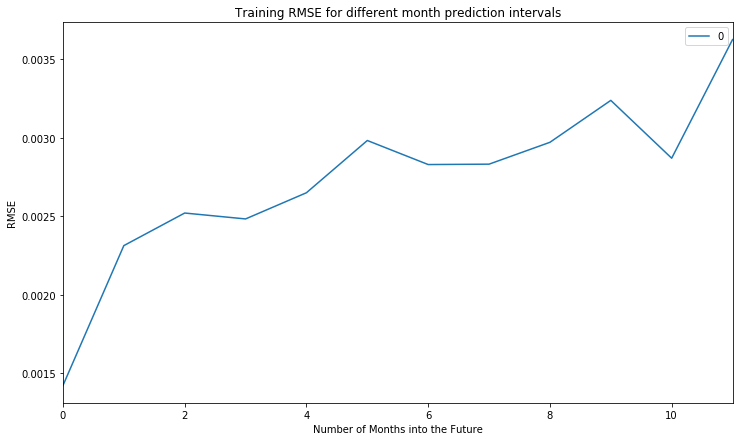

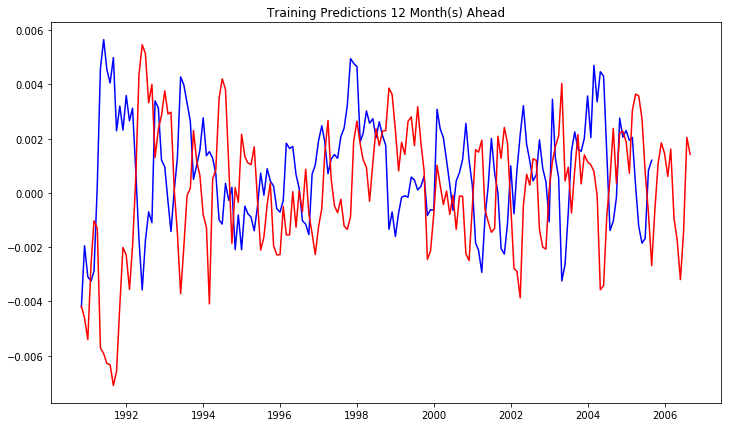

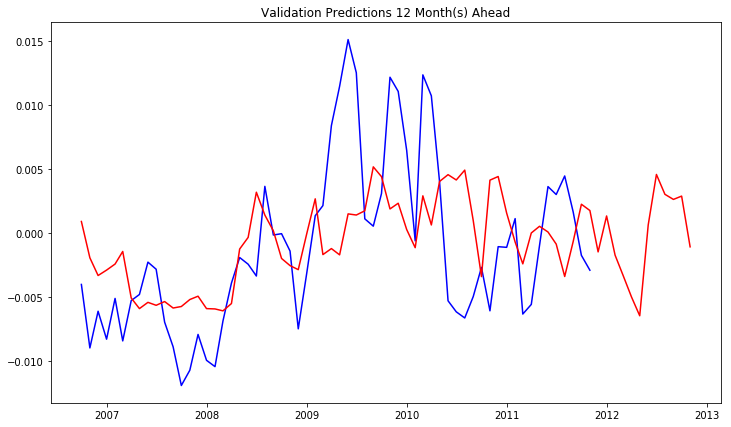

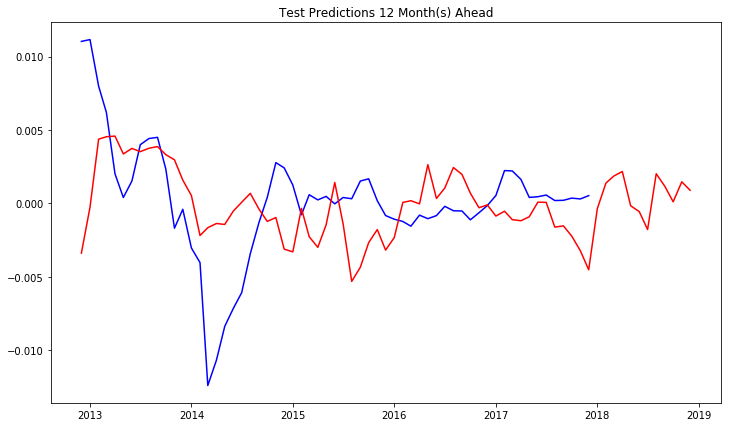

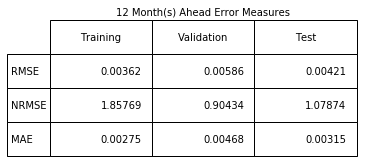

In [14]:
CS_dat, adj_CS_dat, perc_adj_CS_dat, mdo_dat, new_PCE = fd.fix_data.cleanup_data('/Users/abbysuckow/Desktop/Thesis/Data/CSUSHPINSA.csv',
                            '/Users/abbysuckow/Desktop/Thesis/Data/pers_expend.csv',
                     '/Users/abbysuckow/Desktop/Thesis/Data/frb_mdo_historical.csv', False, logz=False)

#get the relevant mortgage data and change into percentage change
mdo_dat = fd.fix_data.get_residential_data(mdo_dat, new_PCE)
mdo_dat = (mdo_dat - mdo_dat.shift(1)) / mdo_dat.shift(1)
mdo_dat.iloc[:,0] = mdo_dat.iloc[:,0] - mdo_dat.iloc[0:,0].shift(12)

#tests stationarity and autocorrelation
fd.fix_data.check_stationary(perc_adj_CS_dat['CSUSHPINSA'], plots=False)

#########################################################################
#set some parameters
train_size = 225
valid_size = np.round((len(perc_adj_CS_dat) - train_size )/ 2).astype(int)
month_forecast = 12 # number of months you want to forecast into the future
num_dif = 1 #number of times to difference
dif_order = 12 #lag you want to difference on
num_lags = 11 #for building different number of lags in the model
shift_ord = 0 #0 if we don't shift data, otherwise set to month_forecast
#########################################################################

#add lags as variables, do differencing (if you want) and split up the data
y_, y_train, X_train, y_valid, X_valid, y_test, X_test, num = fd.fix_data.split_shift_data(perc_adj_CS_dat, train_size, valid_size, num_lags, dif_order=dif_order, num_dif=num_dif, shift_ord=shift_ord, plot=False, second_dif=False, mdo_dat=mdo_dat)
num = num + num_lags 

fd.fix_data.check_stationary(y_[num:]['CSUSHPINSA'], plots=False)

#build the model
model = pred.making_preds.optim_model(model_type, X_train, y_train, X_valid, y_valid, num, shift_ord)

#make predictions
y_hat = pred.making_preds.pred_ahead_combo(month_forecast, num_lags, X_train[num:],X_train[num:],y_train[num:], model, model_type)
y_hat_valid = pred.making_preds.pred_ahead_combo(month_forecast, num_lags, X_valid[shift_ord:], X_train[num:],y_train[num:],model,model_type)
y_hat_test = pred.making_preds.pred_ahead_combo(month_forecast, num_lags, X_test[shift_ord:],X_train[num:],y_train[num:], model,model_type)
print(X_train.shape)
#unadj_y = fix_data.switch_back(y_[dif_order:],perc_adj_CS_dat, dif_order,adj_CS_dat, new_PCE[dif_order:])
rmse_train, rmse_valid[num_lags -2], rmse_test, y_hat, y_hat_valid, y_hat_test = pred.making_preds.predict_things(model_type, X_train[shift_ord:], X_valid[shift_ord:], X_test[shift_ord:],y_train[shift_ord:], y_valid[shift_ord:], y_test[shift_ord:],y_hat, y_hat_valid, y_hat_test, num, model, month_forecast, shift_ord)

In [40]:
print(np.mean(y_train[num:]))
print(np.mean(y_valid))
print(np.mean(y_test))
print(np.mean(y_[num:]))
np.std(y_train[num:])

CSUSHPINSA    0.000542
dtype: float64
CSUSHPINSA   -0.002265
dtype: float64
CSUSHPINSA    0.001445
dtype: float64
CSUSHPINSA    0.000114
dtype: float64


CSUSHPINSA    0.002298
dtype: float64

In [11]:
print(np.std(y_train[num:]))
print(np.std(y_valid))
print(np.std(y_test))
print(np.std(y_[num:]))

CSUSHPINSA    0.002299
dtype: float64
CSUSHPINSA    0.006496
dtype: float64
CSUSHPINSA    0.004993
dtype: float64
CSUSHPINSA    0.004302
dtype: float64


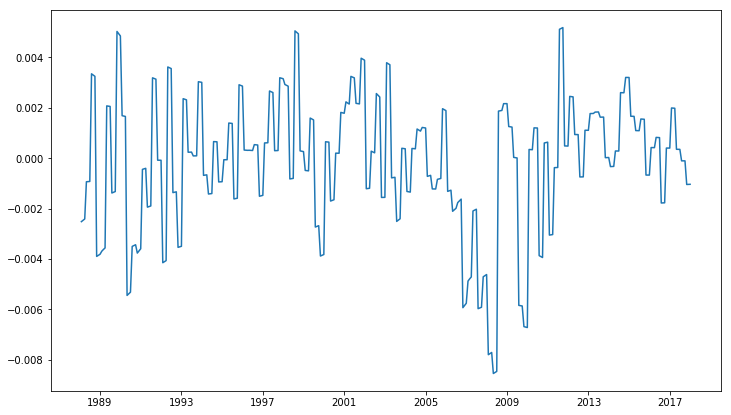

In [38]:
plt.plot(mdo_dat.iloc[:,0])
plt.show()

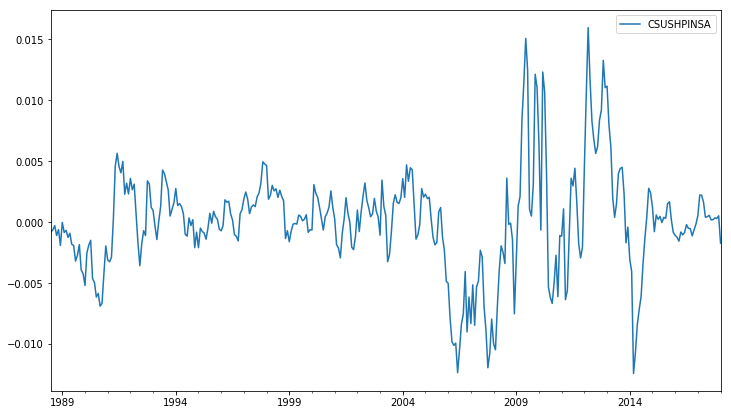

In [39]:
y_[num:].plot()
plt.show()

In [7]:
np.std(y_train.iloc[num+month_forecast:])

CSUSHPINSA    0.001913
dtype: float64